# MSc in Data Science 
# Machine Learning 
# Academic Year: 2017-2018

## Linear Regression for red wines dataset

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
import collections

%matplotlib inline

We are going to treat the problem as a regression problem and build some linear regression object that will predict the quality of the wine.

Linear regresion is an aprroach for modeling the relationship between a dependent variable (Y) and one or many independent variables (X) and it assumes that the relationship between the dependent and the independent variables is linear, thus the model is of the following form:

Y = W0 + W1X1 + W2X2 + ... + WnXn. 

In our dataset, we had observed that there is some correlation between the "density" feature and the "residual sugar" feature, which means that this might cause the linear regression to "behave" incorrectly, as we have assumed that the variables are independent to apply it. But for the scope of this exercise we are going to ignore this correlation.

First of all, we load the red wine dataset and assign the eleven features/values to X and the target value which is the quality of the wine to Y. 

In [2]:
balance_data = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ";", header = 0)
X = balance_data.values[:,0:11]
Y = balance_data.values[:,11:12]

Then we create a multiple linear regression object and we fit the above 11 X features and target Y, to make a model that can predict the quality of the wine from all its other features. The model has the form:

Y = W0 + W1X1 + W2X2 + W3X3 + W4X4 + W5X5 + W6X6 + W7X7 + W8X8 + W9X9 + W10X10 + W11X11

In [3]:
regr = LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Using the model that we have created, we can try to "predict" the wine quality of the whole dataset, so as to check how accurate our model is. 

In [4]:
pred = regr.predict(X)
print(pred)[0:10]

[[ 5.03285045]
 [ 5.13787975]
 [ 5.20989474]
 [ 5.69385794]
 [ 5.03285045]
 [ 5.06557035]
 [ 5.1070693 ]
 [ 5.34370699]
 [ 5.33670489]
 [ 5.65840581]]


Now we can get the coefficients (W1, ..., W11) and the intercept (W0) of the linear regression and the model takes the form:

Y = 150,19284248 + 2.49905527e-02 * X1 + -1.08359026e+00 * X2 + -1.82563948e-01 * X3 + 1.63312698e-02 * X4 + -1.87422516e+00 * X5 + 4.36133331e-03 * X6 + -3.26457970e-03 * X7 + -1.78811638e+01 * X8  + -4.13653144e-01 * X9 + 9.16334413e-01 * X10 + 2.76197699e-01 * X11

Using the predicted values we can also calculate the mean squared error which is the average of the squares of the errors and the variance score which shows the accuracy of the model. If variance score is 1 then the model predicts the values perfectly.

In [6]:
print 'Coefficients: \n', regr.coef_
intercept = regr.intercept_[0]
print("\nThe intercept for our model is {}".format(intercept))
# The mean squared error
print("\nMean squared error: %.2f" % mean_squared_error(Y, pred))
# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(Y, pred))

Coefficients: 
[[  2.49905527e-02  -1.08359026e+00  -1.82563948e-01   1.63312698e-02
   -1.87422516e+00   4.36133331e-03  -3.26457970e-03  -1.78811638e+01
   -4.13653144e-01   9.16334413e-01   2.76197699e-01]]

The intercept for our model is 21.9652084495

Mean squared error: 0.42

Variance score: 0.36


We are going to choose the most prominent feature of the previous question of the exercise and apply linear regression again. The most prominent feature is feature number 10 (X[10] - "alcohol"). 

So, we assign the values of this feature to a variable (X10) and plot a scatter plot that shows how the data is distributed according to their "alcohol" and "quality".  By observing the plot of the data and the values of the features we can conclude that the plot would be somehow the same even if we choose another feature of them.

In [7]:
X10 = balance_data.values[:,10:11]
print len(X10)

1599


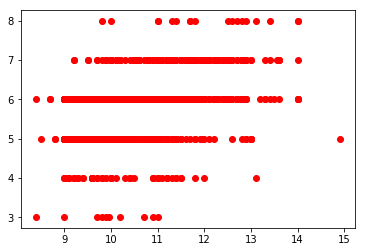

In [8]:
plt.scatter(X10, Y,  color='red')
plt.show()

Then we create a linear regression object and we fit the above X10 feature and target Y, to make a model that can predict the quality of the wine only from its alcohol. The model has the form:

Y = W0 + W1X1

In [9]:
regr10 = LinearRegression()
regr10.fit(X10, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Using the model that we have created, we can try to "predict" the wine quality of the whole dataset, so as to check how accurate our model is. 

In [10]:
pred10 = regr10.predict(X10)
print pred10

[[ 5.26688748]
 [ 5.41122419]
 [ 5.41122419]
 ..., 
 [ 5.84423431]
 [ 5.55556089]
 [ 5.84423431]]


Now we can get the coefficient (W1) and the intercept (W0) of the linear regression and the model takes the form:

Y = 1.874974887 + 0.36084177 * X

Using the predicted values we can also calculate the mean squared error which is the average of the squares of the errors and the variance score which shows the accuracy of the model.

In [11]:
print 'Coefficients: \n', regr10.coef_
intercept10 = regr10.intercept_[0]
w1 = regr10.coef_
print("\nThe intercept for our model is {}".format(intercept10))
# The mean squared error
print("\nMean squared error: %.2f" % mean_squared_error(Y, pred10))
# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(Y, pred10))
# edw ftiaxnw ti synartisi y = w0 + w1x1 + ... + w11x11 kai chekarw ena paradeigma na dw ti prediction mou kanei

Coefficients: 
[[ 0.36084177]]

The intercept for our model is 1.874974887

Mean squared error: 0.50

Variance score: 0.23


Now we can plot the data with the line that the linear regression have predicted. As we mentioned before, because of the nature of the values of the features and the target, we can observe that even if we would choose another feature to apply the linear regression, the plot and specifically the line would be somehow the same. This means that the classes below 5 and above 7 would never be predicted, because most of the values of quality is between 5 and 7.

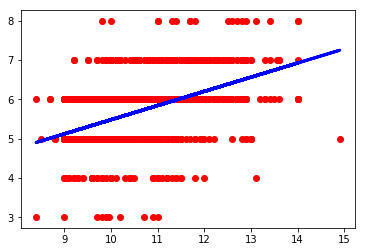

In [12]:
plt.scatter(X10, Y,  color='red')
plt.plot(X10, pred10, color='blue', linewidth=3)
plt.show()

The model doesn't seem to predict the quality very well, so we need a cost function so we can start optimizing our weights. We are using Mean Squared Error as our cost function. MSE measures the average squared difference between an observation’s actual and predicted values. Our goal is to minimize MSE to improve the accuracy of our model. For that purpose, we use Gradient Descent to calculate the gradient of our cost function. The implementation below, performs Gradient Descent and returns the optimum w0 and w1 for the MSE to be the least possible. 

In [20]:
def gradient_descent(training_examples, alpha):
    """
    Apply gradient descent on the training examples to learn a line that fits through the examples
    :param examples: set of all examples in (x,y) format
    :param alpha = learning rate
    :return:
    """
    # initialize w0 and w1 to some small value, here just using 0 for simplicity
    w0 = 0
    w1 = 0
    iterat = 0
    iters_list = []
    w0list = []
    w1list = []
    cost = []

    # repeat until "convergence", meaning that w0 and w1 aren't changing very much
    # --> need to define what 'not very much' means, and that may depend on problem domain
    convergence = False
    while not convergence:
        # initialize temporary variables, and set them to 0
        iterat += 1
        iters_list.append(iterat)
        delta_w0 = 0
        delta_w1 = 0

        for pair in training_examples:
            # grab our data points from the example
            x_i = pair[0]
            y_i = pair[1]

            # calculate a prediction, and find the error
            h_of_x_i = model_prediction(w0,w1,x_i)
            delta_w0 += prediction_error(w0,w1, x_i, y_i)
            delta_w1 += prediction_error(w0,w1,x_i,y_i)*x_i

        # store previous weighting values
        prev_w0 = w0
        prev_w1 = w1

        # get new weighting values
        w0 = w0 + alpha*delta_w0
        w1 = w1 + alpha*delta_w1
        w0list.append(w0)
        w1list.append(w1)
        #alpha -= 0.001

        # every few iterations print out current model
        #     1.  -->  (w0 + w1x1 + w2x2 + ... + wnxn)
        print "Current model is: ("+str(w0)+" + "+str(w1)+"x1)"
        #     2.  -->  averaged squared error over training set, using the current line
        summed_error = sum_of_squared_error_over_entire_dataset(w0, w1, training_examples)
        avg_error = summed_error/len(training_examples)
        cost.append(avg_error)
        print "Average Squared Error="+str(avg_error)
        print "Iteration:"+str(iterat)


        # check if we have converged
        if abs(prev_w0 - w0) < 0.00001 and abs(prev_w1 - w1) < 0.00001:
            convergence = True
        if iterat > 20000:
            convergence = True
            

    # after convergence, print out the parameters of the trained model (w0, ... wn)
    print "Parameters of trained model are: w0="+str(w0)+", w1="+str(w1)
    return w0list, w1list, cost, iters_list


############################
##### TRAINING HELPERS #####
############################
def model_prediction(w0, w1, x_i):
    return w0 + (w1 * x_i)

def prediction_error(w0, w1, x_i, y_i):
    # basically, we just take the true value (y_i)
    # and we subtract the predicted value from it
    # this gives us an error, or J(w0,w1) value
    return y_i - model_prediction(w0, w1, x_i)

def sum_of_squared_error_over_entire_dataset(w0, w1, training_examples):
    # find the squared error over the whole training set
    sum = 0
    for pair in training_examples:
        x_i = pair[0]
        y_i = pair[1]
        sum += prediction_error(w0,w1,x_i,y_i) ** 2
    return sum

The Gradient Descent estimates the weights of the model in many iterations by minimizing a cost function at every step. In order for Gradient Descent to work we must set the learning rate (alpha) to an appropriate value. This parameter determines how fast or slow we will "move" towards the minimum cost. If alpha is very large we will skip the optimal solution. If it is too small we will need too many iterations to converge to the best values. 

So we try 3 different values for alpha (0.001, 0.01 and 0.1), run the code, plot the cost with respect to the training epochs and check how many iterations (training epochs) are needed for the model to converge.

As we can observe value 0.001 for alpha is too small and the model needs 13.588 training epochs to converge to the best weights. Value 0.1 for alpha is too large and not only do we skip the optimal solution, but the cost seems to increase, whereas our objective is to minimize it. Finally, value 0.01 for alpha seems to be more suitable, because the model needs fewer training epochs to converge to the best weights (2.728).

In [14]:
w0, w1, cost, iters = gradient_descent((X10, Y), 0.001)

Current model is: ([ 0.0148] + [ 0.11712]x1)
Average Squared Error=[ 47.38653016]
Iteration:1
Current model is: ([ 0.02788387] + [ 0.22075016]x1)
Average Squared Error=[ 37.10452736]
Iteration:2
Current model is: ([ 0.0394493] + [ 0.31244439]x1)
Average Squared Error=[ 29.05489623]
Iteration:3
Current model is: ([ 0.0496712] + [ 0.39357763]x1)
Average Squared Error=[ 22.75295609]
Iteration:4
Current model is: ([ 0.05870434] + [ 0.4653664]x1)
Average Squared Error=[ 17.81925758]
Iteration:5
Current model is: ([ 0.06668566] + [ 0.52888712]x1)
Average Squared Error=[ 13.95673535]
Iteration:6
Current model is: ([ 0.07373631] + [ 0.5850922]x1)
Average Squared Error=[ 10.93282129]
Iteration:7
Current model is: ([ 0.07996351] + [ 0.63482435]x1)
Average Squared Error=[ 8.56544125]
Iteration:8
Current model is: ([ 0.08546212] + [ 0.67882919]x1)
Average Squared Error=[ 6.71205207]
Iteration:9
Current model is: ([ 0.09031605] + [ 0.71776646]x1)
Average Squared Error=[ 5.26105879]
Iteration:10
Cur

Current model is: ([ 0.12056493] + [ 1.01772795]x1)
Average Squared Error=[ 0.02824435]
Iteration:90
Current model is: ([ 0.12046852] + [ 1.01774218]x1)
Average Squared Error=[ 0.02823486]
Iteration:91
Current model is: ([ 0.12037209] + [ 1.01775618]x1)
Average Squared Error=[ 0.02822537]
Iteration:92
Current model is: ([ 0.12027566] + [ 1.01776998]x1)
Average Squared Error=[ 0.02821588]
Iteration:93
Current model is: ([ 0.12017922] + [ 1.01778361]x1)
Average Squared Error=[ 0.02820639]
Iteration:94
Current model is: ([ 0.12008278] + [ 1.01779708]x1)
Average Squared Error=[ 0.02819691]
Iteration:95
Current model is: ([ 0.11998633] + [ 1.01781041]x1)
Average Squared Error=[ 0.02818743]
Iteration:96
Current model is: ([ 0.11988989] + [ 1.01782362]x1)
Average Squared Error=[ 0.02817796]
Iteration:97
Current model is: ([ 0.11979345] + [ 1.01783672]x1)
Average Squared Error=[ 0.02816849]
Iteration:98
Current model is: ([ 0.11969702] + [ 1.01784972]x1)
Average Squared Error=[ 0.02815902]
Ite

Average Squared Error=[ 0.02746717]
Iteration:173
Current model is: ([ 0.11250419] + [ 1.01877043]x1)
Average Squared Error=[ 0.02745794]
Iteration:174
Current model is: ([ 0.11240888] + [ 1.01878255]x1)
Average Squared Error=[ 0.02744871]
Iteration:175
Current model is: ([ 0.1123136] + [ 1.01879467]x1)
Average Squared Error=[ 0.02743948]
Iteration:176
Current model is: ([ 0.11221833] + [ 1.01880679]x1)
Average Squared Error=[ 0.02743026]
Iteration:177
Current model is: ([ 0.11212307] + [ 1.01881891]x1)
Average Squared Error=[ 0.02742104]
Iteration:178
Current model is: ([ 0.11202783] + [ 1.01883103]x1)
Average Squared Error=[ 0.02741183]
Iteration:179
Current model is: ([ 0.11193261] + [ 1.01884314]x1)
Average Squared Error=[ 0.02740261]
Iteration:180
Current model is: ([ 0.11183741] + [ 1.01885525]x1)
Average Squared Error=[ 0.0273934]
Iteration:181
Current model is: ([ 0.11174222] + [ 1.01886736]x1)
Average Squared Error=[ 0.0273842]
Iteration:182
Current model is: ([ 0.11164704] + 

Average Squared Error=[ 0.02668446]
Iteration:259
Current model is: ([ 0.10436644] + [ 1.01980569]x1)
Average Squared Error=[ 0.02667549]
Iteration:260
Current model is: ([ 0.1042725] + [ 1.01981764]x1)
Average Squared Error=[ 0.02666653]
Iteration:261
Current model is: ([ 0.10417859] + [ 1.01982959]x1)
Average Squared Error=[ 0.02665757]
Iteration:262
Current model is: ([ 0.10408468] + [ 1.01984154]x1)
Average Squared Error=[ 0.02664861]
Iteration:263
Current model is: ([ 0.10399079] + [ 1.01985348]x1)
Average Squared Error=[ 0.02663965]
Iteration:264
Current model is: ([ 0.10389692] + [ 1.01986542]x1)
Average Squared Error=[ 0.0266307]
Iteration:265
Current model is: ([ 0.10380307] + [ 1.01987736]x1)
Average Squared Error=[ 0.02662174]
Iteration:266
Current model is: ([ 0.10370923] + [ 1.0198893]x1)
Average Squared Error=[ 0.0266128]
Iteration:267
Current model is: ([ 0.1036154] + [ 1.01990124]x1)
Average Squared Error=[ 0.02660385]
Iteration:268
Current model is: ([ 0.10352159] + [ 

Iteration:352
Current model is: ([ 0.0956977] + [ 1.02090851]x1)
Average Squared Error=[ 0.02585444]
Iteration:353
Current model is: ([ 0.09560522] + [ 1.02092027]x1)
Average Squared Error=[ 0.02584575]
Iteration:354
Current model is: ([ 0.09551276] + [ 1.02093203]x1)
Average Squared Error=[ 0.02583706]
Iteration:355
Current model is: ([ 0.09542031] + [ 1.0209438]x1)
Average Squared Error=[ 0.02582838]
Iteration:356
Current model is: ([ 0.09532788] + [ 1.02095555]x1)
Average Squared Error=[ 0.02581969]
Iteration:357
Current model is: ([ 0.09523546] + [ 1.02096731]x1)
Average Squared Error=[ 0.02581102]
Iteration:358
Current model is: ([ 0.09514306] + [ 1.02097907]x1)
Average Squared Error=[ 0.02580234]
Iteration:359
Current model is: ([ 0.09505068] + [ 1.02099082]x1)
Average Squared Error=[ 0.02579367]
Iteration:360
Current model is: ([ 0.09495831] + [ 1.02100257]x1)
Average Squared Error=[ 0.025785]
Iteration:361
Current model is: ([ 0.09486595] + [ 1.02101432]x1)
Average Squared Erro

Iteration:448
Current model is: ([ 0.08689032] + [ 1.02202896]x1)
Average Squared Error=[ 0.02503339]
Iteration:449
Current model is: ([ 0.08679932] + [ 1.02204054]x1)
Average Squared Error=[ 0.02502498]
Iteration:450
Current model is: ([ 0.08670834] + [ 1.02205211]x1)
Average Squared Error=[ 0.02501657]
Iteration:451
Current model is: ([ 0.08661737] + [ 1.02206368]x1)
Average Squared Error=[ 0.02500816]
Iteration:452
Current model is: ([ 0.08652642] + [ 1.02207525]x1)
Average Squared Error=[ 0.02499975]
Iteration:453
Current model is: ([ 0.08643548] + [ 1.02208682]x1)
Average Squared Error=[ 0.02499135]
Iteration:454
Current model is: ([ 0.08634456] + [ 1.02209839]x1)
Average Squared Error=[ 0.02498295]
Iteration:455
Current model is: ([ 0.08625366] + [ 1.02210995]x1)
Average Squared Error=[ 0.02497455]
Iteration:456
Current model is: ([ 0.08616277] + [ 1.02212152]x1)
Average Squared Error=[ 0.02496616]
Iteration:457
Current model is: ([ 0.08607189] + [ 1.02213308]x1)
Average Squared 

Average Squared Error=[ 0.02422213]
Iteration:547
Current model is: ([ 0.07795534] + [ 1.02316565]x1)
Average Squared Error=[ 0.02421399]
Iteration:548
Current model is: ([ 0.07786584] + [ 1.02317703]x1)
Average Squared Error=[ 0.02420585]
Iteration:549
Current model is: ([ 0.07777636] + [ 1.02318842]x1)
Average Squared Error=[ 0.02419771]
Iteration:550
Current model is: ([ 0.0776869] + [ 1.0231998]x1)
Average Squared Error=[ 0.02418958]
Iteration:551
Current model is: ([ 0.07759745] + [ 1.02321118]x1)
Average Squared Error=[ 0.02418145]
Iteration:552
Current model is: ([ 0.07750801] + [ 1.02322255]x1)
Average Squared Error=[ 0.02417332]
Iteration:553
Current model is: ([ 0.07741859] + [ 1.02323393]x1)
Average Squared Error=[ 0.0241652]
Iteration:554
Current model is: ([ 0.07732918] + [ 1.0232453]x1)
Average Squared Error=[ 0.02415707]
Iteration:555
Current model is: ([ 0.07723979] + [ 1.02325668]x1)
Average Squared Error=[ 0.02414896]
Iteration:556
Current model is: ([ 0.07715042] + [

Current model is: ([ 0.06121835] + [ 1.02529489]x1)
Average Squared Error=[ 0.02271577]
Iteration:738
Current model is: ([ 0.06113167] + [ 1.02530591]x1)
Average Squared Error=[ 0.02270814]
Iteration:739
Current model is: ([ 0.061045] + [ 1.02531694]x1)
Average Squared Error=[ 0.0227005]
Iteration:740
Current model is: ([ 0.06095834] + [ 1.02532796]x1)
Average Squared Error=[ 0.02269287]
Iteration:741
Current model is: ([ 0.0608717] + [ 1.02533898]x1)
Average Squared Error=[ 0.02268525]
Iteration:742
Current model is: ([ 0.06078508] + [ 1.02535]x1)
Average Squared Error=[ 0.02267762]
Iteration:743
Current model is: ([ 0.06069847] + [ 1.02536102]x1)
Average Squared Error=[ 0.02267]
Iteration:744
Current model is: ([ 0.06061187] + [ 1.02537204]x1)
Average Squared Error=[ 0.02266238]
Iteration:745
Current model is: ([ 0.06052529] + [ 1.02538305]x1)
Average Squared Error=[ 0.02265476]
Iteration:746
Current model is: ([ 0.06043872] + [ 1.02539407]x1)
Average Squared Error=[ 0.02264715]
Iter

Average Squared Error=[ 0.0219944]
Iteration:834
Current model is: ([ 0.05287756] + [ 1.02635598]x1)
Average Squared Error=[ 0.02198701]
Iteration:835
Current model is: ([ 0.05279228] + [ 1.02636683]x1)
Average Squared Error=[ 0.02197962]
Iteration:836
Current model is: ([ 0.05270702] + [ 1.02637768]x1)
Average Squared Error=[ 0.02197223]
Iteration:837
Current model is: ([ 0.05262176] + [ 1.02638852]x1)
Average Squared Error=[ 0.02196484]
Iteration:838
Current model is: ([ 0.05253653] + [ 1.02639937]x1)
Average Squared Error=[ 0.02195746]
Iteration:839
Current model is: ([ 0.0524513] + [ 1.02641021]x1)
Average Squared Error=[ 0.02195008]
Iteration:840
Current model is: ([ 0.05236609] + [ 1.02642105]x1)
Average Squared Error=[ 0.0219427]
Iteration:841
Current model is: ([ 0.0522809] + [ 1.02643189]x1)
Average Squared Error=[ 0.02193533]
Iteration:842
Current model is: ([ 0.05219572] + [ 1.02644272]x1)
Average Squared Error=[ 0.02192796]
Iteration:843
Current model is: ([ 0.05211055] + [

Iteration:977
Current model is: ([ 0.04082673] + [ 1.02788906]x1)
Average Squared Error=[ 0.02095506]
Iteration:978
Current model is: ([ 0.04074347] + [ 1.02789965]x1)
Average Squared Error=[ 0.02094802]
Iteration:979
Current model is: ([ 0.04066023] + [ 1.02791024]x1)
Average Squared Error=[ 0.02094098]
Iteration:980
Current model is: ([ 0.040577] + [ 1.02792083]x1)
Average Squared Error=[ 0.02093394]
Iteration:981
Current model is: ([ 0.04049379] + [ 1.02793141]x1)
Average Squared Error=[ 0.02092691]
Iteration:982
Current model is: ([ 0.04041059] + [ 1.027942]x1)
Average Squared Error=[ 0.02091987]
Iteration:983
Current model is: ([ 0.0403274] + [ 1.02795258]x1)
Average Squared Error=[ 0.02091284]
Iteration:984
Current model is: ([ 0.04024423] + [ 1.02796316]x1)
Average Squared Error=[ 0.02090581]
Iteration:985
Current model is: ([ 0.04016107] + [ 1.02797374]x1)
Average Squared Error=[ 0.02089879]
Iteration:986
Current model is: ([ 0.04007793] + [ 1.02798432]x1)
Average Squared Error

Average Squared Error=[ 0.02020113]
Iteration:1087
Current model is: ([ 0.03175196] + [ 1.02904353]x1)
Average Squared Error=[ 0.02019434]
Iteration:1088
Current model is: ([ 0.03167023] + [ 1.02905392]x1)
Average Squared Error=[ 0.02018755]
Iteration:1089
Current model is: ([ 0.03158851] + [ 1.02906432]x1)
Average Squared Error=[ 0.02018077]
Iteration:1090
Current model is: ([ 0.03150681] + [ 1.02907471]x1)
Average Squared Error=[ 0.02017399]
Iteration:1091
Current model is: ([ 0.03142512] + [ 1.02908511]x1)
Average Squared Error=[ 0.02016721]
Iteration:1092
Current model is: ([ 0.03134345] + [ 1.0290955]x1)
Average Squared Error=[ 0.02016043]
Iteration:1093
Current model is: ([ 0.03126178] + [ 1.02910589]x1)
Average Squared Error=[ 0.02015365]
Iteration:1094
Current model is: ([ 0.03118014] + [ 1.02911627]x1)
Average Squared Error=[ 0.02014688]
Iteration:1095
Current model is: ([ 0.0310985] + [ 1.02912666]x1)
Average Squared Error=[ 0.02014011]
Iteration:1096
Current model is: ([ 0.0

Current model is: ([ 0.02364651] + [ 1.03007468]x1)
Average Squared Error=[ 0.01952677]
Iteration:1188
Current model is: ([ 0.02356615] + [ 1.03008491]x1)
Average Squared Error=[ 0.0195202]
Iteration:1189
Current model is: ([ 0.02348579] + [ 1.03009513]x1)
Average Squared Error=[ 0.01951364]
Iteration:1190
Current model is: ([ 0.02340545] + [ 1.03010535]x1)
Average Squared Error=[ 0.01950708]
Iteration:1191
Current model is: ([ 0.02332512] + [ 1.03011557]x1)
Average Squared Error=[ 0.01950053]
Iteration:1192
Current model is: ([ 0.02324481] + [ 1.03012579]x1)
Average Squared Error=[ 0.01949397]
Iteration:1193
Current model is: ([ 0.02316451] + [ 1.030136]x1)
Average Squared Error=[ 0.01948742]
Iteration:1194
Current model is: ([ 0.02308422] + [ 1.03014622]x1)
Average Squared Error=[ 0.01948087]
Iteration:1195
Current model is: ([ 0.02300395] + [ 1.03015643]x1)
Average Squared Error=[ 0.01947432]
Iteration:1196
Current model is: ([ 0.02292368] + [ 1.03016664]x1)
Average Squared Error=[ 

Current model is: ([ 0.01622974] + [ 1.03101823]x1)
Average Squared Error=[ 0.01892574]
Iteration:1281
Current model is: ([ 0.01615062] + [ 1.03102829]x1)
Average Squared Error=[ 0.01891938]
Iteration:1282
Current model is: ([ 0.01607151] + [ 1.03103836]x1)
Average Squared Error=[ 0.01891302]
Iteration:1283
Current model is: ([ 0.01599241] + [ 1.03104842]x1)
Average Squared Error=[ 0.01890667]
Iteration:1284
Current model is: ([ 0.01591333] + [ 1.03105848]x1)
Average Squared Error=[ 0.01890031]
Iteration:1285
Current model is: ([ 0.01583426] + [ 1.03106854]x1)
Average Squared Error=[ 0.01889396]
Iteration:1286
Current model is: ([ 0.01575521] + [ 1.03107859]x1)
Average Squared Error=[ 0.01888761]
Iteration:1287
Current model is: ([ 0.01567617] + [ 1.03108865]x1)
Average Squared Error=[ 0.01888126]
Iteration:1288
Current model is: ([ 0.01559714] + [ 1.0310987]x1)
Average Squared Error=[ 0.01887491]
Iteration:1289
Current model is: ([ 0.01551812] + [ 1.03110876]x1)
Average Squared Error=

Average Squared Error=[ 0.01820194]
Iteration:1397
Current model is: ([ 0.00706213] + [ 1.03218451]x1)
Average Squared Error=[ 0.01819582]
Iteration:1398
Current model is: ([ 0.00698455] + [ 1.03219438]x1)
Average Squared Error=[ 0.01818971]
Iteration:1399
Current model is: ([ 0.00690699] + [ 1.03220424]x1)
Average Squared Error=[ 0.01818359]
Iteration:1400
Current model is: ([ 0.00682943] + [ 1.03221411]x1)
Average Squared Error=[ 0.01817748]
Iteration:1401
Current model is: ([ 0.00675189] + [ 1.03222397]x1)
Average Squared Error=[ 0.01817137]
Iteration:1402
Current model is: ([ 0.00667436] + [ 1.03223384]x1)
Average Squared Error=[ 0.01816526]
Iteration:1403
Current model is: ([ 0.00659684] + [ 1.0322437]x1)
Average Squared Error=[ 0.01815916]
Iteration:1404
Current model is: ([ 0.00651934] + [ 1.03225356]x1)
Average Squared Error=[ 0.01815305]
Iteration:1405
Current model is: ([ 0.00644185] + [ 1.03226342]x1)
Average Squared Error=[ 0.01814695]
Iteration:1406
Current model is: ([ 0.

Average Squared Error=[ 0.01755886]
Iteration:1504
Current model is: ([-0.00116554] + [ 1.03323121]x1)
Average Squared Error=[ 0.01755296]
Iteration:1505
Current model is: ([-0.00124174] + [ 1.0332409]x1)
Average Squared Error=[ 0.01754706]
Iteration:1506
Current model is: ([-0.00131792] + [ 1.0332506]x1)
Average Squared Error=[ 0.01754116]
Iteration:1507
Current model is: ([-0.00139409] + [ 1.03326029]x1)
Average Squared Error=[ 0.01753527]
Iteration:1508
Current model is: ([-0.00147025] + [ 1.03326998]x1)
Average Squared Error=[ 0.01752937]
Iteration:1509
Current model is: ([-0.0015464] + [ 1.03327966]x1)
Average Squared Error=[ 0.01752348]
Iteration:1510
Current model is: ([-0.00162254] + [ 1.03328935]x1)
Average Squared Error=[ 0.01751759]
Iteration:1511
Current model is: ([-0.00169866] + [ 1.03329903]x1)
Average Squared Error=[ 0.0175117]
Iteration:1512
Current model is: ([-0.00177477] + [ 1.03330871]x1)
Average Squared Error=[ 0.01750582]
Iteration:1513
Current model is: ([-0.001

Current model is: ([-0.00782221] + [ 1.03407805]x1)
Average Squared Error=[ 0.01704131]
Iteration:1593
Current model is: ([-0.00789728] + [ 1.03408761]x1)
Average Squared Error=[ 0.01703558]
Iteration:1594
Current model is: ([-0.00797235] + [ 1.03409716]x1)
Average Squared Error=[ 0.01702985]
Iteration:1595
Current model is: ([-0.00804741] + [ 1.0341067]x1)
Average Squared Error=[ 0.01702413]
Iteration:1596
Current model is: ([-0.00812245] + [ 1.03411625]x1)
Average Squared Error=[ 0.01701841]
Iteration:1597
Current model is: ([-0.00819748] + [ 1.0341258]x1)
Average Squared Error=[ 0.01701269]
Iteration:1598
Current model is: ([-0.00827249] + [ 1.03413534]x1)
Average Squared Error=[ 0.01700697]
Iteration:1599
Current model is: ([-0.0083475] + [ 1.03414488]x1)
Average Squared Error=[ 0.01700125]
Iteration:1600
Current model is: ([-0.00842249] + [ 1.03415442]x1)
Average Squared Error=[ 0.01699554]
Iteration:1601
Current model is: ([-0.00849747] + [ 1.03416396]x1)
Average Squared Error=[ 

Current model is: ([-0.01445511] + [ 1.03492188]x1)
Average Squared Error=[ 0.01653901]
Iteration:1682
Current model is: ([-0.01452908] + [ 1.03493129]x1)
Average Squared Error=[ 0.01653345]
Iteration:1683
Current model is: ([-0.01460303] + [ 1.0349407]x1)
Average Squared Error=[ 0.01652789]
Iteration:1684
Current model is: ([-0.01467697] + [ 1.0349501]x1)
Average Squared Error=[ 0.01652234]
Iteration:1685
Current model is: ([-0.0147509] + [ 1.03495951]x1)
Average Squared Error=[ 0.01651678]
Iteration:1686
Current model is: ([-0.01482481] + [ 1.03496891]x1)
Average Squared Error=[ 0.01651123]
Iteration:1687
Current model is: ([-0.01489872] + [ 1.03497831]x1)
Average Squared Error=[ 0.01650568]
Iteration:1688
Current model is: ([-0.01497261] + [ 1.03498771]x1)
Average Squared Error=[ 0.01650013]
Iteration:1689
Current model is: ([-0.01504648] + [ 1.03499711]x1)
Average Squared Error=[ 0.01649459]
Iteration:1690
Current model is: ([-0.01512035] + [ 1.03500651]x1)
Average Squared Error=[ 

Average Squared Error=[ 0.01601917]
Iteration:1777
Current model is: ([-0.02149935] + [ 1.03581803]x1)
Average Squared Error=[ 0.01601379]
Iteration:1778
Current model is: ([-0.02157213] + [ 1.03582729]x1)
Average Squared Error=[ 0.0160084]
Iteration:1779
Current model is: ([-0.0216449] + [ 1.03583654]x1)
Average Squared Error=[ 0.01600302]
Iteration:1780
Current model is: ([-0.02171765] + [ 1.0358458]x1)
Average Squared Error=[ 0.01599765]
Iteration:1781
Current model is: ([-0.0217904] + [ 1.03585505]x1)
Average Squared Error=[ 0.01599227]
Iteration:1782
Current model is: ([-0.02186313] + [ 1.03586431]x1)
Average Squared Error=[ 0.01598689]
Iteration:1783
Current model is: ([-0.02193585] + [ 1.03587356]x1)
Average Squared Error=[ 0.01598152]
Iteration:1784
Current model is: ([-0.02200856] + [ 1.03588281]x1)
Average Squared Error=[ 0.01597615]
Iteration:1785
Current model is: ([-0.02208125] + [ 1.03589206]x1)
Average Squared Error=[ 0.01597078]
Iteration:1786
Current model is: ([-0.022

Current model is: ([-0.02771401] + [ 1.03660864]x1)
Average Squared Error=[ 0.01555746]
Iteration:1864
Current model is: ([-0.02778574] + [ 1.03661777]x1)
Average Squared Error=[ 0.01555223]
Iteration:1865
Current model is: ([-0.02785747] + [ 1.03662689]x1)
Average Squared Error=[ 0.015547]
Iteration:1866
Current model is: ([-0.02792918] + [ 1.03663601]x1)
Average Squared Error=[ 0.01554177]
Iteration:1867
Current model is: ([-0.02800088] + [ 1.03664514]x1)
Average Squared Error=[ 0.01553655]
Iteration:1868
Current model is: ([-0.02807257] + [ 1.03665426]x1)
Average Squared Error=[ 0.01553133]
Iteration:1869
Current model is: ([-0.02814424] + [ 1.03666337]x1)
Average Squared Error=[ 0.01552611]
Iteration:1870
Current model is: ([-0.02821591] + [ 1.03667249]x1)
Average Squared Error=[ 0.01552089]
Iteration:1871
Current model is: ([-0.02828756] + [ 1.03668161]x1)
Average Squared Error=[ 0.01551567]
Iteration:1872
Current model is: ([-0.0283592] + [ 1.03669072]x1)
Average Squared Error=[ 

Iteration:1957
Current model is: ([-0.0344048] + [ 1.03745983]x1)
Average Squared Error=[ 0.01507354]
Iteration:1958
Current model is: ([-0.03447541] + [ 1.03746881]x1)
Average Squared Error=[ 0.01506847]
Iteration:1959
Current model is: ([-0.03454601] + [ 1.03747779]x1)
Average Squared Error=[ 0.01506341]
Iteration:1960
Current model is: ([-0.0346166] + [ 1.03748677]x1)
Average Squared Error=[ 0.01505834]
Iteration:1961
Current model is: ([-0.03468718] + [ 1.03749575]x1)
Average Squared Error=[ 0.01505328]
Iteration:1962
Current model is: ([-0.03475774] + [ 1.03750473]x1)
Average Squared Error=[ 0.01504822]
Iteration:1963
Current model is: ([-0.03482829] + [ 1.0375137]x1)
Average Squared Error=[ 0.01504317]
Iteration:1964
Current model is: ([-0.03489884] + [ 1.03752268]x1)
Average Squared Error=[ 0.01503811]
Iteration:1965
Current model is: ([-0.03496936] + [ 1.03753165]x1)
Average Squared Error=[ 0.01503305]
Iteration:1966
Current model is: ([-0.03503988] + [ 1.03754062]x1)
Average S

Average Squared Error=[ 0.01445327]
Iteration:2083
Current model is: ([-0.04320909] + [ 1.03857989]x1)
Average Squared Error=[ 0.01444841]
Iteration:2084
Current model is: ([-0.04327822] + [ 1.03858868]x1)
Average Squared Error=[ 0.01444355]
Iteration:2085
Current model is: ([-0.04334734] + [ 1.03859748]x1)
Average Squared Error=[ 0.0144387]
Iteration:2086
Current model is: ([-0.04341645] + [ 1.03860627]x1)
Average Squared Error=[ 0.01443384]
Iteration:2087
Current model is: ([-0.04348555] + [ 1.03861506]x1)
Average Squared Error=[ 0.01442899]
Iteration:2088
Current model is: ([-0.04355464] + [ 1.03862385]x1)
Average Squared Error=[ 0.01442414]
Iteration:2089
Current model is: ([-0.04362371] + [ 1.03863263]x1)
Average Squared Error=[ 0.01441929]
Iteration:2090
Current model is: ([-0.04369277] + [ 1.03864142]x1)
Average Squared Error=[ 0.01441445]
Iteration:2091
Current model is: ([-0.04376182] + [ 1.03865021]x1)
Average Squared Error=[ 0.0144096]
Iteration:2092
Current model is: ([-0.0

Current model is: ([-0.05088012] + [ 1.03955578]x1)
Average Squared Error=[ 0.01391453]
Iteration:2196
Current model is: ([-0.05094796] + [ 1.03956441]x1)
Average Squared Error=[ 0.01390986]
Iteration:2197
Current model is: ([-0.05101579] + [ 1.03957304]x1)
Average Squared Error=[ 0.01390518]
Iteration:2198
Current model is: ([-0.05108361] + [ 1.03958167]x1)
Average Squared Error=[ 0.01390051]
Iteration:2199
Current model is: ([-0.05115142] + [ 1.03959029]x1)
Average Squared Error=[ 0.01389584]
Iteration:2200
Current model is: ([-0.05121922] + [ 1.03959892]x1)
Average Squared Error=[ 0.01389117]
Iteration:2201
Current model is: ([-0.051287] + [ 1.03960754]x1)
Average Squared Error=[ 0.0138865]
Iteration:2202
Current model is: ([-0.05135478] + [ 1.03961616]x1)
Average Squared Error=[ 0.01388183]
Iteration:2203
Current model is: ([-0.05142254] + [ 1.03962478]x1)
Average Squared Error=[ 0.01387716]
Iteration:2204
Current model is: ([-0.05149029] + [ 1.0396334]x1)
Average Squared Error=[ 0

Iteration:2280
Current model is: ([-0.05660625] + [ 1.04028424]x1)
Average Squared Error=[ 0.01352257]
Iteration:2281
Current model is: ([-0.05667313] + [ 1.04029275]x1)
Average Squared Error=[ 0.01351802]
Iteration:2282
Current model is: ([-0.05674] + [ 1.04030126]x1)
Average Squared Error=[ 0.01351348]
Iteration:2283
Current model is: ([-0.05680686] + [ 1.04030976]x1)
Average Squared Error=[ 0.01350894]
Iteration:2284
Current model is: ([-0.05687371] + [ 1.04031827]x1)
Average Squared Error=[ 0.0135044]
Iteration:2285
Current model is: ([-0.05694054] + [ 1.04032677]x1)
Average Squared Error=[ 0.01349986]
Iteration:2286
Current model is: ([-0.05700737] + [ 1.04033527]x1)
Average Squared Error=[ 0.01349532]
Iteration:2287
Current model is: ([-0.05707418] + [ 1.04034377]x1)
Average Squared Error=[ 0.01349079]
Iteration:2288
Current model is: ([-0.05714098] + [ 1.04035227]x1)
Average Squared Error=[ 0.01348625]
Iteration:2289
Current model is: ([-0.05720777] + [ 1.04036077]x1)
Average Sq

Average Squared Error=[ 0.0129009]
Iteration:2421
Current model is: ([-0.06592633] + [ 1.04146992]x1)
Average Squared Error=[ 0.01289657]
Iteration:2422
Current model is: ([-0.06599164] + [ 1.04147823]x1)
Average Squared Error=[ 0.01289223]
Iteration:2423
Current model is: ([-0.06605695] + [ 1.04148654]x1)
Average Squared Error=[ 0.0128879]
Iteration:2424
Current model is: ([-0.06612224] + [ 1.04149484]x1)
Average Squared Error=[ 0.01288357]
Iteration:2425
Current model is: ([-0.06618752] + [ 1.04150315]x1)
Average Squared Error=[ 0.01287924]
Iteration:2426
Current model is: ([-0.06625279] + [ 1.04151145]x1)
Average Squared Error=[ 0.01287491]
Iteration:2427
Current model is: ([-0.06631805] + [ 1.04151975]x1)
Average Squared Error=[ 0.01287058]
Iteration:2428
Current model is: ([-0.0663833] + [ 1.04152805]x1)
Average Squared Error=[ 0.01286626]
Iteration:2429
Current model is: ([-0.06644854] + [ 1.04153635]x1)
Average Squared Error=[ 0.01286193]
Iteration:2430
Current model is: ([-0.06

Iteration:2540
Current model is: ([-0.07362215] + [ 1.04244896]x1)
Average Squared Error=[ 0.01239084]
Iteration:2541
Current model is: ([-0.07368617] + [ 1.04245711]x1)
Average Squared Error=[ 0.01238668]
Iteration:2542
Current model is: ([-0.07375018] + [ 1.04246525]x1)
Average Squared Error=[ 0.01238252]
Iteration:2543
Current model is: ([-0.07381418] + [ 1.04247339]x1)
Average Squared Error=[ 0.01237835]
Iteration:2544
Current model is: ([-0.07387817] + [ 1.04248153]x1)
Average Squared Error=[ 0.01237419]
Iteration:2545
Current model is: ([-0.07394214] + [ 1.04248967]x1)
Average Squared Error=[ 0.01237003]
Iteration:2546
Current model is: ([-0.07400611] + [ 1.04249781]x1)
Average Squared Error=[ 0.01236588]
Iteration:2547
Current model is: ([-0.07407007] + [ 1.04250595]x1)
Average Squared Error=[ 0.01236172]
Iteration:2548
Current model is: ([-0.07413401] + [ 1.04251408]x1)
Average Squared Error=[ 0.01235757]
Iteration:2549
Current model is: ([-0.07419795] + [ 1.04252221]x1)
Averag

Current model is: ([-0.08210575] + [ 1.04352823]x1)
Average Squared Error=[ 0.01184507]
Iteration:2675
Current model is: ([-0.08216835] + [ 1.04353619]x1)
Average Squared Error=[ 0.01184109]
Iteration:2676
Current model is: ([-0.08223093] + [ 1.04354415]x1)
Average Squared Error=[ 0.01183711]
Iteration:2677
Current model is: ([-0.08229351] + [ 1.04355211]x1)
Average Squared Error=[ 0.01183313]
Iteration:2678
Current model is: ([-0.08235607] + [ 1.04356007]x1)
Average Squared Error=[ 0.01182916]
Iteration:2679
Current model is: ([-0.08241862] + [ 1.04356803]x1)
Average Squared Error=[ 0.01182518]
Iteration:2680
Current model is: ([-0.08248117] + [ 1.04357598]x1)
Average Squared Error=[ 0.01182121]
Iteration:2681
Current model is: ([-0.0825437] + [ 1.04358394]x1)
Average Squared Error=[ 0.01181723]
Iteration:2682
Current model is: ([-0.08260622] + [ 1.04359189]x1)
Average Squared Error=[ 0.01181326]
Iteration:2683
Current model is: ([-0.08266873] + [ 1.04359985]x1)
Average Squared Error=

Iteration:2863
Current model is: ([-0.09375124] + [ 1.04500974]x1)
Average Squared Error=[ 0.01111591]
Iteration:2864
Current model is: ([-0.09381188] + [ 1.04501745]x1)
Average Squared Error=[ 0.01111217]
Iteration:2865
Current model is: ([-0.09387251] + [ 1.04502516]x1)
Average Squared Error=[ 0.01110844]
Iteration:2866
Current model is: ([-0.09393312] + [ 1.04503287]x1)
Average Squared Error=[ 0.0111047]
Iteration:2867
Current model is: ([-0.09399373] + [ 1.04504059]x1)
Average Squared Error=[ 0.01110097]
Iteration:2868
Current model is: ([-0.09405433] + [ 1.04504829]x1)
Average Squared Error=[ 0.01109724]
Iteration:2869
Current model is: ([-0.09411491] + [ 1.045056]x1)
Average Squared Error=[ 0.01109351]
Iteration:2870
Current model is: ([-0.09417549] + [ 1.04506371]x1)
Average Squared Error=[ 0.01108978]
Iteration:2871
Current model is: ([-0.09423606] + [ 1.04507141]x1)
Average Squared Error=[ 0.01108605]
Iteration:2872
Current model is: ([-0.09429661] + [ 1.04507912]x1)
Average S

Current model is: ([-0.1112623] + [ 1.04723745]x1)
Average Squared Error=[ 0.01006308]
Iteration:3160
Current model is: ([-0.11131999] + [ 1.04724479]x1)
Average Squared Error=[ 0.01005969]
Iteration:3161
Current model is: ([-0.11137768] + [ 1.04725213]x1)
Average Squared Error=[ 0.01005631]
Iteration:3162
Current model is: ([-0.11143535] + [ 1.04725947]x1)
Average Squared Error=[ 0.01005293]
Iteration:3163
Current model is: ([-0.11149302] + [ 1.0472668]x1)
Average Squared Error=[ 0.01004955]
Iteration:3164
Current model is: ([-0.11155067] + [ 1.04727414]x1)
Average Squared Error=[ 0.01004618]
Iteration:3165
Current model is: ([-0.11160832] + [ 1.04728147]x1)
Average Squared Error=[ 0.0100428]
Iteration:3166
Current model is: ([-0.11166596] + [ 1.0472888]x1)
Average Squared Error=[ 0.01003942]
Iteration:3167
Current model is: ([-0.11172358] + [ 1.04729613]x1)
Average Squared Error=[ 0.01003605]
Iteration:3168
Current model is: ([-0.1117812] + [ 1.04730346]x1)
Average Squared Error=[ 0.

Current model is: ([-0.1290196] + [ 1.04949649]x1)
Average Squared Error=[ 0.00904892]
Iteration:3476
Current model is: ([-0.12907431] + [ 1.04950345]x1)
Average Squared Error=[ 0.00904588]
Iteration:3477
Current model is: ([-0.12912901] + [ 1.04951041]x1)
Average Squared Error=[ 0.00904284]
Iteration:3478
Current model is: ([-0.1291837] + [ 1.04951737]x1)
Average Squared Error=[ 0.0090398]
Iteration:3479
Current model is: ([-0.12923838] + [ 1.04952432]x1)
Average Squared Error=[ 0.00903676]
Iteration:3480
Current model is: ([-0.12929305] + [ 1.04953128]x1)
Average Squared Error=[ 0.00903372]
Iteration:3481
Current model is: ([-0.12934772] + [ 1.04953823]x1)
Average Squared Error=[ 0.00903069]
Iteration:3482
Current model is: ([-0.12940237] + [ 1.04954519]x1)
Average Squared Error=[ 0.00902765]
Iteration:3483
Current model is: ([-0.12945702] + [ 1.04955214]x1)
Average Squared Error=[ 0.00902462]
Iteration:3484
Current model is: ([-0.12951166] + [ 1.04955909]x1)
Average Squared Error=[ 

Average Squared Error=[ 0.00834193]
Iteration:3718
Current model is: ([-0.14204744] + [ 1.05115386]x1)
Average Squared Error=[ 0.00833912]
Iteration:3719
Current model is: ([-0.14209996] + [ 1.05116054]x1)
Average Squared Error=[ 0.00833632]
Iteration:3720
Current model is: ([-0.14215247] + [ 1.05116722]x1)
Average Squared Error=[ 0.00833352]
Iteration:3721
Current model is: ([-0.14220498] + [ 1.0511739]x1)
Average Squared Error=[ 0.00833072]
Iteration:3722
Current model is: ([-0.14225747] + [ 1.05118058]x1)
Average Squared Error=[ 0.00832792]
Iteration:3723
Current model is: ([-0.14230996] + [ 1.05118726]x1)
Average Squared Error=[ 0.00832512]
Iteration:3724
Current model is: ([-0.14236243] + [ 1.05119393]x1)
Average Squared Error=[ 0.00832232]
Iteration:3725
Current model is: ([-0.1424149] + [ 1.05120061]x1)
Average Squared Error=[ 0.00831952]
Iteration:3726
Current model is: ([-0.14246736] + [ 1.05120728]x1)
Average Squared Error=[ 0.00831673]
Iteration:3727
Current model is: ([-0.1

Average Squared Error=[ 0.00753155]
Iteration:4022
Current model is: ([-0.15761399] + [ 1.0531342]x1)
Average Squared Error=[ 0.00752902]
Iteration:4023
Current model is: ([-0.1576639] + [ 1.05314055]x1)
Average Squared Error=[ 0.00752649]
Iteration:4024
Current model is: ([-0.15771379] + [ 1.05314689]x1)
Average Squared Error=[ 0.00752396]
Iteration:4025
Current model is: ([-0.15776368] + [ 1.05315324]x1)
Average Squared Error=[ 0.00752143]
Iteration:4026
Current model is: ([-0.15781356] + [ 1.05315959]x1)
Average Squared Error=[ 0.0075189]
Iteration:4027
Current model is: ([-0.15786343] + [ 1.05316593]x1)
Average Squared Error=[ 0.00751637]
Iteration:4028
Current model is: ([-0.15791329] + [ 1.05317227]x1)
Average Squared Error=[ 0.00751385]
Iteration:4029
Current model is: ([-0.15796315] + [ 1.05317862]x1)
Average Squared Error=[ 0.00751132]
Iteration:4030
Current model is: ([-0.15801299] + [ 1.05318496]x1)
Average Squared Error=[ 0.0075088]
Iteration:4031
Current model is: ([-0.158

Iteration:4288
Current model is: ([-0.17059729] + [ 1.0547859]x1)
Average Squared Error=[ 0.006885]
Iteration:4289
Current model is: ([-0.17064502] + [ 1.05479197]x1)
Average Squared Error=[ 0.00688269]
Iteration:4290
Current model is: ([-0.17069273] + [ 1.05479804]x1)
Average Squared Error=[ 0.00688037]
Iteration:4291
Current model is: ([-0.17074044] + [ 1.05480411]x1)
Average Squared Error=[ 0.00687806]
Iteration:4292
Current model is: ([-0.17078814] + [ 1.05481018]x1)
Average Squared Error=[ 0.00687575]
Iteration:4293
Current model is: ([-0.17083583] + [ 1.05481625]x1)
Average Squared Error=[ 0.00687344]
Iteration:4294
Current model is: ([-0.17088351] + [ 1.05482231]x1)
Average Squared Error=[ 0.00687113]
Iteration:4295
Current model is: ([-0.17093118] + [ 1.05482838]x1)
Average Squared Error=[ 0.00686882]
Iteration:4296
Current model is: ([-0.17097885] + [ 1.05483444]x1)
Average Squared Error=[ 0.00686651]
Iteration:4297
Current model is: ([-0.17102651] + [ 1.05484051]x1)
Average S

Current model is: ([-0.1813649] + [ 1.05615573]x1)
Average Squared Error=[ 0.00637273]
Iteration:4519
Current model is: ([-0.18141081] + [ 1.05616157]x1)
Average Squared Error=[ 0.00637059]
Iteration:4520
Current model is: ([-0.18145672] + [ 1.05616741]x1)
Average Squared Error=[ 0.00636844]
Iteration:4521
Current model is: ([-0.18150261] + [ 1.05617325]x1)
Average Squared Error=[ 0.0063663]
Iteration:4522
Current model is: ([-0.1815485] + [ 1.05617909]x1)
Average Squared Error=[ 0.00636416]
Iteration:4523
Current model is: ([-0.18159439] + [ 1.05618493]x1)
Average Squared Error=[ 0.00636203]
Iteration:4524
Current model is: ([-0.18164026] + [ 1.05619076]x1)
Average Squared Error=[ 0.00635989]
Iteration:4525
Current model is: ([-0.18168613] + [ 1.0561966]x1)
Average Squared Error=[ 0.00635775]
Iteration:4526
Current model is: ([-0.18173199] + [ 1.05620243]x1)
Average Squared Error=[ 0.00635561]
Iteration:4527
Current model is: ([-0.18177784] + [ 1.05620826]x1)
Average Squared Error=[ 0

Current model is: ([-0.18555673] + [ 1.05668901]x1)
Average Squared Error=[ 0.00617865]
Iteration:4611
Current model is: ([-0.18560194] + [ 1.05669476]x1)
Average Squared Error=[ 0.00617658]
Iteration:4612
Current model is: ([-0.18564714] + [ 1.05670051]x1)
Average Squared Error=[ 0.0061745]
Iteration:4613
Current model is: ([-0.18569233] + [ 1.05670626]x1)
Average Squared Error=[ 0.00617243]
Iteration:4614
Current model is: ([-0.18573752] + [ 1.056712]x1)
Average Squared Error=[ 0.00617035]
Iteration:4615
Current model is: ([-0.1857827] + [ 1.05671775]x1)
Average Squared Error=[ 0.00616828]
Iteration:4616
Current model is: ([-0.18582787] + [ 1.0567235]x1)
Average Squared Error=[ 0.00616621]
Iteration:4617
Current model is: ([-0.18587303] + [ 1.05672924]x1)
Average Squared Error=[ 0.00616413]
Iteration:4618
Current model is: ([-0.18591818] + [ 1.05673499]x1)
Average Squared Error=[ 0.00616206]
Iteration:4619
Current model is: ([-0.18596333] + [ 1.05674073]x1)
Average Squared Error=[ 0.

Current model is: ([-0.19012905] + [ 1.05727068]x1)
Average Squared Error=[ 0.00597039]
Iteration:4713
Current model is: ([-0.19017349] + [ 1.05727634]x1)
Average Squared Error=[ 0.00596838]
Iteration:4714
Current model is: ([-0.19021792] + [ 1.05728199]x1)
Average Squared Error=[ 0.00596638]
Iteration:4715
Current model is: ([-0.19026235] + [ 1.05728764]x1)
Average Squared Error=[ 0.00596437]
Iteration:4716
Current model is: ([-0.19030676] + [ 1.05729329]x1)
Average Squared Error=[ 0.00596237]
Iteration:4717
Current model is: ([-0.19035117] + [ 1.05729894]x1)
Average Squared Error=[ 0.00596036]
Iteration:4718
Current model is: ([-0.19039558] + [ 1.05730459]x1)
Average Squared Error=[ 0.00595836]
Iteration:4719
Current model is: ([-0.19043997] + [ 1.05731024]x1)
Average Squared Error=[ 0.00595636]
Iteration:4720
Current model is: ([-0.19048436] + [ 1.05731589]x1)
Average Squared Error=[ 0.00595435]
Iteration:4721
Current model is: ([-0.19052874] + [ 1.05732153]x1)
Average Squared Error

Current model is: ([-0.19383607] + [ 1.05774228]x1)
Average Squared Error=[ 0.00580416]
Iteration:4797
Current model is: ([-0.19387989] + [ 1.05774786]x1)
Average Squared Error=[ 0.00580221]
Iteration:4798
Current model is: ([-0.1939237] + [ 1.05775343]x1)
Average Squared Error=[ 0.00580026]
Iteration:4799
Current model is: ([-0.1939675] + [ 1.057759]x1)
Average Squared Error=[ 0.00579831]
Iteration:4800
Current model is: ([-0.1940113] + [ 1.05776457]x1)
Average Squared Error=[ 0.00579636]
Iteration:4801
Current model is: ([-0.19405508] + [ 1.05777014]x1)
Average Squared Error=[ 0.00579441]
Iteration:4802
Current model is: ([-0.19409886] + [ 1.05777571]x1)
Average Squared Error=[ 0.00579246]
Iteration:4803
Current model is: ([-0.19414263] + [ 1.05778128]x1)
Average Squared Error=[ 0.00579051]
Iteration:4804
Current model is: ([-0.1941864] + [ 1.05778685]x1)
Average Squared Error=[ 0.00578857]
Iteration:4805
Current model is: ([-0.19423016] + [ 1.05779242]x1)
Average Squared Error=[ 0.0

Current model is: ([-0.19792282] + [ 1.05826219]x1)
Average Squared Error=[ 0.00562362]
Iteration:4891
Current model is: ([-0.19796595] + [ 1.05826768]x1)
Average Squared Error=[ 0.00562173]
Iteration:4892
Current model is: ([-0.19800907] + [ 1.05827316]x1)
Average Squared Error=[ 0.00561984]
Iteration:4893
Current model is: ([-0.19805219] + [ 1.05827865]x1)
Average Squared Error=[ 0.00561795]
Iteration:4894
Current model is: ([-0.1980953] + [ 1.05828413]x1)
Average Squared Error=[ 0.00561606]
Iteration:4895
Current model is: ([-0.1981384] + [ 1.05828961]x1)
Average Squared Error=[ 0.00561417]
Iteration:4896
Current model is: ([-0.19818149] + [ 1.0582951]x1)
Average Squared Error=[ 0.00561229]
Iteration:4897
Current model is: ([-0.19822458] + [ 1.05830058]x1)
Average Squared Error=[ 0.0056104]
Iteration:4898
Current model is: ([-0.19826766] + [ 1.05830606]x1)
Average Squared Error=[ 0.00560851]
Iteration:4899
Current model is: ([-0.19831073] + [ 1.05831154]x1)
Average Squared Error=[ 0

Average Squared Error=[ 0.0054432]
Iteration:4988
Current model is: ([-0.20211528] + [ 1.05879554]x1)
Average Squared Error=[ 0.00544137]
Iteration:4989
Current model is: ([-0.20215771] + [ 1.05880094]x1)
Average Squared Error=[ 0.00543954]
Iteration:4990
Current model is: ([-0.20220012] + [ 1.05880634]x1)
Average Squared Error=[ 0.00543771]
Iteration:4991
Current model is: ([-0.20224254] + [ 1.05881173]x1)
Average Squared Error=[ 0.00543589]
Iteration:4992
Current model is: ([-0.20228494] + [ 1.05881713]x1)
Average Squared Error=[ 0.00543406]
Iteration:4993
Current model is: ([-0.20232734] + [ 1.05882252]x1)
Average Squared Error=[ 0.00543223]
Iteration:4994
Current model is: ([-0.20236973] + [ 1.05882791]x1)
Average Squared Error=[ 0.00543041]
Iteration:4995
Current model is: ([-0.20241211] + [ 1.05883331]x1)
Average Squared Error=[ 0.00542858]
Iteration:4996
Current model is: ([-0.20245448] + [ 1.0588387]x1)
Average Squared Error=[ 0.00542676]
Iteration:4997
Current model is: ([-0.2

Iteration:5071
Current model is: ([-0.20561242] + [ 1.05924044]x1)
Average Squared Error=[ 0.00529165]
Iteration:5072
Current model is: ([-0.20565426] + [ 1.05924576]x1)
Average Squared Error=[ 0.00528987]
Iteration:5073
Current model is: ([-0.20569609] + [ 1.05925109]x1)
Average Squared Error=[ 0.00528809]
Iteration:5074
Current model is: ([-0.20573791] + [ 1.05925641]x1)
Average Squared Error=[ 0.00528631]
Iteration:5075
Current model is: ([-0.20577973] + [ 1.05926173]x1)
Average Squared Error=[ 0.00528454]
Iteration:5076
Current model is: ([-0.20582154] + [ 1.05926704]x1)
Average Squared Error=[ 0.00528276]
Iteration:5077
Current model is: ([-0.20586334] + [ 1.05927236]x1)
Average Squared Error=[ 0.00528098]
Iteration:5078
Current model is: ([-0.20590514] + [ 1.05927768]x1)
Average Squared Error=[ 0.00527921]
Iteration:5079
Current model is: ([-0.20594693] + [ 1.059283]x1)
Average Squared Error=[ 0.00527743]
Iteration:5080
Current model is: ([-0.20598871] + [ 1.05928831]x1)
Average 

Current model is: ([-0.21041897] + [ 1.05985192]x1)
Average Squared Error=[ 0.00508927]
Iteration:5188
Current model is: ([-0.21046] + [ 1.05985714]x1)
Average Squared Error=[ 0.00508756]
Iteration:5189
Current model is: ([-0.21050102] + [ 1.05986236]x1)
Average Squared Error=[ 0.00508585]
Iteration:5190
Current model is: ([-0.21054204] + [ 1.05986758]x1)
Average Squared Error=[ 0.00508414]
Iteration:5191
Current model is: ([-0.21058305] + [ 1.05987279]x1)
Average Squared Error=[ 0.00508243]
Iteration:5192
Current model is: ([-0.21062405] + [ 1.05987801]x1)
Average Squared Error=[ 0.00508072]
Iteration:5193
Current model is: ([-0.21066505] + [ 1.05988322]x1)
Average Squared Error=[ 0.00507902]
Iteration:5194
Current model is: ([-0.21070604] + [ 1.05988844]x1)
Average Squared Error=[ 0.00507731]
Iteration:5195
Current model is: ([-0.21074702] + [ 1.05989365]x1)
Average Squared Error=[ 0.0050756]
Iteration:5196
Current model is: ([-0.21078799] + [ 1.05989886]x1)
Average Squared Error=[ 0

Current model is: ([-0.21472997] + [ 1.06040035]x1)
Average Squared Error=[ 0.00491112]
Iteration:5294
Current model is: ([-0.21477027] + [ 1.06040548]x1)
Average Squared Error=[ 0.00490947]
Iteration:5295
Current model is: ([-0.21481057] + [ 1.06041061]x1)
Average Squared Error=[ 0.00490782]
Iteration:5296
Current model is: ([-0.21485086] + [ 1.06041573]x1)
Average Squared Error=[ 0.00490617]
Iteration:5297
Current model is: ([-0.21489115] + [ 1.06042086]x1)
Average Squared Error=[ 0.00490452]
Iteration:5298
Current model is: ([-0.21493142] + [ 1.06042598]x1)
Average Squared Error=[ 0.00490287]
Iteration:5299
Current model is: ([-0.2149717] + [ 1.06043111]x1)
Average Squared Error=[ 0.00490122]
Iteration:5300
Current model is: ([-0.21501196] + [ 1.06043623]x1)
Average Squared Error=[ 0.00489957]
Iteration:5301
Current model is: ([-0.21505222] + [ 1.06044135]x1)
Average Squared Error=[ 0.00489793]
Iteration:5302
Current model is: ([-0.21509247] + [ 1.06044647]x1)
Average Squared Error=

Iteration:5419
Current model is: ([-0.21975544] + [ 1.06103968]x1)
Average Squared Error=[ 0.00470744]
Iteration:5420
Current model is: ([-0.2197949] + [ 1.0610447]x1)
Average Squared Error=[ 0.00470586]
Iteration:5421
Current model is: ([-0.21983435] + [ 1.06104972]x1)
Average Squared Error=[ 0.00470428]
Iteration:5422
Current model is: ([-0.2198738] + [ 1.06105474]x1)
Average Squared Error=[ 0.0047027]
Iteration:5423
Current model is: ([-0.21991324] + [ 1.06105976]x1)
Average Squared Error=[ 0.00470112]
Iteration:5424
Current model is: ([-0.21995268] + [ 1.06106477]x1)
Average Squared Error=[ 0.00469954]
Iteration:5425
Current model is: ([-0.2199921] + [ 1.06106979]x1)
Average Squared Error=[ 0.00469796]
Iteration:5426
Current model is: ([-0.22003152] + [ 1.0610748]x1)
Average Squared Error=[ 0.00469638]
Iteration:5427
Current model is: ([-0.22007094] + [ 1.06107982]x1)
Average Squared Error=[ 0.0046948]
Iteration:5428
Current model is: ([-0.22011034] + [ 1.06108483]x1)
Average Squar

Average Squared Error=[ 0.00455642]
Iteration:5517
Current model is: ([-0.22359122] + [ 1.06152766]x1)
Average Squared Error=[ 0.00455489]
Iteration:5518
Current model is: ([-0.22363003] + [ 1.0615326]x1)
Average Squared Error=[ 0.00455336]
Iteration:5519
Current model is: ([-0.22366884] + [ 1.06153753]x1)
Average Squared Error=[ 0.00455183]
Iteration:5520
Current model is: ([-0.22370765] + [ 1.06154247]x1)
Average Squared Error=[ 0.0045503]
Iteration:5521
Current model is: ([-0.22374644] + [ 1.06154741]x1)
Average Squared Error=[ 0.00454877]
Iteration:5522
Current model is: ([-0.22378523] + [ 1.06155234]x1)
Average Squared Error=[ 0.00454724]
Iteration:5523
Current model is: ([-0.22382401] + [ 1.06155728]x1)
Average Squared Error=[ 0.00454571]
Iteration:5524
Current model is: ([-0.22386279] + [ 1.06156221]x1)
Average Squared Error=[ 0.00454418]
Iteration:5525
Current model is: ([-0.22390156] + [ 1.06156714]x1)
Average Squared Error=[ 0.00454265]
Iteration:5526
Current model is: ([-0.2

Iteration:5695
Current model is: ([-0.23039868] + [ 1.06239369]x1)
Average Squared Error=[ 0.00429033]
Iteration:5696
Current model is: ([-0.23043635] + [ 1.06239848]x1)
Average Squared Error=[ 0.00428889]
Iteration:5697
Current model is: ([-0.23047402] + [ 1.06240327]x1)
Average Squared Error=[ 0.00428745]
Iteration:5698
Current model is: ([-0.23051168] + [ 1.06240806]x1)
Average Squared Error=[ 0.00428601]
Iteration:5699
Current model is: ([-0.23054933] + [ 1.06241285]x1)
Average Squared Error=[ 0.00428457]
Iteration:5700
Current model is: ([-0.23058697] + [ 1.06241764]x1)
Average Squared Error=[ 0.00428313]
Iteration:5701
Current model is: ([-0.23062461] + [ 1.06242243]x1)
Average Squared Error=[ 0.00428169]
Iteration:5702
Current model is: ([-0.23066225] + [ 1.06242722]x1)
Average Squared Error=[ 0.00428025]
Iteration:5703
Current model is: ([-0.23069988] + [ 1.06243201]x1)
Average Squared Error=[ 0.00427881]
Iteration:5704
Current model is: ([-0.2307375] + [ 1.06243679]x1)
Average

Current model is: ([-0.24149256] + [ 1.06380502]x1)
Average Squared Error=[ 0.00387615]
Iteration:5998
Current model is: ([-0.24152836] + [ 1.06380958]x1)
Average Squared Error=[ 0.00387485]
Iteration:5999
Current model is: ([-0.24156416] + [ 1.06381413]x1)
Average Squared Error=[ 0.00387355]
Iteration:6000
Current model is: ([-0.24159996] + [ 1.06381869]x1)
Average Squared Error=[ 0.00387224]
Iteration:6001
Current model is: ([-0.24163575] + [ 1.06382324]x1)
Average Squared Error=[ 0.00387094]
Iteration:6002
Current model is: ([-0.24167153] + [ 1.06382779]x1)
Average Squared Error=[ 0.00386964]
Iteration:6003
Current model is: ([-0.24170731] + [ 1.06383234]x1)
Average Squared Error=[ 0.00386834]
Iteration:6004
Current model is: ([-0.24174308] + [ 1.06383689]x1)
Average Squared Error=[ 0.00386704]
Iteration:6005
Current model is: ([-0.24177884] + [ 1.06384144]x1)
Average Squared Error=[ 0.00386574]
Iteration:6006
Current model is: ([-0.2418146] + [ 1.06384599]x1)
Average Squared Error=

Average Squared Error=[ 0.00348434]
Iteration:6315
Current model is: ([-0.25258123] + [ 1.0652157]x1)
Average Squared Error=[ 0.00348317]
Iteration:6316
Current model is: ([-0.25261517] + [ 1.06522002]x1)
Average Squared Error=[ 0.003482]
Iteration:6317
Current model is: ([-0.25264911] + [ 1.06522433]x1)
Average Squared Error=[ 0.00348083]
Iteration:6318
Current model is: ([-0.25268304] + [ 1.06522865]x1)
Average Squared Error=[ 0.00347966]
Iteration:6319
Current model is: ([-0.25271697] + [ 1.06523297]x1)
Average Squared Error=[ 0.00347849]
Iteration:6320
Current model is: ([-0.25275089] + [ 1.06523728]x1)
Average Squared Error=[ 0.00347732]
Iteration:6321
Current model is: ([-0.2527848] + [ 1.0652416]x1)
Average Squared Error=[ 0.00347615]
Iteration:6322
Current model is: ([-0.25281871] + [ 1.06524591]x1)
Average Squared Error=[ 0.00347498]
Iteration:6323
Current model is: ([-0.25285262] + [ 1.06525022]x1)
Average Squared Error=[ 0.00347382]
Iteration:6324
Current model is: ([-0.2528

Average Squared Error=[ 0.00317134]
Iteration:6595
Current model is: ([-0.26186603] + [ 1.06639689]x1)
Average Squared Error=[ 0.00317027]
Iteration:6596
Current model is: ([-0.26189842] + [ 1.06640101]x1)
Average Squared Error=[ 0.00316921]
Iteration:6597
Current model is: ([-0.26193079] + [ 1.06640513]x1)
Average Squared Error=[ 0.00316814]
Iteration:6598
Current model is: ([-0.26196317] + [ 1.06640924]x1)
Average Squared Error=[ 0.00316708]
Iteration:6599
Current model is: ([-0.26199553] + [ 1.06641336]x1)
Average Squared Error=[ 0.00316601]
Iteration:6600
Current model is: ([-0.26202789] + [ 1.06641748]x1)
Average Squared Error=[ 0.00316495]
Iteration:6601
Current model is: ([-0.26206025] + [ 1.0664216]x1)
Average Squared Error=[ 0.00316388]
Iteration:6602
Current model is: ([-0.2620926] + [ 1.06642571]x1)
Average Squared Error=[ 0.00316282]
Iteration:6603
Current model is: ([-0.26212495] + [ 1.06642983]x1)
Average Squared Error=[ 0.00316176]
Iteration:6604
Current model is: ([-0.2

Current model is: ([-0.26985684] + [ 1.06741346]x1)
Average Squared Error=[ 0.00291277]
Iteration:6848
Current model is: ([-0.26988788] + [ 1.06741741]x1)
Average Squared Error=[ 0.00291179]
Iteration:6849
Current model is: ([-0.26991891] + [ 1.06742136]x1)
Average Squared Error=[ 0.00291081]
Iteration:6850
Current model is: ([-0.26994994] + [ 1.0674253]x1)
Average Squared Error=[ 0.00290983]
Iteration:6851
Current model is: ([-0.26998097] + [ 1.06742925]x1)
Average Squared Error=[ 0.00290885]
Iteration:6852
Current model is: ([-0.27001199] + [ 1.0674332]x1)
Average Squared Error=[ 0.00290788]
Iteration:6853
Current model is: ([-0.270043] + [ 1.06743714]x1)
Average Squared Error=[ 0.0029069]
Iteration:6854
Current model is: ([-0.27007401] + [ 1.06744109]x1)
Average Squared Error=[ 0.00290592]
Iteration:6855
Current model is: ([-0.27010501] + [ 1.06744503]x1)
Average Squared Error=[ 0.00290495]
Iteration:6856
Current model is: ([-0.27013601] + [ 1.06744897]x1)
Average Squared Error=[ 0.

Current model is: ([-0.27623213] + [ 1.06822451]x1)
Average Squared Error=[ 0.00271515]
Iteration:7057
Current model is: ([-0.2762621] + [ 1.06822832]x1)
Average Squared Error=[ 0.00271423]
Iteration:7058
Current model is: ([-0.27629207] + [ 1.06823213]x1)
Average Squared Error=[ 0.00271332]
Iteration:7059
Current model is: ([-0.27632202] + [ 1.06823594]x1)
Average Squared Error=[ 0.00271241]
Iteration:7060
Current model is: ([-0.27635198] + [ 1.06823975]x1)
Average Squared Error=[ 0.0027115]
Iteration:7061
Current model is: ([-0.27638193] + [ 1.06824356]x1)
Average Squared Error=[ 0.00271059]
Iteration:7062
Current model is: ([-0.27641187] + [ 1.06824737]x1)
Average Squared Error=[ 0.00270968]
Iteration:7063
Current model is: ([-0.27644181] + [ 1.06825118]x1)
Average Squared Error=[ 0.00270877]
Iteration:7064
Current model is: ([-0.27647174] + [ 1.06825499]x1)
Average Squared Error=[ 0.00270785]
Iteration:7065
Current model is: ([-0.27650167] + [ 1.0682588]x1)
Average Squared Error=[ 

Current model is: ([-0.28537061] + [ 1.06938708]x1)
Average Squared Error=[ 0.00244398]
Iteration:7370
Current model is: ([-0.28539905] + [ 1.0693907]x1)
Average Squared Error=[ 0.00244316]
Iteration:7371
Current model is: ([-0.28542748] + [ 1.06939432]x1)
Average Squared Error=[ 0.00244234]
Iteration:7372
Current model is: ([-0.2854559] + [ 1.06939793]x1)
Average Squared Error=[ 0.00244151]
Iteration:7373
Current model is: ([-0.28548432] + [ 1.06940155]x1)
Average Squared Error=[ 0.00244069]
Iteration:7374
Current model is: ([-0.28551273] + [ 1.06940516]x1)
Average Squared Error=[ 0.00243987]
Iteration:7375
Current model is: ([-0.28554114] + [ 1.06940878]x1)
Average Squared Error=[ 0.00243905]
Iteration:7376
Current model is: ([-0.28556954] + [ 1.06941239]x1)
Average Squared Error=[ 0.00243823]
Iteration:7377
Current model is: ([-0.28559794] + [ 1.069416]x1)
Average Squared Error=[ 0.00243741]
Iteration:7378
Current model is: ([-0.28562634] + [ 1.06941962]x1)
Average Squared Error=[ 0

Average Squared Error=[ 0.00219398]
Iteration:7691
Current model is: ([-0.29428337] + [ 1.07052094]x1)
Average Squared Error=[ 0.00219325]
Iteration:7692
Current model is: ([-0.2943103] + [ 1.07052437]x1)
Average Squared Error=[ 0.00219251]
Iteration:7693
Current model is: ([-0.29433723] + [ 1.07052779]x1)
Average Squared Error=[ 0.00219177]
Iteration:7694
Current model is: ([-0.29436416] + [ 1.07053122]x1)
Average Squared Error=[ 0.00219104]
Iteration:7695
Current model is: ([-0.29439108] + [ 1.07053464]x1)
Average Squared Error=[ 0.0021903]
Iteration:7696
Current model is: ([-0.294418] + [ 1.07053807]x1)
Average Squared Error=[ 0.00218956]
Iteration:7697
Current model is: ([-0.29444491] + [ 1.07054149]x1)
Average Squared Error=[ 0.00218883]
Iteration:7698
Current model is: ([-0.29447182] + [ 1.07054492]x1)
Average Squared Error=[ 0.00218809]
Iteration:7699
Current model is: ([-0.29449872] + [ 1.07054834]x1)
Average Squared Error=[ 0.00218736]
Iteration:7700
Current model is: ([-0.294

Current model is: ([-0.30270105] + [ 1.07159182]x1)
Average Squared Error=[ 0.0019689]
Iteration:8013
Current model is: ([-0.30272657] + [ 1.07159506]x1)
Average Squared Error=[ 0.00196824]
Iteration:8014
Current model is: ([-0.30275208] + [ 1.07159831]x1)
Average Squared Error=[ 0.00196758]
Iteration:8015
Current model is: ([-0.30277759] + [ 1.07160156]x1)
Average Squared Error=[ 0.00196691]
Iteration:8016
Current model is: ([-0.3028031] + [ 1.0716048]x1)
Average Squared Error=[ 0.00196625]
Iteration:8017
Current model is: ([-0.3028286] + [ 1.07160805]x1)
Average Squared Error=[ 0.00196559]
Iteration:8018
Current model is: ([-0.3028541] + [ 1.07161129]x1)
Average Squared Error=[ 0.00196493]
Iteration:8019
Current model is: ([-0.3028796] + [ 1.07161453]x1)
Average Squared Error=[ 0.00196427]
Iteration:8020
Current model is: ([-0.30290509] + [ 1.07161778]x1)
Average Squared Error=[ 0.00196361]
Iteration:8021
Current model is: ([-0.30293057] + [ 1.07162102]x1)
Average Squared Error=[ 0.0

Average Squared Error=[ 0.00173454]
Iteration:8390
Current model is: ([-0.31204836] + [ 1.07278096]x1)
Average Squared Error=[ 0.00173395]
Iteration:8391
Current model is: ([-0.31207231] + [ 1.07278401]x1)
Average Squared Error=[ 0.00173337]
Iteration:8392
Current model is: ([-0.31209626] + [ 1.07278705]x1)
Average Squared Error=[ 0.00173279]
Iteration:8393
Current model is: ([-0.3121202] + [ 1.0727901]x1)
Average Squared Error=[ 0.00173221]
Iteration:8394
Current model is: ([-0.31214414] + [ 1.07279314]x1)
Average Squared Error=[ 0.00173162]
Iteration:8395
Current model is: ([-0.31216807] + [ 1.07279619]x1)
Average Squared Error=[ 0.00173104]
Iteration:8396
Current model is: ([-0.312192] + [ 1.07279923]x1)
Average Squared Error=[ 0.00173046]
Iteration:8397
Current model is: ([-0.31221592] + [ 1.07280228]x1)
Average Squared Error=[ 0.00172988]
Iteration:8398
Current model is: ([-0.31223984] + [ 1.07280532]x1)
Average Squared Error=[ 0.0017293]
Iteration:8399
Current model is: ([-0.3122

Average Squared Error=[ 0.00160117]
Iteration:8628
Current model is: ([-0.31763622] + [ 1.07349183]x1)
Average Squared Error=[ 0.00160063]
Iteration:8629
Current model is: ([-0.31765923] + [ 1.07349476]x1)
Average Squared Error=[ 0.00160009]
Iteration:8630
Current model is: ([-0.31768224] + [ 1.07349769]x1)
Average Squared Error=[ 0.00159956]
Iteration:8631
Current model is: ([-0.31770524] + [ 1.07350061]x1)
Average Squared Error=[ 0.00159902]
Iteration:8632
Current model is: ([-0.31772824] + [ 1.07350354]x1)
Average Squared Error=[ 0.00159848]
Iteration:8633
Current model is: ([-0.31775123] + [ 1.07350647]x1)
Average Squared Error=[ 0.00159794]
Iteration:8634
Current model is: ([-0.31777422] + [ 1.07350939]x1)
Average Squared Error=[ 0.00159741]
Iteration:8635
Current model is: ([-0.31779721] + [ 1.07351231]x1)
Average Squared Error=[ 0.00159687]
Iteration:8636
Current model is: ([-0.31782019] + [ 1.07351524]x1)
Average Squared Error=[ 0.00159633]
Iteration:8637
Current model is: ([-0

Average Squared Error=[ 0.00147161]
Iteration:8879
Current model is: ([-0.32329206] + [ 1.07421136]x1)
Average Squared Error=[ 0.00147112]
Iteration:8880
Current model is: ([-0.32331412] + [ 1.07421416]x1)
Average Squared Error=[ 0.00147062]
Iteration:8881
Current model is: ([-0.32333618] + [ 1.07421697]x1)
Average Squared Error=[ 0.00147013]
Iteration:8882
Current model is: ([-0.32335823] + [ 1.07421977]x1)
Average Squared Error=[ 0.00146963]
Iteration:8883
Current model is: ([-0.32338028] + [ 1.07422258]x1)
Average Squared Error=[ 0.00146914]
Iteration:8884
Current model is: ([-0.32340232] + [ 1.07422538]x1)
Average Squared Error=[ 0.00146865]
Iteration:8885
Current model is: ([-0.32342436] + [ 1.07422819]x1)
Average Squared Error=[ 0.00146815]
Iteration:8886
Current model is: ([-0.3234464] + [ 1.07423099]x1)
Average Squared Error=[ 0.00146766]
Iteration:8887
Current model is: ([-0.32346843] + [ 1.07423379]x1)
Average Squared Error=[ 0.00146716]
Iteration:8888
Current model is: ([-0.

Iteration:9156
Current model is: ([-0.32926295] + [ 1.07497096]x1)
Average Squared Error=[ 0.00134031]
Iteration:9157
Current model is: ([-0.32928401] + [ 1.07497364]x1)
Average Squared Error=[ 0.00133986]
Iteration:9158
Current model is: ([-0.32930506] + [ 1.07497632]x1)
Average Squared Error=[ 0.00133941]
Iteration:9159
Current model is: ([-0.32932611] + [ 1.07497899]x1)
Average Squared Error=[ 0.00133896]
Iteration:9160
Current model is: ([-0.32934716] + [ 1.07498167]x1)
Average Squared Error=[ 0.00133851]
Iteration:9161
Current model is: ([-0.3293682] + [ 1.07498435]x1)
Average Squared Error=[ 0.00133806]
Iteration:9162
Current model is: ([-0.32938924] + [ 1.07498702]x1)
Average Squared Error=[ 0.00133761]
Iteration:9163
Current model is: ([-0.32941027] + [ 1.0749897]x1)
Average Squared Error=[ 0.00133716]
Iteration:9164
Current model is: ([-0.3294313] + [ 1.07499238]x1)
Average Squared Error=[ 0.00133671]
Iteration:9165
Current model is: ([-0.32945233] + [ 1.07499505]x1)
Average S

Iteration:9417
Current model is: ([-0.33464019] + [ 1.07565504]x1)
Average Squared Error=[ 0.00122773]
Iteration:9418
Current model is: ([-0.33466035] + [ 1.0756576]x1)
Average Squared Error=[ 0.00122732]
Iteration:9419
Current model is: ([-0.3346805] + [ 1.07566016]x1)
Average Squared Error=[ 0.0012269]
Iteration:9420
Current model is: ([-0.33470064] + [ 1.07566273]x1)
Average Squared Error=[ 0.00122649]
Iteration:9421
Current model is: ([-0.33472078] + [ 1.07566529]x1)
Average Squared Error=[ 0.00122608]
Iteration:9422
Current model is: ([-0.33474092] + [ 1.07566785]x1)
Average Squared Error=[ 0.00122567]
Iteration:9423
Current model is: ([-0.33476106] + [ 1.07567041]x1)
Average Squared Error=[ 0.00122525]
Iteration:9424
Current model is: ([-0.33478119] + [ 1.07567297]x1)
Average Squared Error=[ 0.00122484]
Iteration:9425
Current model is: ([-0.33480132] + [ 1.07567554]x1)
Average Squared Error=[ 0.00122443]
Iteration:9426
Current model is: ([-0.33482144] + [ 1.0756781]x1)
Average Sq

Iteration:9669
Current model is: ([-0.33961291] + [ 1.07628765]x1)
Average Squared Error=[ 0.00112801]
Iteration:9670
Current model is: ([-0.33963222] + [ 1.07629011]x1)
Average Squared Error=[ 0.00112763]
Iteration:9671
Current model is: ([-0.33965154] + [ 1.07629257]x1)
Average Squared Error=[ 0.00112725]
Iteration:9672
Current model is: ([-0.33967085] + [ 1.07629503]x1)
Average Squared Error=[ 0.00112687]
Iteration:9673
Current model is: ([-0.33969015] + [ 1.07629748]x1)
Average Squared Error=[ 0.00112649]
Iteration:9674
Current model is: ([-0.33970946] + [ 1.07629994]x1)
Average Squared Error=[ 0.00112611]
Iteration:9675
Current model is: ([-0.33972876] + [ 1.07630239]x1)
Average Squared Error=[ 0.00112573]
Iteration:9676
Current model is: ([-0.33974805] + [ 1.07630485]x1)
Average Squared Error=[ 0.00112536]
Iteration:9677
Current model is: ([-0.33976735] + [ 1.0763073]x1)
Average Squared Error=[ 0.00112498]
Iteration:9678
Current model is: ([-0.33978664] + [ 1.07630976]x1)
Average

Iteration:10126
Current model is: ([-0.3481107] + [ 1.07736872]x1)
Average Squared Error=[ 0.00096737]
Iteration:10127
Current model is: ([-0.34812859] + [ 1.077371]x1)
Average Squared Error=[ 0.00096705]
Iteration:10128
Current model is: ([-0.34814647] + [ 1.07737327]x1)
Average Squared Error=[ 0.00096672]
Iteration:10129
Current model is: ([-0.34816435] + [ 1.07737555]x1)
Average Squared Error=[ 0.0009664]
Iteration:10130
Current model is: ([-0.34818223] + [ 1.07737782]x1)
Average Squared Error=[ 0.00096607]
Iteration:10131
Current model is: ([-0.34820011] + [ 1.0773801]x1)
Average Squared Error=[ 0.00096575]
Iteration:10132
Current model is: ([-0.34821798] + [ 1.07738237]x1)
Average Squared Error=[ 0.00096542]
Iteration:10133
Current model is: ([-0.34823585] + [ 1.07738464]x1)
Average Squared Error=[ 0.0009651]
Iteration:10134
Current model is: ([-0.34825372] + [ 1.07738692]x1)
Average Squared Error=[ 0.00096477]
Iteration:10135
Current model is: ([-0.34827158] + [ 1.07738919]x1)
Av

Iteration:10486
Current model is: ([-0.35436002] + [ 1.07816375]x1)
Average Squared Error=[ 0.00085711]
Iteration:10487
Current model is: ([-0.35437685] + [ 1.07816589]x1)
Average Squared Error=[ 0.00085682]
Iteration:10488
Current model is: ([-0.35439369] + [ 1.07816803]x1)
Average Squared Error=[ 0.00085653]
Iteration:10489
Current model is: ([-0.35441052] + [ 1.07817017]x1)
Average Squared Error=[ 0.00085624]
Iteration:10490
Current model is: ([-0.35442735] + [ 1.07817231]x1)
Average Squared Error=[ 0.00085596]
Iteration:10491
Current model is: ([-0.35444418] + [ 1.07817445]x1)
Average Squared Error=[ 0.00085567]
Iteration:10492
Current model is: ([-0.354461] + [ 1.07817659]x1)
Average Squared Error=[ 0.00085538]
Iteration:10493
Current model is: ([-0.35447782] + [ 1.07817873]x1)
Average Squared Error=[ 0.00085509]
Iteration:10494
Current model is: ([-0.35449464] + [ 1.07818087]x1)
Average Squared Error=[ 0.0008548]
Iteration:10495
Current model is: ([-0.35451145] + [ 1.07818301]x1)

Current model is: ([-0.36016312] + [ 1.078902]x1)
Average Squared Error=[ 0.00076069]
Iteration:10842
Current model is: ([-0.36017898] + [ 1.07890402]x1)
Average Squared Error=[ 0.00076043]
Iteration:10843
Current model is: ([-0.36019484] + [ 1.07890604]x1)
Average Squared Error=[ 0.00076018]
Iteration:10844
Current model is: ([-0.3602107] + [ 1.07890805]x1)
Average Squared Error=[ 0.00075992]
Iteration:10845
Current model is: ([-0.36022655] + [ 1.07891007]x1)
Average Squared Error=[ 0.00075967]
Iteration:10846
Current model is: ([-0.3602424] + [ 1.07891209]x1)
Average Squared Error=[ 0.00075941]
Iteration:10847
Current model is: ([-0.36025825] + [ 1.0789141]x1)
Average Squared Error=[ 0.00075916]
Iteration:10848
Current model is: ([-0.3602741] + [ 1.07891612]x1)
Average Squared Error=[ 0.0007589]
Iteration:10849
Current model is: ([-0.36028994] + [ 1.07891814]x1)
Average Squared Error=[ 0.00075865]
Iteration:10850
Current model is: ([-0.36030579] + [ 1.07892015]x1)
Average Squared Err

Iteration:11236
Current model is: ([-0.36622588] + [ 1.07967329]x1)
Average Squared Error=[ 0.0006661]
Iteration:11237
Current model is: ([-0.36624072] + [ 1.07967518]x1)
Average Squared Error=[ 0.00066588]
Iteration:11238
Current model is: ([-0.36625556] + [ 1.07967707]x1)
Average Squared Error=[ 0.00066565]
Iteration:11239
Current model is: ([-0.3662704] + [ 1.07967896]x1)
Average Squared Error=[ 0.00066543]
Iteration:11240
Current model is: ([-0.36628524] + [ 1.07968084]x1)
Average Squared Error=[ 0.00066521]
Iteration:11241
Current model is: ([-0.36630007] + [ 1.07968273]x1)
Average Squared Error=[ 0.00066498]
Iteration:11242
Current model is: ([-0.3663149] + [ 1.07968462]x1)
Average Squared Error=[ 0.00066476]
Iteration:11243
Current model is: ([-0.36632973] + [ 1.0796865]x1)
Average Squared Error=[ 0.00066453]
Iteration:11244
Current model is: ([-0.36634456] + [ 1.07968839]x1)
Average Squared Error=[ 0.00066431]
Iteration:11245
Current model is: ([-0.36635938] + [ 1.07969028]x1)


Iteration:11566
Current model is: ([-0.37099131] + [ 1.08027954]x1)
Average Squared Error=[ 0.00059616]
Iteration:11567
Current model is: ([-0.37100535] + [ 1.08028132]x1)
Average Squared Error=[ 0.00059596]
Iteration:11568
Current model is: ([-0.37101939] + [ 1.08028311]x1)
Average Squared Error=[ 0.00059576]
Iteration:11569
Current model is: ([-0.37103343] + [ 1.0802849]x1)
Average Squared Error=[ 0.00059556]
Iteration:11570
Current model is: ([-0.37104746] + [ 1.08028668]x1)
Average Squared Error=[ 0.00059536]
Iteration:11571
Current model is: ([-0.3710615] + [ 1.08028847]x1)
Average Squared Error=[ 0.00059516]
Iteration:11572
Current model is: ([-0.37107553] + [ 1.08029025]x1)
Average Squared Error=[ 0.00059496]
Iteration:11573
Current model is: ([-0.37108956] + [ 1.08029204]x1)
Average Squared Error=[ 0.00059476]
Iteration:11574
Current model is: ([-0.37110358] + [ 1.08029382]x1)
Average Squared Error=[ 0.00059456]
Iteration:11575
Current model is: ([-0.37111761] + [ 1.0802956]x1)

Average Squared Error=[ 0.00055571]
Iteration:11776
Current model is: ([-0.37388908] + [ 1.08064819]x1)
Average Squared Error=[ 0.00055552]
Iteration:11777
Current model is: ([-0.37390264] + [ 1.08064991]x1)
Average Squared Error=[ 0.00055534]
Iteration:11778
Current model is: ([-0.37391619] + [ 1.08065163]x1)
Average Squared Error=[ 0.00055515]
Iteration:11779
Current model is: ([-0.37392974] + [ 1.08065336]x1)
Average Squared Error=[ 0.00055496]
Iteration:11780
Current model is: ([-0.37394329] + [ 1.08065508]x1)
Average Squared Error=[ 0.00055478]
Iteration:11781
Current model is: ([-0.37395684] + [ 1.08065681]x1)
Average Squared Error=[ 0.00055459]
Iteration:11782
Current model is: ([-0.37397038] + [ 1.08065853]x1)
Average Squared Error=[ 0.00055441]
Iteration:11783
Current model is: ([-0.37398393] + [ 1.08066025]x1)
Average Squared Error=[ 0.00055422]
Iteration:11784
Current model is: ([-0.37399747] + [ 1.08066197]x1)
Average Squared Error=[ 0.00055403]
Iteration:11785
Current mode

Iteration:12126
Current model is: ([-0.37849711] + [ 1.08123441]x1)
Average Squared Error=[ 0.00049386]
Iteration:12127
Current model is: ([-0.37850989] + [ 1.08123603]x1)
Average Squared Error=[ 0.0004937]
Iteration:12128
Current model is: ([-0.37852267] + [ 1.08123766]x1)
Average Squared Error=[ 0.00049353]
Iteration:12129
Current model is: ([-0.37853545] + [ 1.08123928]x1)
Average Squared Error=[ 0.00049336]
Iteration:12130
Current model is: ([-0.37854822] + [ 1.08124091]x1)
Average Squared Error=[ 0.0004932]
Iteration:12131
Current model is: ([-0.37856099] + [ 1.08124253]x1)
Average Squared Error=[ 0.00049303]
Iteration:12132
Current model is: ([-0.37857376] + [ 1.08124416]x1)
Average Squared Error=[ 0.00049287]
Iteration:12133
Current model is: ([-0.37858653] + [ 1.08124578]x1)
Average Squared Error=[ 0.0004927]
Iteration:12134
Current model is: ([-0.3785993] + [ 1.08124741]x1)
Average Squared Error=[ 0.00049254]
Iteration:12135
Current model is: ([-0.37861206] + [ 1.08124903]x1)


Current model is: ([-0.38264878] + [ 1.08176257]x1)
Average Squared Error=[ 0.00044141]
Iteration:12461
Current model is: ([-0.38266086] + [ 1.08176411]x1)
Average Squared Error=[ 0.00044126]
Iteration:12462
Current model is: ([-0.38267294] + [ 1.08176565]x1)
Average Squared Error=[ 0.00044111]
Iteration:12463
Current model is: ([-0.38268502] + [ 1.08176718]x1)
Average Squared Error=[ 0.00044097]
Iteration:12464
Current model is: ([-0.3826971] + [ 1.08176872]x1)
Average Squared Error=[ 0.00044082]
Iteration:12465
Current model is: ([-0.38270917] + [ 1.08177026]x1)
Average Squared Error=[ 0.00044067]
Iteration:12466
Current model is: ([-0.38272125] + [ 1.08177179]x1)
Average Squared Error=[ 0.00044052]
Iteration:12467
Current model is: ([-0.38273332] + [ 1.08177333]x1)
Average Squared Error=[ 0.00044037]
Iteration:12468
Current model is: ([-0.38274539] + [ 1.08177486]x1)
Average Squared Error=[ 0.00044023]
Iteration:12469
Current model is: ([-0.38275745] + [ 1.0817764]x1)
Average Square

Iteration:12769
Current model is: ([-0.38628757] + [ 1.08222549]x1)
Average Squared Error=[ 0.00039786]
Iteration:12770
Current model is: ([-0.38629904] + [ 1.08222695]x1)
Average Squared Error=[ 0.00039773]
Iteration:12771
Current model is: ([-0.38631051] + [ 1.08222841]x1)
Average Squared Error=[ 0.00039759]
Iteration:12772
Current model is: ([-0.38632198] + [ 1.08222987]x1)
Average Squared Error=[ 0.00039746]
Iteration:12773
Current model is: ([-0.38633345] + [ 1.08223133]x1)
Average Squared Error=[ 0.00039733]
Iteration:12774
Current model is: ([-0.38634491] + [ 1.08223279]x1)
Average Squared Error=[ 0.00039719]
Iteration:12775
Current model is: ([-0.38635638] + [ 1.08223424]x1)
Average Squared Error=[ 0.00039706]
Iteration:12776
Current model is: ([-0.38636784] + [ 1.0822357]x1)
Average Squared Error=[ 0.00039693]
Iteration:12777
Current model is: ([-0.38637929] + [ 1.08223716]x1)
Average Squared Error=[ 0.00039679]
Iteration:12778
Current model is: ([-0.38639075] + [ 1.08223862]x

Current model is: ([-0.38948026] + [ 1.08263166]x1)
Average Squared Error=[ 0.00036151]
Iteration:13055
Current model is: ([-0.3894912] + [ 1.08263305]x1)
Average Squared Error=[ 0.00036139]
Iteration:13056
Current model is: ([-0.38950213] + [ 1.08263444]x1)
Average Squared Error=[ 0.00036127]
Iteration:13057
Current model is: ([-0.38951306] + [ 1.08263583]x1)
Average Squared Error=[ 0.00036115]
Iteration:13058
Current model is: ([-0.38952399] + [ 1.08263722]x1)
Average Squared Error=[ 0.00036103]
Iteration:13059
Current model is: ([-0.38953492] + [ 1.08263861]x1)
Average Squared Error=[ 0.00036091]
Iteration:13060
Current model is: ([-0.38954585] + [ 1.08264]x1)
Average Squared Error=[ 0.00036078]
Iteration:13061
Current model is: ([-0.38955677] + [ 1.08264139]x1)
Average Squared Error=[ 0.00036066]
Iteration:13062
Current model is: ([-0.3895677] + [ 1.08264278]x1)
Average Squared Error=[ 0.00036054]
Iteration:13063
Current model is: ([-0.38957862] + [ 1.08264417]x1)
Average Squared E

Current model is: ([-0.39144053] + [ 1.08288104]x1)
Average Squared Error=[ 0.00034006]
Iteration:13237
Current model is: ([-0.39145113] + [ 1.08288239]x1)
Average Squared Error=[ 0.00033994]
Iteration:13238
Current model is: ([-0.39146174] + [ 1.08288374]x1)
Average Squared Error=[ 0.00033983]
Iteration:13239
Current model is: ([-0.39147234] + [ 1.08288508]x1)
Average Squared Error=[ 0.00033971]
Iteration:13240
Current model is: ([-0.39148294] + [ 1.08288643]x1)
Average Squared Error=[ 0.0003396]
Iteration:13241
Current model is: ([-0.39149354] + [ 1.08288778]x1)
Average Squared Error=[ 0.00033949]
Iteration:13242
Current model is: ([-0.39150413] + [ 1.08288913]x1)
Average Squared Error=[ 0.00033937]
Iteration:13243
Current model is: ([-0.39151473] + [ 1.08289048]x1)
Average Squared Error=[ 0.00033926]
Iteration:13244
Current model is: ([-0.39152532] + [ 1.08289182]x1)
Average Squared Error=[ 0.00033914]
Iteration:13245
Current model is: ([-0.39153591] + [ 1.08289317]x1)
Average Squar

Current model is: ([-0.3931666] + [ 1.08310062]x1)
Average Squared Error=[ 0.00032171]
Iteration:13402
Current model is: ([-0.39317691] + [ 1.08310194]x1)
Average Squared Error=[ 0.0003216]
Iteration:13403
Current model is: ([-0.39318723] + [ 1.08310325]x1)
Average Squared Error=[ 0.00032149]
Iteration:13404
Current model is: ([-0.39319754] + [ 1.08310456]x1)
Average Squared Error=[ 0.00032138]
Iteration:13405
Current model is: ([-0.39320785] + [ 1.08310587]x1)
Average Squared Error=[ 0.00032128]
Iteration:13406
Current model is: ([-0.39321816] + [ 1.08310718]x1)
Average Squared Error=[ 0.00032117]
Iteration:13407
Current model is: ([-0.39322847] + [ 1.08310849]x1)
Average Squared Error=[ 0.00032106]
Iteration:13408
Current model is: ([-0.39323877] + [ 1.08310981]x1)
Average Squared Error=[ 0.00032095]
Iteration:13409
Current model is: ([-0.39324908] + [ 1.08311112]x1)
Average Squared Error=[ 0.00032085]
Iteration:13410
Current model is: ([-0.39325938] + [ 1.08311243]x1)
Average Square

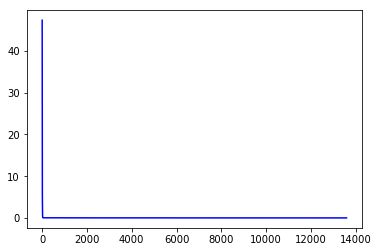

In [15]:
fig = plt.figure()
plt.plot(iters, cost, 'b')
plt.show()

In [16]:
w0, w1, cost, iters = gradient_descent((X10, Y), 0.01)

Current model is: ([ 0.148] + [ 1.1712]x1)
Average Squared Error=[ 1.4251125]
Iteration:1
Current model is: ([ 0.1243872] + [ 0.99341568]x1)
Average Squared Error=[ 0.06113793]
Iteration:2
Current model is: ([ 0.1268476] + [ 1.02056791]x1)
Average Squared Error=[ 0.02956323]
Iteration:3
Current model is: ([ 0.12534887] + [ 1.01658607]x1)
Average Squared Error=[ 0.02873996]
Iteration:4
Current model is: ([ 0.1244535] + [ 1.01733386]x1)
Average Squared Error=[ 0.02862672]
Iteration:5
Current model is: ([ 0.12346835] + [ 1.01736289]x1)
Average Squared Error=[ 0.02853019]
Iteration:6
Current model is: ([ 0.12249873] + [ 1.01750088]x1)
Average Squared Error=[ 0.02843437]
Iteration:7
Current model is: ([ 0.12152863] + [ 1.01762207]x1)
Average Squared Error=[ 0.02833887]
Iteration:8
Current model is: ([ 0.12056047] + [ 1.01774557]x1)
Average Squared Error=[ 0.02824369]
Iteration:9
Current model is: ([ 0.1195939] + [ 1.01786848]x1)
Average Squared Error=[ 0.02814883]
Iteration:10
Current model

Average Squared Error=[ 0.02079537]
Iteration:100
Current model is: ([ 0.03810614] + [ 1.02823516]x1)
Average Squared Error=[ 0.02072553]
Iteration:101
Current model is: ([ 0.03727815] + [ 1.0283405]x1)
Average Squared Error=[ 0.02065592]
Iteration:102
Current model is: ([ 0.03645156] + [ 1.02844566]x1)
Average Squared Error=[ 0.02058655]
Iteration:103
Current model is: ([ 0.03562635] + [ 1.02855064]x1)
Average Squared Error=[ 0.02051741]
Iteration:104
Current model is: ([ 0.03480253] + [ 1.02865544]x1)
Average Squared Error=[ 0.0204485]
Iteration:105
Current model is: ([ 0.0339801] + [ 1.02876007]x1)
Average Squared Error=[ 0.02037982]
Iteration:106
Current model is: ([ 0.03315905] + [ 1.02886452]x1)
Average Squared Error=[ 0.02031137]
Iteration:107
Current model is: ([ 0.03233938] + [ 1.0289688]x1)
Average Squared Error=[ 0.02024316]
Iteration:108
Current model is: ([ 0.03152108] + [ 1.0290729]x1)
Average Squared Error=[ 0.02017517]
Iteration:109
Current model is: ([ 0.03070416] + [ 

Average Squared Error=[ 0.01562349]
Iteration:185
Current model is: ([-0.02752803] + [ 1.03658498]x1)
Average Squared Error=[ 0.01557102]
Iteration:186
Current model is: ([-0.02824571] + [ 1.03667628]x1)
Average Squared Error=[ 0.01551872]
Iteration:187
Current model is: ([-0.02896218] + [ 1.03676743]x1)
Average Squared Error=[ 0.0154666]
Iteration:188
Current model is: ([-0.02967745] + [ 1.03685843]x1)
Average Squared Error=[ 0.01541466]
Iteration:189
Current model is: ([-0.03039151] + [ 1.03694927]x1)
Average Squared Error=[ 0.01536289]
Iteration:190
Current model is: ([-0.03110438] + [ 1.03703996]x1)
Average Squared Error=[ 0.01531129]
Iteration:191
Current model is: ([-0.03181604] + [ 1.03713049]x1)
Average Squared Error=[ 0.01525987]
Iteration:192
Current model is: ([-0.03252651] + [ 1.03722088]x1)
Average Squared Error=[ 0.01520861]
Iteration:193
Current model is: ([-0.03323579] + [ 1.03731111]x1)
Average Squared Error=[ 0.01515754]
Iteration:194
Current model is: ([-0.03394387] 

Current model is: ([-0.08628106] + [ 1.0440594]x1)
Average Squared Error=[ 0.01158098]
Iteration:274
Current model is: ([-0.08689999] + [ 1.04413814]x1)
Average Squared Error=[ 0.01154208]
Iteration:275
Current model is: ([-0.08751789] + [ 1.04421674]x1)
Average Squared Error=[ 0.01150332]
Iteration:276
Current model is: ([-0.08813474] + [ 1.04429522]x1)
Average Squared Error=[ 0.01146468]
Iteration:277
Current model is: ([-0.08875056] + [ 1.04437356]x1)
Average Squared Error=[ 0.01142618]
Iteration:278
Current model is: ([-0.08936534] + [ 1.04445177]x1)
Average Squared Error=[ 0.01138781]
Iteration:279
Current model is: ([-0.08997909] + [ 1.04452985]x1)
Average Squared Error=[ 0.01134956]
Iteration:280
Current model is: ([-0.0905918] + [ 1.0446078]x1)
Average Squared Error=[ 0.01131144]
Iteration:281
Current model is: ([-0.09120349] + [ 1.04468562]x1)
Average Squared Error=[ 0.01127345]
Iteration:282
Current model is: ([-0.09181415] + [ 1.0447633]x1)
Average Squared Error=[ 0.01123559

Iteration:406
Current model is: ([-0.16010301] + [ 1.05345085]x1)
Average Squared Error=[ 0.00740332]
Iteration:407
Current model is: ([-0.16059787] + [ 1.0535138]x1)
Average Squared Error=[ 0.00737846]
Iteration:408
Current model is: ([-0.1610919] + [ 1.05357665]x1)
Average Squared Error=[ 0.00735368]
Iteration:409
Current model is: ([-0.1615851] + [ 1.05363939]x1)
Average Squared Error=[ 0.00732898]
Iteration:410
Current model is: ([-0.16207747] + [ 1.05370203]x1)
Average Squared Error=[ 0.00730436]
Iteration:411
Current model is: ([-0.16256902] + [ 1.05376456]x1)
Average Squared Error=[ 0.00727983]
Iteration:412
Current model is: ([-0.16305973] + [ 1.05382699]x1)
Average Squared Error=[ 0.00725538]
Iteration:413
Current model is: ([-0.16354962] + [ 1.05388932]x1)
Average Squared Error=[ 0.00723102]
Iteration:414
Current model is: ([-0.16403869] + [ 1.05395153]x1)
Average Squared Error=[ 0.00720673]
Iteration:415
Current model is: ([-0.16452694] + [ 1.05401365]x1)
Average Squared Err

Average Squared Error=[ 0.00496092]
Iteration:526
Current model is: ([-0.21392205] + [ 1.06029757]x1)
Average Squared Error=[ 0.00494426]
Iteration:527
Current model is: ([-0.21432646] + [ 1.06034902]x1)
Average Squared Error=[ 0.00492766]
Iteration:528
Current model is: ([-0.21473019] + [ 1.06040038]x1)
Average Squared Error=[ 0.00491111]
Iteration:529
Current model is: ([-0.21513324] + [ 1.06045166]x1)
Average Squared Error=[ 0.00489461]
Iteration:530
Current model is: ([-0.21553561] + [ 1.06050284]x1)
Average Squared Error=[ 0.00487817]
Iteration:531
Current model is: ([-0.21593731] + [ 1.06055395]x1)
Average Squared Error=[ 0.00486179]
Iteration:532
Current model is: ([-0.21633833] + [ 1.06060496]x1)
Average Squared Error=[ 0.00484546]
Iteration:533
Current model is: ([-0.21673868] + [ 1.0606559]x1)
Average Squared Error=[ 0.00482919]
Iteration:534
Current model is: ([-0.21713835] + [ 1.06070674]x1)
Average Squared Error=[ 0.00481297]
Iteration:535
Current model is: ([-0.21753736] 

Current model is: ([-0.26344731] + [ 1.06659805]x1)
Average Squared Error=[ 0.00311845]
Iteration:664
Current model is: ([-0.26376848] + [ 1.06663891]x1)
Average Squared Error=[ 0.00310798]
Iteration:665
Current model is: ([-0.26408912] + [ 1.0666797]x1)
Average Squared Error=[ 0.00309754]
Iteration:666
Current model is: ([-0.26440921] + [ 1.06672042]x1)
Average Squared Error=[ 0.00308713]
Iteration:667
Current model is: ([-0.26472877] + [ 1.06676108]x1)
Average Squared Error=[ 0.00307677]
Iteration:668
Current model is: ([-0.26504779] + [ 1.06680166]x1)
Average Squared Error=[ 0.00306643]
Iteration:669
Current model is: ([-0.26536627] + [ 1.06684218]x1)
Average Squared Error=[ 0.00305613]
Iteration:670
Current model is: ([-0.26568422] + [ 1.06688263]x1)
Average Squared Error=[ 0.00304587]
Iteration:671
Current model is: ([-0.26600163] + [ 1.06692301]x1)
Average Squared Error=[ 0.00303564]
Iteration:672
Current model is: ([-0.26631851] + [ 1.06696332]x1)
Average Squared Error=[ 0.00302

Average Squared Error=[ 0.00228067]
Iteration:757
Current model is: ([-0.2913953] + [ 1.07015353]x1)
Average Squared Error=[ 0.00227301]
Iteration:758
Current model is: ([-0.29166951] + [ 1.07018841]x1)
Average Squared Error=[ 0.00226537]
Iteration:759
Current model is: ([-0.29194325] + [ 1.07022324]x1)
Average Squared Error=[ 0.00225776]
Iteration:760
Current model is: ([-0.29221653] + [ 1.070258]x1)
Average Squared Error=[ 0.00225018]
Iteration:761
Current model is: ([-0.29248935] + [ 1.07029271]x1)
Average Squared Error=[ 0.00224262]
Iteration:762
Current model is: ([-0.29276171] + [ 1.07032736]x1)
Average Squared Error=[ 0.00223509]
Iteration:763
Current model is: ([-0.29303362] + [ 1.07036195]x1)
Average Squared Error=[ 0.00222759]
Iteration:764
Current model is: ([-0.29330507] + [ 1.07039648]x1)
Average Squared Error=[ 0.0022201]
Iteration:765
Current model is: ([-0.29357606] + [ 1.07043096]x1)
Average Squared Error=[ 0.00221265]
Iteration:766
Current model is: ([-0.2938466] + [ 

Current model is: ([-0.31265466] + [ 1.07285809]x1)
Average Squared Error=[ 0.00171923]
Iteration:841
Current model is: ([-0.31289313] + [ 1.07288843]x1)
Average Squared Error=[ 0.00171346]
Iteration:842
Current model is: ([-0.3131312] + [ 1.07291872]x1)
Average Squared Error=[ 0.0017077]
Iteration:843
Current model is: ([-0.31336887] + [ 1.07294895]x1)
Average Squared Error=[ 0.00170197]
Iteration:844
Current model is: ([-0.31360615] + [ 1.07297914]x1)
Average Squared Error=[ 0.00169625]
Iteration:845
Current model is: ([-0.31384302] + [ 1.07300927]x1)
Average Squared Error=[ 0.00169055]
Iteration:846
Current model is: ([-0.31407949] + [ 1.07303936]x1)
Average Squared Error=[ 0.00168488]
Iteration:847
Current model is: ([-0.31431557] + [ 1.07306939]x1)
Average Squared Error=[ 0.00167922]
Iteration:848
Current model is: ([-0.31455125] + [ 1.07309937]x1)
Average Squared Error=[ 0.00167358]
Iteration:849
Current model is: ([-0.31478654] + [ 1.0731293]x1)
Average Squared Error=[ 0.0016679

Average Squared Error=[ 0.00116373]
Iteration:957
Current model is: ([-0.33800325] + [ 1.07608288]x1)
Average Squared Error=[ 0.00115982]
Iteration:958
Current model is: ([-0.33819911] + [ 1.07610779]x1)
Average Squared Error=[ 0.00115593]
Iteration:959
Current model is: ([-0.33839465] + [ 1.07613267]x1)
Average Squared Error=[ 0.00115205]
Iteration:960
Current model is: ([-0.33858987] + [ 1.07615751]x1)
Average Squared Error=[ 0.00114818]
Iteration:961
Current model is: ([-0.33878475] + [ 1.0761823]x1)
Average Squared Error=[ 0.00114432]
Iteration:962
Current model is: ([-0.33897931] + [ 1.07620705]x1)
Average Squared Error=[ 0.00114048]
Iteration:963
Current model is: ([-0.33917353] + [ 1.07623176]x1)
Average Squared Error=[ 0.00113665]
Iteration:964
Current model is: ([-0.33936744] + [ 1.07625643]x1)
Average Squared Error=[ 0.00113283]
Iteration:965
Current model is: ([-0.33956101] + [ 1.07628105]x1)
Average Squared Error=[ 0.00112903]
Iteration:966
Current model is: ([-0.33975427] 

Iteration:1077
Current model is: ([-0.35930517] + [ 1.07879285]x1)
Average Squared Error=[ 0.00077458]
Iteration:1078
Current model is: ([-0.35946523] + [ 1.07881322]x1)
Average Squared Error=[ 0.00077198]
Iteration:1079
Current model is: ([-0.35962503] + [ 1.07883355]x1)
Average Squared Error=[ 0.00076939]
Iteration:1080
Current model is: ([-0.35978456] + [ 1.07885384]x1)
Average Squared Error=[ 0.0007668]
Iteration:1081
Current model is: ([-0.35994382] + [ 1.0788741]x1)
Average Squared Error=[ 0.00076423]
Iteration:1082
Current model is: ([-0.36010282] + [ 1.07889433]x1)
Average Squared Error=[ 0.00076166]
Iteration:1083
Current model is: ([-0.36026155] + [ 1.07891452]x1)
Average Squared Error=[ 0.0007591]
Iteration:1084
Current model is: ([-0.36042001] + [ 1.07893468]x1)
Average Squared Error=[ 0.00075655]
Iteration:1085
Current model is: ([-0.3605782] + [ 1.07895481]x1)
Average Squared Error=[ 0.00075401]
Iteration:1086
Current model is: ([-0.36073613] + [ 1.0789749]x1)
Average Squ

Average Squared Error=[ 0.0005684]
Iteration:1170
Current model is: ([-0.37309711] + [ 1.08054743]x1)
Average Squared Error=[ 0.00056649]
Iteration:1171
Current model is: ([-0.373234] + [ 1.08056485]x1)
Average Squared Error=[ 0.00056458]
Iteration:1172
Current model is: ([-0.37337066] + [ 1.08058223]x1)
Average Squared Error=[ 0.00056269]
Iteration:1173
Current model is: ([-0.37350709] + [ 1.08059959]x1)
Average Squared Error=[ 0.0005608]
Iteration:1174
Current model is: ([-0.37364329] + [ 1.08061692]x1)
Average Squared Error=[ 0.00055892]
Iteration:1175
Current model is: ([-0.37377926] + [ 1.08063421]x1)
Average Squared Error=[ 0.00055704]
Iteration:1176
Current model is: ([-0.373915] + [ 1.08065148]x1)
Average Squared Error=[ 0.00055517]
Iteration:1177
Current model is: ([-0.37405051] + [ 1.08066872]x1)
Average Squared Error=[ 0.0005533]
Iteration:1178
Current model is: ([-0.3741858] + [ 1.08068593]x1)
Average Squared Error=[ 0.00055144]
Iteration:1179
Current model is: ([-0.3743208

Current model is: ([-0.38453944] + [ 1.0820031]x1)
Average Squared Error=[ 0.0004185]
Iteration:1261
Current model is: ([-0.3846571] + [ 1.08201807]x1)
Average Squared Error=[ 0.0004171]
Iteration:1262
Current model is: ([-0.38477456] + [ 1.08203301]x1)
Average Squared Error=[ 0.00041569]
Iteration:1263
Current model is: ([-0.38489182] + [ 1.08204793]x1)
Average Squared Error=[ 0.0004143]
Iteration:1264
Current model is: ([-0.38500889] + [ 1.08206282]x1)
Average Squared Error=[ 0.00041291]
Iteration:1265
Current model is: ([-0.38512576] + [ 1.08207769]x1)
Average Squared Error=[ 0.00041152]
Iteration:1266
Current model is: ([-0.38524243] + [ 1.08209253]x1)
Average Squared Error=[ 0.00041014]
Iteration:1267
Current model is: ([-0.3853589] + [ 1.08210735]x1)
Average Squared Error=[ 0.00040876]
Iteration:1268
Current model is: ([-0.38547518] + [ 1.08212214]x1)
Average Squared Error=[ 0.00040739]
Iteration:1269
Current model is: ([-0.38559127] + [ 1.08213691]x1)
Average Squared Error=[ 0.0

Iteration:1375
Current model is: ([-0.39685215] + [ 1.08356949]x1)
Average Squared Error=[ 0.00028423]
Iteration:1376
Current model is: ([-0.39694912] + [ 1.08358183]x1)
Average Squared Error=[ 0.00028328]
Iteration:1377
Current model is: ([-0.39704592] + [ 1.08359414]x1)
Average Squared Error=[ 0.00028233]
Iteration:1378
Current model is: ([-0.39714255] + [ 1.08360643]x1)
Average Squared Error=[ 0.00028138]
Iteration:1379
Current model is: ([-0.39723903] + [ 1.08361871]x1)
Average Squared Error=[ 0.00028044]
Iteration:1380
Current model is: ([-0.39733534] + [ 1.08363096]x1)
Average Squared Error=[ 0.00027949]
Iteration:1381
Current model is: ([-0.3974315] + [ 1.08364319]x1)
Average Squared Error=[ 0.00027855]
Iteration:1382
Current model is: ([-0.39752749] + [ 1.0836554]x1)
Average Squared Error=[ 0.00027762]
Iteration:1383
Current model is: ([-0.39762331] + [ 1.0836676]x1)
Average Squared Error=[ 0.00027669]
Iteration:1384
Current model is: ([-0.39771898] + [ 1.08367977]x1)
Average S

Average Squared Error=[ 0.00014799]
Iteration:1570
Current model is: ([-0.41298562] + [ 1.08562195]x1)
Average Squared Error=[ 0.00014749]
Iteration:1571
Current model is: ([-0.41305547] + [ 1.08563084]x1)
Average Squared Error=[ 0.000147]
Iteration:1572
Current model is: ([-0.4131252] + [ 1.08563971]x1)
Average Squared Error=[ 0.0001465]
Iteration:1573
Current model is: ([-0.41319482] + [ 1.08564856]x1)
Average Squared Error=[ 0.00014601]
Iteration:1574
Current model is: ([-0.41326431] + [ 1.08565741]x1)
Average Squared Error=[ 0.00014552]
Iteration:1575
Current model is: ([-0.41333369] + [ 1.08566623]x1)
Average Squared Error=[ 0.00014503]
Iteration:1576
Current model is: ([-0.41340296] + [ 1.08567504]x1)
Average Squared Error=[ 0.00014455]
Iteration:1577
Current model is: ([-0.41347211] + [ 1.08568384]x1)
Average Squared Error=[ 0.00014406]
Iteration:1578
Current model is: ([-0.41354114] + [ 1.08569262]x1)
Average Squared Error=[ 0.00014358]
Iteration:1579
Current model is: ([-0.413

Current model is: ([-0.41876405] + [ 1.08635707]x1)
Average Squared Error=[ 0.00010933]
Iteration:1660
Current model is: ([-0.41882419] + [ 1.08636472]x1)
Average Squared Error=[ 0.00010896]
Iteration:1661
Current model is: ([-0.41888422] + [ 1.08637236]x1)
Average Squared Error=[ 0.0001086]
Iteration:1662
Current model is: ([-0.41894416] + [ 1.08637998]x1)
Average Squared Error=[ 0.00010823]
Iteration:1663
Current model is: ([-0.41900399] + [ 1.08638759]x1)
Average Squared Error=[ 0.00010787]
Iteration:1664
Current model is: ([-0.41906373] + [ 1.08639519]x1)
Average Squared Error=[ 0.00010751]
Iteration:1665
Current model is: ([-0.41912336] + [ 1.08640278]x1)
Average Squared Error=[ 0.00010715]
Iteration:1666
Current model is: ([-0.41918289] + [ 1.08641035]x1)
Average Squared Error=[ 0.00010679]
Iteration:1667
Current model is: ([-0.41924232] + [ 1.08641791]x1)
Average Squared Error=[ 0.00010643]
Iteration:1668
Current model is: ([-0.41930166] + [ 1.08642546]x1)
Average Squared Error=

Average Squared Error=[  8.10415557e-05]
Iteration:1749
Current model is: ([-0.42379083] + [ 1.08699656]x1)
Average Squared Error=[  8.07693759e-05]
Iteration:1750
Current model is: ([-0.42384252] + [ 1.08700314]x1)
Average Squared Error=[  8.04981102e-05]
Iteration:1751
Current model is: ([-0.42389412] + [ 1.0870097]x1)
Average Squared Error=[  8.02277555e-05]
Iteration:1752
Current model is: ([-0.42394563] + [ 1.08701626]x1)
Average Squared Error=[  7.99583088e-05]
Iteration:1753
Current model is: ([-0.42399706] + [ 1.0870228]x1)
Average Squared Error=[  7.96897671e-05]
Iteration:1754
Current model is: ([-0.4240484] + [ 1.08702933]x1)
Average Squared Error=[  7.94221273e-05]
Iteration:1755
Current model is: ([-0.42409966] + [ 1.08703585]x1)
Average Squared Error=[  7.91553863e-05]
Iteration:1756
Current model is: ([-0.42415083] + [ 1.08704236]x1)
Average Squared Error=[  7.88895413e-05]
Iteration:1757
Current model is: ([-0.42420191] + [ 1.08704886]x1)
Average Squared Error=[  7.8624

Current model is: ([-0.4283328] + [ 1.08757438]x1)
Average Squared Error=[  5.86742712e-05]
Iteration:1845
Current model is: ([-0.42837686] + [ 1.08757999]x1)
Average Squared Error=[  5.84772124e-05]
Iteration:1846
Current model is: ([-0.42842084] + [ 1.08758558]x1)
Average Squared Error=[  5.82808154e-05]
Iteration:1847
Current model is: ([-0.42846475] + [ 1.08759117]x1)
Average Squared Error=[  5.80850780e-05]
Iteration:1848
Current model is: ([-0.42850858] + [ 1.08759674]x1)
Average Squared Error=[  5.78899980e-05]
Iteration:1849
Current model is: ([-0.42855234] + [ 1.08760231]x1)
Average Squared Error=[  5.76955732e-05]
Iteration:1850
Current model is: ([-0.42859602] + [ 1.08760787]x1)
Average Squared Error=[  5.75018013e-05]
Iteration:1851
Current model is: ([-0.42863964] + [ 1.08761342]x1)
Average Squared Error=[  5.73086803e-05]
Iteration:1852
Current model is: ([-0.42868318] + [ 1.08761896]x1)
Average Squared Error=[  5.71162078e-05]
Iteration:1853
Current model is: ([-0.428726

Iteration:1931
Current model is: ([-0.43190133] + [ 1.08802836]x1)
Average Squared Error=[  4.37861761e-05]
Iteration:1932
Current model is: ([-0.43193938] + [ 1.0880332]x1)
Average Squared Error=[  4.36391193e-05]
Iteration:1933
Current model is: ([-0.43197738] + [ 1.08803804]x1)
Average Squared Error=[  4.34925563e-05]
Iteration:1934
Current model is: ([-0.43201531] + [ 1.08804286]x1)
Average Squared Error=[  4.33464856e-05]
Iteration:1935
Current model is: ([-0.43205317] + [ 1.08804768]x1)
Average Squared Error=[  4.32009055e-05]
Iteration:1936
Current model is: ([-0.43209097] + [ 1.08805249]x1)
Average Squared Error=[  4.30558143e-05]
Iteration:1937
Current model is: ([-0.43212871] + [ 1.08805729]x1)
Average Squared Error=[  4.29112105e-05]
Iteration:1938
Current model is: ([-0.43216639] + [ 1.08806208]x1)
Average Squared Error=[  4.27670922e-05]
Iteration:1939
Current model is: ([-0.432204] + [ 1.08806687]x1)
Average Squared Error=[  4.26234580e-05]
Iteration:1940
Current model is

Current model is: ([-0.43578958] + [ 1.08852301]x1)
Average Squared Error=[  3.00400241e-05]
Iteration:2044
Current model is: ([-0.43582111] + [ 1.08852703]x1)
Average Squared Error=[  2.99391340e-05]
Iteration:2045
Current model is: ([-0.43585257] + [ 1.08853103]x1)
Average Squared Error=[  2.98385828e-05]
Iteration:2046
Current model is: ([-0.43588399] + [ 1.08853503]x1)
Average Squared Error=[  2.97383692e-05]
Iteration:2047
Current model is: ([-0.43591536] + [ 1.08853902]x1)
Average Squared Error=[  2.96384923e-05]
Iteration:2048
Current model is: ([-0.43594667] + [ 1.088543]x1)
Average Squared Error=[  2.95389507e-05]
Iteration:2049
Current model is: ([-0.43597793] + [ 1.08854698]x1)
Average Squared Error=[  2.94397435e-05]
Iteration:2050
Current model is: ([-0.43600913] + [ 1.08855095]x1)
Average Squared Error=[  2.93408695e-05]
Iteration:2051
Current model is: ([-0.43604028] + [ 1.08855491]x1)
Average Squared Error=[  2.92423276e-05]
Iteration:2052
Current model is: ([-0.4360713

Current model is: ([-0.44087449] + [ 1.0891699]x1)
Average Squared Error=[  1.59596850e-05]
Iteration:2232
Current model is: ([-0.44089746] + [ 1.08917283]x1)
Average Squared Error=[  1.59060840e-05]
Iteration:2233
Current model is: ([-0.4409204] + [ 1.08917574]x1)
Average Squared Error=[  1.58526631e-05]
Iteration:2234
Current model is: ([-0.4409433] + [ 1.08917866]x1)
Average Squared Error=[  1.57994216e-05]
Iteration:2235
Current model is: ([-0.44096616] + [ 1.08918157]x1)
Average Squared Error=[  1.57463589e-05]
Iteration:2236
Current model is: ([-0.44098898] + [ 1.08918447]x1)
Average Squared Error=[  1.56934744e-05]
Iteration:2237
Current model is: ([-0.44101177] + [ 1.08918737]x1)
Average Squared Error=[  1.56407675e-05]
Iteration:2238
Current model is: ([-0.44103451] + [ 1.08919026]x1)
Average Squared Error=[  1.55882377e-05]
Iteration:2239
Current model is: ([-0.44105722] + [ 1.08919315]x1)
Average Squared Error=[  1.55358842e-05]
Iteration:2240
Current model is: ([-0.44107989

Average Squared Error=[  9.93155709e-06]
Iteration:2373
Current model is: ([-0.44377918] + [ 1.08953943]x1)
Average Squared Error=[  9.89820174e-06]
Iteration:2374
Current model is: ([-0.44379728] + [ 1.08954173]x1)
Average Squared Error=[  9.86495841e-06]
Iteration:2375
Current model is: ([-0.44381534] + [ 1.08954403]x1)
Average Squared Error=[  9.83182673e-06]
Iteration:2376
Current model is: ([-0.44383338] + [ 1.08954633]x1)
Average Squared Error=[  9.79880633e-06]
Iteration:2377
Current model is: ([-0.44385138] + [ 1.08954862]x1)
Average Squared Error=[  9.76589682e-06]
Iteration:2378
Current model is: ([-0.44386935] + [ 1.0895509]x1)
Average Squared Error=[  9.73309785e-06]
Iteration:2379
Current model is: ([-0.4438873] + [ 1.08955319]x1)
Average Squared Error=[  9.70040902e-06]
Iteration:2380
Current model is: ([-0.44390521] + [ 1.08955547]x1)
Average Squared Error=[  9.66782999e-06]
Iteration:2381
Current model is: ([-0.44392309] + [ 1.08955774]x1)
Average Squared Error=[  9.635

Average Squared Error=[  6.58825161e-06]
Iteration:2495
Current model is: ([-0.44577662] + [ 1.08979354]x1)
Average Squared Error=[  6.56612482e-06]
Iteration:2496
Current model is: ([-0.44579136] + [ 1.08979542]x1)
Average Squared Error=[  6.54407235e-06]
Iteration:2497
Current model is: ([-0.44580607] + [ 1.08979729]x1)
Average Squared Error=[  6.52209394e-06]
Iteration:2498
Current model is: ([-0.44582076] + [ 1.08979916]x1)
Average Squared Error=[  6.50018934e-06]
Iteration:2499
Current model is: ([-0.44583543] + [ 1.08980102]x1)
Average Squared Error=[  6.47835832e-06]
Iteration:2500
Current model is: ([-0.44585006] + [ 1.08980288]x1)
Average Squared Error=[  6.45660061e-06]
Iteration:2501
Current model is: ([-0.44586468] + [ 1.08980474]x1)
Average Squared Error=[  6.43491597e-06]
Iteration:2502
Current model is: ([-0.44587927] + [ 1.0898066]x1)
Average Squared Error=[  6.41330417e-06]
Iteration:2503
Current model is: ([-0.44589383] + [ 1.08980845]x1)
Average Squared Error=[  6.39

Iteration:2588
Current model is: ([-0.44704646] + [ 1.08995509]x1)
Average Squared Error=[  4.80211102e-06]
Iteration:2589
Current model is: ([-0.44705906] + [ 1.08995669]x1)
Average Squared Error=[  4.78598302e-06]
Iteration:2590
Current model is: ([-0.44707164] + [ 1.08995829]x1)
Average Squared Error=[  4.76990919e-06]
Iteration:2591
Current model is: ([-0.4470842] + [ 1.08995989]x1)
Average Squared Error=[  4.75388935e-06]
Iteration:2592
Current model is: ([-0.44709674] + [ 1.08996148]x1)
Average Squared Error=[  4.73792331e-06]
Iteration:2593
Current model is: ([-0.44710926] + [ 1.08996308]x1)
Average Squared Error=[  4.72201089e-06]
Iteration:2594
Current model is: ([-0.44712176] + [ 1.08996467]x1)
Average Squared Error=[  4.70615191e-06]
Iteration:2595
Current model is: ([-0.44713424] + [ 1.08996625]x1)
Average Squared Error=[  4.69034620e-06]
Iteration:2596
Current model is: ([-0.44714669] + [ 1.08996784]x1)
Average Squared Error=[  4.67459357e-06]
Iteration:2597
Current model 

Iteration:2689
Current model is: ([-0.44821812] + [ 1.09010414]x1)
Average Squared Error=[  3.41874665e-06]
Iteration:2690
Current model is: ([-0.44822876] + [ 1.0901055]x1)
Average Squared Error=[  3.40726472e-06]
Iteration:2691
Current model is: ([-0.44823937] + [ 1.09010685]x1)
Average Squared Error=[  3.39582135e-06]
Iteration:2692
Current model is: ([-0.44824997] + [ 1.0901082]x1)
Average Squared Error=[  3.38441641e-06]
Iteration:2693
Current model is: ([-0.44826055] + [ 1.09010954]x1)
Average Squared Error=[  3.37304977e-06]
Iteration:2694
Current model is: ([-0.44827112] + [ 1.09011088]x1)
Average Squared Error=[  3.36172131e-06]
Iteration:2695
Current model is: ([-0.44828166] + [ 1.09011223]x1)
Average Squared Error=[  3.35043089e-06]
Iteration:2696
Current model is: ([-0.44829219] + [ 1.09011357]x1)
Average Squared Error=[  3.33917840e-06]
Iteration:2697
Current model is: ([-0.4483027] + [ 1.0901149]x1)
Average Squared Error=[  3.32796370e-06]
Iteration:2698
Current model is:

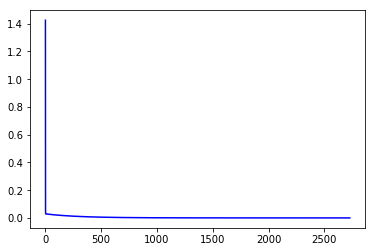

In [17]:
fig = plt.figure()
plt.plot(iters, cost, 'b')
plt.show()

In [21]:
w0, w1, cost, iters = gradient_descent((X10, Y), 0.1)

Current model is: ([ 1.48] + [ 11.712]x1)
Average Squared Error=[ 6693.55220992]
Iteration:1
Current model is: ([-14.20128] + [-111.474432]x1)
Average Squared Error=[ 740661.40406305]
Iteration:2
Current model is: ([ 150.64215808] + [ 1184.36157235]x1)
Average Squared Error=[ 81956719.62141916]
Iteration:3
Current model is: ([-1583.48693772] + [-12446.77391947]x1)
Average Squared Error=[  9.06879189e+09]
Iteration:4
Current model is: ([ 16658.04489385] + [ 130941.78842192]x1)
Average Squared Error=[  1.00349290e+12]
Iteration:5
Current model is: ([-175228.25941248] + [-1377390.19777607]x1)
Average Squared Error=[  1.11039928e+14]
Iteration:6
Current model is: ([ 1843260.75726756] + [ 14489045.48976746]x1)
Average Squared Error=[  1.22869486e+16]
Iteration:7
Current model is: ([-19389615.41945109] + [ -1.52413058e+08]x1)
Average Squared Error=[  1.35959297e+18]
Iteration:8
Current model is: ([  2.03963113e+08] + [  1.60326242e+09]x1)
Average Squared Error=[  1.50443622e+20]
Iteration:9


Current model is: ([  2.14751199e+102] + [  1.68806272e+103]x1)
Average Squared Error=[  1.66779133e+208]
Iteration:101
Current model is: ([ -2.25900936e+103] + [ -1.77570580e+104]x1)
Average Squared Error=[  1.84546826e+210]
Iteration:102
Current model is: ([  2.37629561e+104] + [  1.86789925e+105]x1)
Average Squared Error=[  2.04207387e+212]
Iteration:103
Current model is: ([ -2.49967128e+105] + [ -1.96487932e+106]x1)
Average Squared Error=[  2.25962472e+214]
Iteration:104
Current model is: ([  2.62945253e+106] + [  2.06689454e+107]x1)
Average Squared Error=[  2.50035219e+216]
Iteration:105
Current model is: ([ -2.76597193e+107] + [ -2.17420631e+108]x1)
Average Squared Error=[  2.76672539e+218]
Iteration:106
Current model is: ([  2.90957933e+108] + [  2.28708964e+109]x1)
Average Squared Error=[  3.06147646e+220]
Iteration:107
Current model is: ([ -3.06064273e+109] + [ -2.40583379e+110]x1)
Average Squared Error=[  3.38762861e+222]
Iteration:108
Current model is: ([  3.21954924e+110] +

/home/mscuser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: overflow encountered in square



Iteration:189
Current model is: ([ -1.94255024e+193] + [ -1.52695150e+194]x1)
Average Squared Error=[ inf]
Iteration:190
Current model is: ([  2.04340614e+194] + [  1.60622979e+195]x1)
Average Squared Error=[ inf]
Iteration:191
Current model is: ([ -2.14949841e+195] + [ -1.68962416e+196]x1)
Average Squared Error=[ inf]
Iteration:192
Current model is: ([  2.26109892e+196] + [  1.77734831e+197]x1)
Average Squared Error=[ inf]
Iteration:193
Current model is: ([ -2.37849365e+197] + [ -1.86962704e+198]x1)
Average Squared Error=[ inf]
Iteration:194
Current model is: ([  2.50198344e+198] + [  1.96669681e+199]x1)
Average Squared Error=[ inf]
Iteration:195
Current model is: ([ -2.63188473e+199] + [ -2.06880639e+200]x1)
Average Squared Error=[ inf]
Iteration:196
Current model is: ([  2.76853042e+200] + [  2.17621742e+201]x1)
Average Squared Error=[ inf]
Iteration:197
Current model is: ([ -2.91227065e+201] + [ -2.28920516e+202]x1)
Average Squared Error=[ inf]
Iteration:198
Current model is: ([  

Average Squared Error=[ inf]
Iteration:277
Current model is: ([ -1.67042310e+283] + [ -1.31304458e+284]x1)
Average Squared Error=[ inf]
Iteration:278
Current model is: ([  1.75715034e+284] + [  1.38121697e+285]x1)
Average Squared Error=[ inf]
Iteration:279
Current model is: ([ -1.84838040e+285] + [ -1.45292882e+286]x1)
Average Squared Error=[ inf]
Iteration:280
Current model is: ([  1.94434707e+286] + [  1.52836391e+287]x1)
Average Squared Error=[ inf]
Iteration:281
Current model is: ([ -2.04529626e+287] + [ -1.60771553e+288]x1)
Average Squared Error=[ inf]
Iteration:282
Current model is: ([  2.15148666e+288] + [  1.69118704e+289]x1)
Average Squared Error=[ inf]
Iteration:283
Current model is: ([ -2.26319040e+289] + [ -1.77899233e+290]x1)
Average Squared Error=[ inf]
Iteration:284
Current model is: ([  2.38069373e+290] + [  1.87135642e+291]x1)
Average Squared Error=[ inf]
Iteration:285
Current model is: ([ -2.50429774e+291] + [ -1.96851598e+292]x1)
Average Squared Error=[ inf]
Iteratio

/home/mscuser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply
/home/mscuser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in add


Average Squared Error=[ nan]
Iteration:326
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:327
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:328
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:329
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:330
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:331
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:332
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:333
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:334
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:335
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:336
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:337
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:475
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:476
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:477
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:478
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:479
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:480
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:481
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:482
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:483
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:484
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:485
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:486
Current model is: ([ nan] + 

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:620
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:621
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:622
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:623
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:624
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:625
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:626
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:627
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:628
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:629
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:630
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:631
Current model is: ([ nan] + 

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:738
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:739
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:740
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:741
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:742
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:743
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:744
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:745
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:746
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:747
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:748
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:749
Current model is: ([ nan] + 

Average Squared Error=[ nan]
Iteration:968
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:969
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:970
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:971
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:972
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:973
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:974
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:975
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:976
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:977
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:978
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:979
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]

Average Squared Error=[ nan]
Iteration:1188
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1189
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1190
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1191
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1192
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1193
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1194
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1195
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1196
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1197
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1198
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1199
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Average Squared Error=[ nan]
Iteration:1364
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1365
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1366
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1367
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1368
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1369
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1370
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1371
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1372
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1373
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1374
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1375
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:1502
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1503
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1504
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1505
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1506
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1507
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1508
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1509
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1510
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1511
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1512
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1513
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1514
C

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1672
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1673
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1674
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1675
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1676
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1677
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1678
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1679
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1680
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1681
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1682
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1683
Current model is

Average Squared Error=[ nan]
Iteration:1971
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1972
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1973
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1974
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1975
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1976
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1977
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1978
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1979
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1980
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1981
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:1982
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Average Squared Error=[ nan]
Iteration:2211
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2212
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2213
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2214
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2215
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2216
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2217
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2218
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2219
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2220
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2221
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2222
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:2495
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2496
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2497
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2498
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2499
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2500
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2501
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2502
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2503
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2504
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2505
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2506
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2507
C

Iteration:2722
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2723
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2724
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2725
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2726
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2727
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2728
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2729
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2730
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2731
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2732
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2733
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2734
C

Iteration:2838
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2839
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2840
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2841
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2842
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2843
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2844
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2845
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2846
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2847
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2848
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2849
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2850
C

Average Squared Error=[ nan]
Iteration:2958
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2959
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2960
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2961
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2962
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2963
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2964
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2965
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2966
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2967
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2968
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:2969
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:3090
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3091
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3092
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3093
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3094
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3095
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3096
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3097
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3098
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3099
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3100
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3101
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3102
C

Iteration:3205
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3206
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3207
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3208
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3209
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3210
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3211
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3212
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3213
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3214
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3215
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3216
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3217
C

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3369
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3370
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3371
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3372
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3373
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3374
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3375
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3376
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3377
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3378
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3379
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3380
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3542
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3543
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3544
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3545
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3546
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3547
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3548
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3549
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3550
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3551
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3552
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3553
Current model is

Iteration:3803
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3804
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3805
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3806
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3807
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3808
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3809
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3810
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3811
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3812
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3813
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3814
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:3815
C

Iteration:4044
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4045
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4046
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4047
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4048
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4049
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4050
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4051
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4052
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4053
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4054
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4055
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4056
C

Iteration:4261
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4262
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4263
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4264
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4265
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4266
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4267
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4268
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4269
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4270
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4271
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4272
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4273
C

Iteration:4461
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4462
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4463
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4464
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4465
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4466
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4467
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4468
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4469
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4470
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4471
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4472
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4473
C

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4584
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4585
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4586
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4587
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4588
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4589
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4590
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4591
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4592
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4593
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4594
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4595
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4715
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4716
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4717
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4718
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4719
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4720
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4721
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4722
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4723
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4724
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4725
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4726
Current model is

Average Squared Error=[ nan]
Iteration:4837
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4838
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4839
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4840
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4841
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4842
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4843
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4844
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4845
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4846
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4847
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4848
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:4976
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4977
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4978
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4979
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4980
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4981
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4982
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4983
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4984
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4985
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4986
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4987
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:4988
C

Average Squared Error=[ nan]
Iteration:5105
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5106
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5107
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5108
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5109
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5110
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5111
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5112
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5113
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5114
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5115
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5116
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5258
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5259
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5260
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5261
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5262
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5263
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5264
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5265
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5266
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5267
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5268
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5269
Current model is

Average Squared Error=[ nan]
Iteration:5360
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5361
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5362
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5363
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5364
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5365
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5366
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5367
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5368
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5369
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5370
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5371
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Average Squared Error=[ nan]
Iteration:5492
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5493
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5494
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5495
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5496
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5497
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5498
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5499
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5500
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5501
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5502
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5503
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5610
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5611
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5612
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5613
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5614
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5615
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5616
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5617
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5618
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5619
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5620
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5621
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5745
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5746
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5747
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5748
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5749
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5750
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5751
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5752
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5753
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5754
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5755
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5756
Current model is

Iteration:5889
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5890
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5891
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5892
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5893
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5894
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5895
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5896
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5897
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5898
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5899
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5900
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:5901
C

Average Squared Error=[ nan]
Iteration:6079
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6080
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6081
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6082
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6083
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6084
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6085
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6086
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6087
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6088
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6089
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6090
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:6225
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6226
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6227
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6228
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6229
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6230
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6231
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6232
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6233
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6234
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6235
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6236
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6237
C

Iteration:6401
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6402
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6403
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6404
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6405
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6406
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6407
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6408
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6409
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6410
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6411
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6412
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6413
C

Average Squared Error=[ nan]
Iteration:6599
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6600
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6601
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6602
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6603
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6604
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6605
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6606
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6607
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6608
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6609
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6610
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:6745
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6746
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6747
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6748
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6749
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6750
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6751
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6752
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6753
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6754
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6755
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6756
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6757
C

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6908
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6909
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6910
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6911
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6912
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6913
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6914
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6915
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6916
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6917
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6918
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:6919
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7029
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7030
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7031
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7032
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7033
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7034
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7035
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7036
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7037
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7038
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7039
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7040
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7153
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7154
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7155
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7156
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7157
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7158
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7159
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7160
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7161
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7162
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7163
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7164
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7267
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7268
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7269
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7270
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7271
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7272
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7273
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7274
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7275
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7276
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7277
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7278
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7442
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7443
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7444
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7445
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7446
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7447
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7448
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7449
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7450
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7451
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7452
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7453
Current model is

Average Squared Error=[ nan]
Iteration:7601
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7602
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7603
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7604
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7605
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7606
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7607
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7608
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7609
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7610
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7611
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7612
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7718
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7719
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7720
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7721
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7722
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7723
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7724
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7725
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7726
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7727
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7728
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7729
Current model is

Average Squared Error=[ nan]
Iteration:7823
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7824
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7825
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7826
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7827
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7828
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7829
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7830
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7831
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7832
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7833
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:7834
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:8021
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8022
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8023
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8024
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8025
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8026
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8027
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8028
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8029
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8030
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8031
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8032
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8033
C

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8214
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8215
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8216
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8217
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8218
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8219
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8220
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8221
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8222
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8223
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8224
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8225
Current model is

Average Squared Error=[ nan]
Iteration:8326
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8327
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8328
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8329
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8330
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8331
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8332
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8333
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8334
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8335
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8336
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8337
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:8471
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8472
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8473
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8474
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8475
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8476
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8477
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8478
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8479
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8480
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8481
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8482
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8483
C

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8648
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8649
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8650
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8651
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8652
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8653
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8654
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8655
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8656
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8657
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8658
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8659
Current model is

Iteration:8791
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8792
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8793
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8794
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8795
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8796
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8797
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8798
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8799
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8800
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8801
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8802
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8803
C

Average Squared Error=[ nan]
Iteration:8917
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8918
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8919
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8920
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8921
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8922
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8923
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8924
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8925
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8926
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8927
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:8928
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Iteration:9080
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9081
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9082
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9083
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9084
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9085
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9086
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9087
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9088
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9089
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9090
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9091
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9092
C

Average Squared Error=[ nan]
Iteration:9353
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9354
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9355
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9356
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9357
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9358
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9359
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9360
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9361
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9362
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9363
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9364
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Average Squared Error=[ nan]
Iteration:9691
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9692
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9693
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9694
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9695
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9696
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9697
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9698
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9699
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9700
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9701
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9702
Current model is: ([ nan] + [ nan]x1)
Average Squared 

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9950
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9951
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9952
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9953
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9954
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9955
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9956
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9957
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9958
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9959
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9960
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:9961
Current model is

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10189
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10190
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10191
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10192
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10193
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10194
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10195
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10196
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10197
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10198
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10199
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10200
Curr

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10530
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10531
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10532
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10533
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10534
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10535
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10536
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10537
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10538
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10539
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10540
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10541
Curr

Average Squared Error=[ nan]
Iteration:10872
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10873
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10874
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10875
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10876
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10877
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10878
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10879
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10880
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10881
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10882
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:10883
Current model is: ([ nan] + [ nan]x1)
Aver

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11243
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11244
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11245
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11246
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11247
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11248
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11249
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11250
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11251
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11252
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11253
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11254
Curr

Average Squared Error=[ nan]
Iteration:11350
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11351
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11352
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11353
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11354
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11355
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11356
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11357
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11358
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11359
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11360
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11361
Current model is: ([ nan] + [ nan]x1)
Aver

Iteration:11492
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11493
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11494
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11495
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11496
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11497
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11498
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11499
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11500
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11501
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11502
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11503
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Average Squared Error=[ nan]
Iteration:11660
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11661
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11662
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11663
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11664
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11665
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11666
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11667
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11668
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11669
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11670
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11671
Current model is: ([ nan] + [ nan]x1)
Aver

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11985
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11986
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11987
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11988
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11989
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11990
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11991
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11992
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11993
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11994
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11995
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:11996
Curr

Iteration:12190
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12191
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12192
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12193
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12194
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12195
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12196
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12197
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12198
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12199
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12200
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12201
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Iteration:12391
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12392
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12393
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12394
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12395
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12396
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12397
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12398
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12399
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12400
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12401
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12402
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Iteration:12620
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12621
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12622
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12623
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12624
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12625
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12626
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12627
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12628
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12629
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12630
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12631
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Iteration:12965
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12966
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12967
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12968
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12969
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12970
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12971
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12972
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12973
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12974
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12975
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:12976
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Average Squared Error=[ nan]
Iteration:13151
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13152
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13153
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13154
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13155
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13156
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13157
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13158
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13159
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13160
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13161
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13162
Current model is: ([ nan] + [ nan]x1)
Aver

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13401
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13402
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13403
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13404
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13405
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13406
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13407
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13408
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13409
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13410
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13411
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13412
Curr

Iteration:13800
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13801
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13802
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13803
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13804
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13805
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13806
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13807
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13808
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13809
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13810
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:13811
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Iteration:14259
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14260
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14261
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14262
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14263
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14264
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14265
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14266
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14267
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14268
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14269
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14270
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Iteration:14575
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14576
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14577
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14578
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14579
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14580
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14581
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14582
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14583
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14584
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14585
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14586
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Average Squared Error=[ nan]
Iteration:14792
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14793
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14794
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14795
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14796
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14797
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14798
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14799
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14800
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14801
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14802
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:14803
Current model is: ([ nan] + [ nan]x1)
Aver

Average Squared Error=[ nan]
Iteration:15279
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15280
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15281
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15282
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15283
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15284
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15285
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15286
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15287
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15288
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15289
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15290
Current model is: ([ nan] + [ nan]x1)
Aver

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15657
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15658
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15659
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15660
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15661
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15662
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15663
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15664
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15665
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15666
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15667
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:15668
Curr

Iteration:16133
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16134
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16135
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16136
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16137
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16138
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16139
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16140
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16141
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16142
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16143
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16144
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16622
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16623
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16624
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16625
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16626
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16627
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16628
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16629
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16630
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16631
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16632
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16633
Curr

Average Squared Error=[ nan]
Iteration:16997
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16998
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:16999
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17000
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17001
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17002
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17003
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17004
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17005
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17006
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17007
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17008
Current model is: ([ nan] + [ nan]x1)
Aver

Average Squared Error=[ nan]
Iteration:17452
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17453
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17454
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17455
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17456
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17457
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17458
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17459
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17460
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17461
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17462
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17463
Current model is: ([ nan] + [ nan]x1)
Aver

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17805
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17806
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17807
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17808
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17809
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17810
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17811
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17812
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17813
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17814
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17815
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:17816
Curr

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18200
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18201
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18202
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18203
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18204
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18205
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18206
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18207
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18208
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18209
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18210
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18211
Curr

Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18759
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18760
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18761
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18762
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18763
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18764
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18765
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18766
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18767
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18768
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18769
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:18770
Curr

Iteration:19005
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19006
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19007
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19008
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19009
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19010
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19011
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19012
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19013
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19014
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19015
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19016
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Average Squared Error=[ nan]
Iteration:19217
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19218
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19219
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19220
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19221
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19222
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19223
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19224
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19225
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19226
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19227
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19228
Current model is: ([ nan] + [ nan]x1)
Aver

Iteration:19363
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19364
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19365
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19366
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19367
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19368
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19369
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19370
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19371
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19372
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19373
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19374
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

Iteration:19661
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19662
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19663
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19664
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19665
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19666
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19667
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19668
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19669
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19670
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19671
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iteration:19672
Current model is: ([ nan] + [ nan]x1)
Average Squared Error=[ nan]
Iter

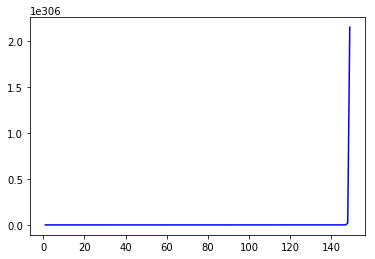

In [22]:
fig = plt.figure()
plt.plot(iters, cost, 'b')
plt.show()

To check if scaling affects the value of the learning rate (alpha), we scale our data with the MinMaxScaler function and follow again the same steps as we did with the original data, such as applying Linear Regression, printing some outcomes and plotting the line of the regression.

In [23]:
scaler_X10 = MinMaxScaler(feature_range=(0, 1))
rescaledX10 = scaler_X10.fit_transform(X10)
set_printoptions(precision=3)
print (rescaledX10)

[[ 0.154]
 [ 0.215]
 [ 0.215]
 ..., 
 [ 0.4  ]
 [ 0.277]
 [ 0.4  ]]


In [24]:
scaler_Y = MinMaxScaler(feature_range=(0, 1))
rescaledY = scaler_Y.fit_transform(Y)
set_printoptions(precision=3)
print (rescaledY)

[[ 0.4]
 [ 0.4]
 [ 0.4]
 ..., 
 [ 0.6]
 [ 0.4]
 [ 0.6]]


In [25]:
regr10scaled = LinearRegression()
regr10scaled.fit(rescaledX10, rescaledY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
pred10scaled = regr10scaled.predict(rescaledX10)
print pred10scaled

[[ 0.453]
 [ 0.482]
 [ 0.482]
 ..., 
 [ 0.569]
 [ 0.511]
 [ 0.569]]


In [27]:
print 'Coefficients: \n', regr10scaled.coef_
intercept10scaled = regr10scaled.intercept_[0]
w1scaled = regr10scaled.coef_
print("\nThe intercept for our model is {}".format(intercept10scaled))
# The mean squared error
print("\nMean squared error: %.2f" % mean_squared_error(rescaledY, pred10scaled))
# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(rescaledY, pred10scaled))

Coefficients: 
[[ 0.469]]

The intercept for our model is 0.381209143162

Mean squared error: 0.02

Variance score: 0.23


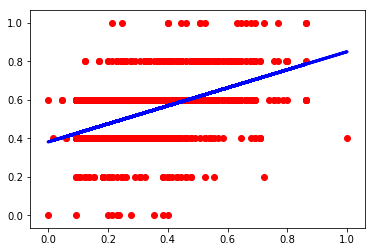

In [28]:
plt.scatter(rescaledX10, rescaledY,  color='red')
plt.plot(rescaledX10, pred10scaled, color='blue', linewidth=3)
plt.show()

Then we call again the Gradient Descent 3 times, with the same alpha values as before. 

As we can see, this time, value 0.001 for alpha makes the model to converge a lot slower, in 20.001 training epochs, value 0.01 for alpha is a also slower than before with 10.439 thraining epochs needed.

Finally value 0.1 for alpha has totally different behaviour than before, as with the data having been scaled, it is the most suitable value for alpha as it makes the model to converge to the best weights (minimum cost) in only 1.862 training epochs. So, scaling the data surely affect the decision that we have to make about the value of the learning rate. 

In [29]:
w0, w1, cost, iters = gradient_descent((rescaledX10, rescaledY), 0.001)

Current model is: ([ 0.001] + [ 0.]x1)
Average Squared Error=[ 0.103]
Iteration:1
Current model is: ([ 0.001] + [ 0.]x1)
Average Squared Error=[ 0.102]
Iteration:2
Current model is: ([ 0.002] + [ 0.001]x1)
Average Squared Error=[ 0.102]
Iteration:3
Current model is: ([ 0.002] + [ 0.001]x1)
Average Squared Error=[ 0.102]
Iteration:4
Current model is: ([ 0.003] + [ 0.001]x1)
Average Squared Error=[ 0.101]
Iteration:5
Current model is: ([ 0.004] + [ 0.001]x1)
Average Squared Error=[ 0.101]
Iteration:6
Current model is: ([ 0.004] + [ 0.001]x1)
Average Squared Error=[ 0.1]
Iteration:7
Current model is: ([ 0.005] + [ 0.002]x1)
Average Squared Error=[ 0.1]
Iteration:8
Current model is: ([ 0.005] + [ 0.002]x1)
Average Squared Error=[ 0.1]
Iteration:9
Current model is: ([ 0.006] + [ 0.002]x1)
Average Squared Error=[ 0.099]
Iteration:10
Current model is: ([ 0.007] + [ 0.002]x1)
Average Squared Error=[ 0.099]
Iteration:11
Current model is: ([ 0.007] + [ 0.002]x1)
Average Squared Error=[ 0.098]
It

Current model is: ([ 0.073] + [ 0.023]x1)
Average Squared Error=[ 0.06]
Iteration:136
Current model is: ([ 0.073] + [ 0.023]x1)
Average Squared Error=[ 0.06]
Iteration:137
Current model is: ([ 0.073] + [ 0.023]x1)
Average Squared Error=[ 0.06]
Iteration:138
Current model is: ([ 0.074] + [ 0.024]x1)
Average Squared Error=[ 0.06]
Iteration:139
Current model is: ([ 0.074] + [ 0.024]x1)
Average Squared Error=[ 0.059]
Iteration:140
Current model is: ([ 0.075] + [ 0.024]x1)
Average Squared Error=[ 0.059]
Iteration:141
Current model is: ([ 0.075] + [ 0.024]x1)
Average Squared Error=[ 0.059]
Iteration:142
Current model is: ([ 0.076] + [ 0.024]x1)
Average Squared Error=[ 0.059]
Iteration:143
Current model is: ([ 0.076] + [ 0.024]x1)
Average Squared Error=[ 0.059]
Iteration:144
Current model is: ([ 0.077] + [ 0.024]x1)
Average Squared Error=[ 0.058]
Iteration:145
Current model is: ([ 0.077] + [ 0.025]x1)
Average Squared Error=[ 0.058]
Iteration:146
Current model is: ([ 0.077] + [ 0.025]x1)
Avera

Current model is: ([ 0.118] + [ 0.038]x1)
Average Squared Error=[ 0.04]
Iteration:249
Current model is: ([ 0.119] + [ 0.038]x1)
Average Squared Error=[ 0.039]
Iteration:250
Current model is: ([ 0.119] + [ 0.039]x1)
Average Squared Error=[ 0.039]
Iteration:251
Current model is: ([ 0.119] + [ 0.039]x1)
Average Squared Error=[ 0.039]
Iteration:252
Current model is: ([ 0.12] + [ 0.039]x1)
Average Squared Error=[ 0.039]
Iteration:253
Current model is: ([ 0.12] + [ 0.039]x1)
Average Squared Error=[ 0.039]
Iteration:254
Current model is: ([ 0.121] + [ 0.039]x1)
Average Squared Error=[ 0.039]
Iteration:255
Current model is: ([ 0.121] + [ 0.039]x1)
Average Squared Error=[ 0.039]
Iteration:256
Current model is: ([ 0.121] + [ 0.039]x1)
Average Squared Error=[ 0.038]
Iteration:257
Current model is: ([ 0.122] + [ 0.039]x1)
Average Squared Error=[ 0.038]
Iteration:258
Current model is: ([ 0.122] + [ 0.039]x1)
Average Squared Error=[ 0.038]
Iteration:259
Current model is: ([ 0.122] + [ 0.04]x1)
Avera

Current model is: ([ 0.167] + [ 0.055]x1)
Average Squared Error=[ 0.023]
Iteration:410
Current model is: ([ 0.167] + [ 0.055]x1)
Average Squared Error=[ 0.023]
Iteration:411
Current model is: ([ 0.167] + [ 0.055]x1)
Average Squared Error=[ 0.023]
Iteration:412
Current model is: ([ 0.168] + [ 0.055]x1)
Average Squared Error=[ 0.023]
Iteration:413
Current model is: ([ 0.168] + [ 0.056]x1)
Average Squared Error=[ 0.023]
Iteration:414
Current model is: ([ 0.168] + [ 0.056]x1)
Average Squared Error=[ 0.023]
Iteration:415
Current model is: ([ 0.168] + [ 0.056]x1)
Average Squared Error=[ 0.023]
Iteration:416
Current model is: ([ 0.169] + [ 0.056]x1)
Average Squared Error=[ 0.023]
Iteration:417
Current model is: ([ 0.169] + [ 0.056]x1)
Average Squared Error=[ 0.023]
Iteration:418
Current model is: ([ 0.169] + [ 0.056]x1)
Average Squared Error=[ 0.022]
Iteration:419
Current model is: ([ 0.169] + [ 0.056]x1)
Average Squared Error=[ 0.022]
Iteration:420
Current model is: ([ 0.17] + [ 0.056]x1)
Av

Iteration:552
Current model is: ([ 0.198] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:553
Current model is: ([ 0.198] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:554
Current model is: ([ 0.198] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:555
Current model is: ([ 0.198] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:556
Current model is: ([ 0.198] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:557
Current model is: ([ 0.199] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:558
Current model is: ([ 0.199] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:559
Current model is: ([ 0.199] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:560
Current model is: ([ 0.199] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:561
Current model is: ([ 0.199] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:562
Current model is: ([ 0.2] + [ 0.067]x1)
Average Squared Error=[ 0.015]
Iteration:563
Current model is: ([ 0.2] + [ 0

Average Squared Error=[ 0.011]
Iteration:689
Current model is: ([ 0.219] + [ 0.075]x1)
Average Squared Error=[ 0.011]
Iteration:690
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:691
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:692
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:693
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:694
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:695
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:696
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:697
Current model is: ([ 0.22] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:698
Current model is: ([ 0.221] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:699
Current model is: ([ 0.221] + [ 0.076]x1)
Average Squared Error=[ 0.011]
Iteration:700
Curren

Current model is: ([ 0.232] + [ 0.081]x1)
Average Squared Error=[ 0.01]
Iteration:796
Current model is: ([ 0.232] + [ 0.081]x1)
Average Squared Error=[ 0.01]
Iteration:797
Current model is: ([ 0.232] + [ 0.081]x1)
Average Squared Error=[ 0.01]
Iteration:798
Current model is: ([ 0.232] + [ 0.081]x1)
Average Squared Error=[ 0.01]
Iteration:799
Current model is: ([ 0.233] + [ 0.081]x1)
Average Squared Error=[ 0.01]
Iteration:800
Current model is: ([ 0.233] + [ 0.081]x1)
Average Squared Error=[ 0.01]
Iteration:801
Current model is: ([ 0.233] + [ 0.081]x1)
Average Squared Error=[ 0.01]
Iteration:802
Current model is: ([ 0.233] + [ 0.082]x1)
Average Squared Error=[ 0.01]
Iteration:803
Current model is: ([ 0.233] + [ 0.082]x1)
Average Squared Error=[ 0.009]
Iteration:804
Current model is: ([ 0.233] + [ 0.082]x1)
Average Squared Error=[ 0.009]
Iteration:805
Current model is: ([ 0.233] + [ 0.082]x1)
Average Squared Error=[ 0.009]
Iteration:806
Current model is: ([ 0.233] + [ 0.082]x1)
Average S

Iteration:933
Current model is: ([ 0.245] + [ 0.087]x1)
Average Squared Error=[ 0.008]
Iteration:934
Current model is: ([ 0.245] + [ 0.087]x1)
Average Squared Error=[ 0.008]
Iteration:935
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:936
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:937
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:938
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:939
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:940
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:941
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:942
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:943
Current model is: ([ 0.245] + [ 0.088]x1)
Average Squared Error=[ 0.008]
Iteration:944
Current model is: ([ 0.246] +

Average Squared Error=[ 0.007]
Iteration:1058
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:1059
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:1060
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:1061
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:1062
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:1063
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:1064
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:1065
Current model is: ([ 0.254] + [ 0.093]x1)
Average Squared Error=[ 0.007]
Iteration:1066
Current model is: ([ 0.254] + [ 0.093]x1)
Average Squared Error=[ 0.007]
Iteration:1067
Current model is: ([ 0.254] + [ 0.093]x1)
Average Squared Error=[ 0.007]
Iteration:1068
Current model is: ([ 0.254] + [ 0.093]x1)
Average Squared Error=[ 0.007]
I

Iteration:1225
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1226
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1227
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1228
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1229
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1230
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1231
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1232
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1233
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1234
Current model is: ([ 0.261] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1235
Current model is: ([ 0.262] + [ 0.098]x1)
Average Squared Error=[ 0.007]
Iteration:1236
Current model is:

Average Squared Error=[ 0.007]
Iteration:1326
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1327
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1328
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1329
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1330
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1331
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1332
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1333
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1334
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1335
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
Iteration:1336
Current model is: ([ 0.265] + [ 0.101]x1)
Average Squared Error=[ 0.007]
I

Current model is: ([ 0.267] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1430
Current model is: ([ 0.267] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1431
Current model is: ([ 0.267] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1432
Current model is: ([ 0.267] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1433
Current model is: ([ 0.267] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1434
Current model is: ([ 0.267] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1435
Current model is: ([ 0.268] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1436
Current model is: ([ 0.268] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1437
Current model is: ([ 0.268] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1438
Current model is: ([ 0.268] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1439
Current model is: ([ 0.268] + [ 0.104]x1)
Average Squared Error=[ 0.006]
Iteration:1440
Current model is: ([ 0.268] + [ 

Current model is: ([ 0.27] + [ 0.106]x1)
Average Squared Error=[ 0.006]
Iteration:1542
Current model is: ([ 0.27] + [ 0.106]x1)
Average Squared Error=[ 0.006]
Iteration:1543
Current model is: ([ 0.27] + [ 0.106]x1)
Average Squared Error=[ 0.006]
Iteration:1544
Current model is: ([ 0.27] + [ 0.106]x1)
Average Squared Error=[ 0.006]
Iteration:1545
Current model is: ([ 0.27] + [ 0.106]x1)
Average Squared Error=[ 0.006]
Iteration:1546
Current model is: ([ 0.27] + [ 0.106]x1)
Average Squared Error=[ 0.006]
Iteration:1547
Current model is: ([ 0.27] + [ 0.107]x1)
Average Squared Error=[ 0.006]
Iteration:1548
Current model is: ([ 0.27] + [ 0.107]x1)
Average Squared Error=[ 0.006]
Iteration:1549
Current model is: ([ 0.27] + [ 0.107]x1)
Average Squared Error=[ 0.006]
Iteration:1550
Current model is: ([ 0.27] + [ 0.107]x1)
Average Squared Error=[ 0.006]
Iteration:1551
Current model is: ([ 0.27] + [ 0.107]x1)
Average Squared Error=[ 0.006]
Iteration:1552
Current model is: ([ 0.27] + [ 0.107]x1)
Av

Iteration:1675
Current model is: ([ 0.272] + [ 0.109]x1)
Average Squared Error=[ 0.006]
Iteration:1676
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1677
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1678
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1679
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1680
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1681
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1682
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1683
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1684
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1685
Current model is: ([ 0.272] + [ 0.11]x1)
Average Squared Error=[ 0.006]
Iteration:1686
Current model is: ([ 0.272]

Iteration:1851
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1852
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1853
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1854
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1855
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1856
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1857
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1858
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1859
Current model is: ([ 0.273] + [ 0.113]x1)
Average Squared Error=[ 0.006]
Iteration:1860
Current model is: ([ 0.273] + [ 0.114]x1)
Average Squared Error=[ 0.006]
Iteration:1861
Current model is: ([ 0.273] + [ 0.114]x1)
Average Squared Error=[ 0.006]
Iteration:1862
Current model is:

Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1961
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1962
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1963
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1964
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1965
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1966
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1967
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1968
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1969
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1970
Current model is: ([ 0.274] + [ 0.116]x1)
Average Squared Error=[ 0.006]
Iteration:1971
Current model is: ([ 0.274] + [ 

Current model is: ([ 0.274] + [ 0.119]x1)
Average Squared Error=[ 0.006]
Iteration:2155
Current model is: ([ 0.274] + [ 0.119]x1)
Average Squared Error=[ 0.006]
Iteration:2156
Current model is: ([ 0.274] + [ 0.119]x1)
Average Squared Error=[ 0.006]
Iteration:2157
Current model is: ([ 0.274] + [ 0.119]x1)
Average Squared Error=[ 0.006]
Iteration:2158
Current model is: ([ 0.274] + [ 0.12]x1)
Average Squared Error=[ 0.006]
Iteration:2159
Current model is: ([ 0.274] + [ 0.12]x1)
Average Squared Error=[ 0.006]
Iteration:2160
Current model is: ([ 0.274] + [ 0.12]x1)
Average Squared Error=[ 0.006]
Iteration:2161
Current model is: ([ 0.274] + [ 0.12]x1)
Average Squared Error=[ 0.006]
Iteration:2162
Current model is: ([ 0.274] + [ 0.12]x1)
Average Squared Error=[ 0.006]
Iteration:2163
Current model is: ([ 0.274] + [ 0.12]x1)
Average Squared Error=[ 0.006]
Iteration:2164
Current model is: ([ 0.274] + [ 0.12]x1)
Average Squared Error=[ 0.006]
Iteration:2165
Current model is: ([ 0.274] + [ 0.12]x1

Average Squared Error=[ 0.006]
Iteration:2249
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2250
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2251
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2252
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2253
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2254
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2255
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2256
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2257
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2258
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
Iteration:2259
Current model is: ([ 0.274] + [ 0.121]x1)
Average Squared Error=[ 0.006]
I

Average Squared Error=[ 0.006]
Iteration:2387
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2388
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2389
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2390
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2391
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2392
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2393
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2394
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2395
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2396
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:2397
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
I

Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2540
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2541
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2542
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2543
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2544
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2545
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2546
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2547
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2548
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2549
Current model is: ([ 0.274] + [ 0.127]x1)
Average Squared Error=[ 0.006]
Iteration:2550
Current model is: ([ 0.274] + [ 

Iteration:2695
Current model is: ([ 0.273] + [ 0.129]x1)
Average Squared Error=[ 0.006]
Iteration:2696
Current model is: ([ 0.273] + [ 0.129]x1)
Average Squared Error=[ 0.006]
Iteration:2697
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2698
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2699
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2700
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2701
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2702
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2703
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2704
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2705
Current model is: ([ 0.273] + [ 0.13]x1)
Average Squared Error=[ 0.006]
Iteration:2706
Current model is: ([ 0.273

Iteration:2895
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2896
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2897
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2898
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2899
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2900
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2901
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2902
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2903
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2904
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2905
Current model is: ([ 0.273] + [ 0.133]x1)
Average Squared Error=[ 0.006]
Iteration:2906
Current model is:

Iteration:3102
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3103
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3104
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3105
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3106
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3107
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3108
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3109
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3110
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3111
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3112
Current model is: ([ 0.272] + [ 0.137]x1)
Average Squared Error=[ 0.006]
Iteration:3113
Current model is:

Iteration:3275
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3276
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3277
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3278
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3279
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3280
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3281
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3282
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3283
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3284
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3285
Current model is: ([ 0.271] + [ 0.14]x1)
Average Squared Error=[ 0.006]
Iteration:3286
Current model is: ([ 0.271] 

Iteration:3460
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3461
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3462
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3463
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3464
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3465
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3466
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3467
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3468
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3469
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3470
Current model is: ([ 0.27] + [ 0.143]x1)
Average Squared Error=[ 0.006]
Iteration:3471
Current model is: ([ 0.27] +

Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3699
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3700
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3701
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3702
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3703
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3704
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3705
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3706
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3707
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3708
Current model is: ([ 0.269] + [ 0.147]x1)
Average Squared Error=[ 0.006]
Iteration:3709
Current model is: ([ 0.269] + [ 

Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3831
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3832
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3833
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3834
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3835
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3836
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3837
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3838
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3839
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3840
Current model is: ([ 0.269] + [ 0.149]x1)
Average Squared Error=[ 0.005]
Iteration:3841
Current model is: ([ 0.269] + [ 

Iteration:3944
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3945
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3946
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3947
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3948
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3949
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3950
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3951
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3952
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3953
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3954
Current model is: ([ 0.268] + [ 0.151]x1)
Average Squared Error=[ 0.005]
Iteration:3955
Current model is:

Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4089
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4090
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4091
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4092
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4093
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4094
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4095
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4096
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4097
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4098
Current model is: ([ 0.267] + [ 0.154]x1)
Average Squared Error=[ 0.005]
Iteration:4099
Current model is: ([ 0.267] + [ 

Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4197
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4198
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4199
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4200
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4201
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4202
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4203
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4204
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4205
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4206
Current model is: ([ 0.267] + [ 0.155]x1)
Average Squared Error=[ 0.005]
Iteration:4207
Current model is: ([ 0.267] + [ 

Iteration:4450
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4451
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4452
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4453
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4454
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4455
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4456
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4457
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4458
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4459
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4460
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:4461
Current model is: ([ 0.266] 

Iteration:4760
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4761
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4762
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4763
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4764
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4765
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4766
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4767
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4768
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4769
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4770
Current model is: ([ 0.264] + [ 0.165]x1)
Average Squared Error=[ 0.005]
Iteration:4771
Current model is:

Iteration:5054
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5055
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5056
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5057
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5058
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5059
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5060
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5061
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5062
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5063
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5064
Current model is: ([ 0.263] + [ 0.17]x1)
Average Squared Error=[ 0.005]
Iteration:5065
Current model is: ([ 0.263] 

Average Squared Error=[ 0.005]
Iteration:5332
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5333
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5334
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5335
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5336
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5337
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5338
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5339
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5340
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5341
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
Iteration:5342
Current model is: ([ 0.262] + [ 0.174]x1)
Average Squared Error=[ 0.005]
I

Average Squared Error=[ 0.005]
Iteration:5665
Current model is: ([ 0.26] + [ 0.179]x1)
Average Squared Error=[ 0.005]
Iteration:5666
Current model is: ([ 0.26] + [ 0.179]x1)
Average Squared Error=[ 0.005]
Iteration:5667
Current model is: ([ 0.26] + [ 0.179]x1)
Average Squared Error=[ 0.005]
Iteration:5668
Current model is: ([ 0.26] + [ 0.179]x1)
Average Squared Error=[ 0.005]
Iteration:5669
Current model is: ([ 0.26] + [ 0.179]x1)
Average Squared Error=[ 0.005]
Iteration:5670
Current model is: ([ 0.26] + [ 0.179]x1)
Average Squared Error=[ 0.005]
Iteration:5671
Current model is: ([ 0.26] + [ 0.179]x1)
Average Squared Error=[ 0.005]
Iteration:5672
Current model is: ([ 0.26] + [ 0.18]x1)
Average Squared Error=[ 0.005]
Iteration:5673
Current model is: ([ 0.26] + [ 0.18]x1)
Average Squared Error=[ 0.005]
Iteration:5674
Current model is: ([ 0.26] + [ 0.18]x1)
Average Squared Error=[ 0.005]
Iteration:5675
Current model is: ([ 0.26] + [ 0.18]x1)
Average Squared Error=[ 0.005]
Iteration:5676
C

Iteration:5936
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5937
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5938
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5939
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5940
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5941
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5942
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5943
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5944
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5945
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5946
Current model is: ([ 0.259] + [ 0.184]x1)
Average Squared Error=[ 0.005]
Iteration:5947
Current model is:

Iteration:6165
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6166
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6167
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6168
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6169
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6170
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6171
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6172
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6173
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6174
Current model is: ([ 0.258] + [ 0.187]x1)
Average Squared Error=[ 0.005]
Iteration:6175
Current model is: ([ 0.258] + [ 0.188]x1)
Average Squared Error=[ 0.005]
Iteration:6176
Current model is:

Average Squared Error=[ 0.005]
Iteration:6513
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6514
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6515
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6516
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6517
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6518
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6519
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6520
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6521
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6522
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
Iteration:6523
Current model is: ([ 0.256] + [ 0.193]x1)
Average Squared Error=[ 0.005]
I

Iteration:6845
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6846
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6847
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6848
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6849
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6850
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6851
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6852
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6853
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6854
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6855
Current model is: ([ 0.255] + [ 0.198]x1)
Average Squared Error=[ 0.005]
Iteration:6856
Current model is:

Average Squared Error=[ 0.005]
Iteration:7264
Current model is: ([ 0.253] + [ 0.204]x1)
Average Squared Error=[ 0.005]
Iteration:7265
Current model is: ([ 0.253] + [ 0.204]x1)
Average Squared Error=[ 0.005]
Iteration:7266
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7267
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7268
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7269
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7270
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7271
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7272
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7273
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
Iteration:7274
Current model is: ([ 0.253] + [ 0.205]x1)
Average Squared Error=[ 0.005]
I

Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7580
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7581
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7582
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7583
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7584
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7585
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7586
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7587
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7588
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7589
Current model is: ([ 0.252] + [ 0.209]x1)
Average Squared Error=[ 0.004]
Iteration:7590
Current model is: ([ 0.252] + [ 

Iteration:7912
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7913
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7914
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7915
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7916
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7917
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7918
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7919
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7920
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7921
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7922
Current model is: ([ 0.25] + [ 0.214]x1)
Average Squared Error=[ 0.004]
Iteration:7923
Current model is: ([ 0.25] +

Average Squared Error=[ 0.004]
Iteration:8282
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8283
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8284
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8285
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8286
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8287
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8288
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8289
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8290
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8291
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:8292
Current model is: ([ 0.249] + [ 0.22]x1)
Average Squared Error=[ 0.004]
Iteration:82

Iteration:8658
Current model is: ([ 0.247] + [ 0.225]x1)
Average Squared Error=[ 0.004]
Iteration:8659
Current model is: ([ 0.247] + [ 0.225]x1)
Average Squared Error=[ 0.004]
Iteration:8660
Current model is: ([ 0.247] + [ 0.225]x1)
Average Squared Error=[ 0.004]
Iteration:8661
Current model is: ([ 0.247] + [ 0.225]x1)
Average Squared Error=[ 0.004]
Iteration:8662
Current model is: ([ 0.247] + [ 0.225]x1)
Average Squared Error=[ 0.004]
Iteration:8663
Current model is: ([ 0.247] + [ 0.226]x1)
Average Squared Error=[ 0.004]
Iteration:8664
Current model is: ([ 0.247] + [ 0.226]x1)
Average Squared Error=[ 0.004]
Iteration:8665
Current model is: ([ 0.247] + [ 0.226]x1)
Average Squared Error=[ 0.004]
Iteration:8666
Current model is: ([ 0.247] + [ 0.226]x1)
Average Squared Error=[ 0.004]
Iteration:8667
Current model is: ([ 0.247] + [ 0.226]x1)
Average Squared Error=[ 0.004]
Iteration:8668
Current model is: ([ 0.247] + [ 0.226]x1)
Average Squared Error=[ 0.004]
Iteration:8669
Current model is:

Average Squared Error=[ 0.004]
Iteration:9016
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9017
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9018
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9019
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9020
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9021
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9022
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9023
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9024
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9025
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
Iteration:9026
Current model is: ([ 0.246] + [ 0.231]x1)
Average Squared Error=[ 0.004]
I

Average Squared Error=[ 0.004]
Iteration:9280
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9281
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9282
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9283
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9284
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9285
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9286
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9287
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9288
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9289
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
Iteration:9290
Current model is: ([ 0.245] + [ 0.235]x1)
Average Squared Error=[ 0.004]
I

Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9587
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9588
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9589
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9590
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9591
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9592
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9593
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9594
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9595
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9596
Current model is: ([ 0.244] + [ 0.239]x1)
Average Squared Error=[ 0.004]
Iteration:9597
Current model is: ([ 0.243] + [ 

Average Squared Error=[ 0.004]
Iteration:9930
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9931
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9932
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9933
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9934
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9935
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9936
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9937
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9938
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9939
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
Iteration:9940
Current model is: ([ 0.242] + [ 0.244]x1)
Average Squared Error=[ 0.004]
I

Average Squared Error=[ 0.004]
Iteration:10316
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10317
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10318
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10319
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10320
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10321
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10322
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10323
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10324
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10325
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error=[ 0.004]
Iteration:10326
Current model is: ([ 0.241] + [ 0.249]x1)
Average Squared Error

Iteration:10666
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10667
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10668
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10669
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10670
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10671
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10672
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10673
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10674
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10675
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10676
Current model is: ([ 0.239] + [ 0.254]x1)
Average Squared Error=[ 0.004]
Iteration:10677
Curre

Current model is: ([ 0.237] + [ 0.26]x1)
Average Squared Error=[ 0.004]
Iteration:11120
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11121
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11122
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11123
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11124
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11125
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11126
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11127
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11128
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11129
Current model is: ([ 0.237] + [ 0.261]x1)
Average Squared Error=[ 0.004]
Iteration:11130
Current model is: ([ 0

Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11352
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11353
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11354
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11355
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11356
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11357
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11358
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11359
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11360
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11361
Current model is: ([ 0.237] + [ 0.264]x1)
Average Squared Error=[ 0.004]
Iteration:11362
Current model is: ([ 

Average Squared Error=[ 0.004]
Iteration:11643
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11644
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11645
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11646
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11647
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11648
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11649
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11650
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11651
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11652
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error=[ 0.004]
Iteration:11653
Current model is: ([ 0.235] + [ 0.268]x1)
Average Squared Error

Iteration:12016
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12017
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12018
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12019
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12020
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12021
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12022
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12023
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12024
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12025
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12026
Current model is: ([ 0.234] + [ 0.273]x1)
Average Squared Error=[ 0.003]
Iteration:12027
Curre

Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12365
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12366
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12367
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12368
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12369
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12370
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12371
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12372
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12373
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12374
Current model is: ([ 0.233] + [ 0.277]x1)
Average Squared Error=[ 0.003]
Iteration:12375
Current model is: ([ 

Iteration:12649
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12650
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12651
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12652
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12653
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12654
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12655
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12656
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12657
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12658
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12659
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:12660
Curre

Average Squared Error=[ 0.003]
Iteration:13090
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13091
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13092
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13093
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13094
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13095
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13096
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13097
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13098
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13099
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:13100
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
I

Iteration:13350
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13351
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13352
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13353
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13354
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13355
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13356
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13357
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13358
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13359
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13360
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:13361
Current model is

Iteration:13606
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13607
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13608
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13609
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13610
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13611
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13612
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13613
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13614
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13615
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13616
Current model is: ([ 0.228] + [ 0.294]x1)
Average Squared Error=[ 0.003]
Iteration:13617
Curre

Iteration:13708
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13709
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13710
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13711
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13712
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13713
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13714
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13715
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13716
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13717
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13718
Current model is: ([ 0.228] + [ 0.295]x1)
Average Squared Error=[ 0.003]
Iteration:13719
Curre

Average Squared Error=[ 0.003]
Iteration:13835
Current model is: ([ 0.227] + [ 0.296]x1)
Average Squared Error=[ 0.003]
Iteration:13836
Current model is: ([ 0.227] + [ 0.296]x1)
Average Squared Error=[ 0.003]
Iteration:13837
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13838
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13839
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13840
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13841
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13842
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13843
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13844
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error=[ 0.003]
Iteration:13845
Current model is: ([ 0.227] + [ 0.297]x1)
Average Squared Error

Iteration:13959
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13960
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13961
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13962
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13963
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13964
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13965
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13966
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13967
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13968
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13969
Current model is: ([ 0.227] + [ 0.298]x1)
Average Squared Error=[ 0.003]
Iteration:13970
Curre

Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14064
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14065
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14066
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14067
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14068
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14069
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14070
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14071
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14072
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:14073
Current model is: ([ 0.227] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:14074
Current model is: ([ 0.

Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14192
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14193
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14194
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14195
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14196
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14197
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14198
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14199
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14200
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14201
Current model is: ([ 0.226] + [ 0.301]x1)
Average Squared Error=[ 0.003]
Iteration:14202
Current model is: ([ 

Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14296
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14297
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14298
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14299
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14300
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14301
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14302
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14303
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14304
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14305
Current model is: ([ 0.226] + [ 0.302]x1)
Average Squared Error=[ 0.003]
Iteration:14306
Current model is: ([ 

Iteration:14422
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14423
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14424
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14425
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14426
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14427
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14428
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14429
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14430
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14431
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14432
Current model is: ([ 0.225] + [ 0.304]x1)
Average Squared Error=[ 0.003]
Iteration:14433
Curre

Iteration:14529
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14530
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14531
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14532
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14533
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14534
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14535
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14536
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14537
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14538
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14539
Current model is: ([ 0.225] + [ 0.305]x1)
Average Squared Error=[ 0.003]
Iteration:14540
Curre

Average Squared Error=[ 0.003]
Iteration:14646
Current model is: ([ 0.225] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14647
Current model is: ([ 0.225] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14648
Current model is: ([ 0.225] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14649
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14650
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14651
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14652
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14653
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14654
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14655
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error=[ 0.003]
Iteration:14656
Current model is: ([ 0.224] + [ 0.307]x1)
Average Squared Error

Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14747
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14748
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14749
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14750
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14751
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14752
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14753
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14754
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14755
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14756
Current model is: ([ 0.224] + [ 0.308]x1)
Average Squared Error=[ 0.003]
Iteration:14757
Current model is: ([ 

Average Squared Error=[ 0.003]
Iteration:14877
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14878
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14879
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14880
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14881
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14882
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14883
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14884
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14885
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14886
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
Iteration:14887
Current model is: ([ 0.224] + [ 0.31]x1)
Average Squared Error=[ 0.003]
I

Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:14998
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:14999
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15000
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15001
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15002
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15003
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15004
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15005
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15006
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15007
Current model is: ([ 0.223] + [ 0.311]x1)
Average Squared Error=[ 0.003]
Iteration:15008
Current model is: ([ 

Average Squared Error=[ 0.003]
Iteration:15183
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15184
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15185
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15186
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15187
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15188
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15189
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15190
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15191
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15192
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error=[ 0.003]
Iteration:15193
Current model is: ([ 0.223] + [ 0.313]x1)
Average Squared Error

Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15311
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15312
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15313
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15314
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15315
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15316
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15317
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15318
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15319
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15320
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:15321
Current model is: ([ 

Average Squared Error=[ 0.003]
Iteration:15573
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15574
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15575
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15576
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15577
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15578
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15579
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15580
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15581
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15582
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error=[ 0.003]
Iteration:15583
Current model is: ([ 0.221] + [ 0.318]x1)
Average Squared Error

Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15781
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15782
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15783
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15784
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15785
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15786
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15787
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15788
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15789
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15790
Current model is: ([ 0.221] + [ 0.321]x1)
Average Squared Error=[ 0.003]
Iteration:15791
Current model is: ([ 

Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16116
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16117
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16118
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16119
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16120
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16121
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16122
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16123
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16124
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16125
Current model is: ([ 0.219] + [ 0.325]x1)
Average Squared Error=[ 0.003]
Iteration:16126
Current model is: ([ 

Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16417
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16418
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16419
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16420
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16421
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16422
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16423
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16424
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16425
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16426
Current model is: ([ 0.218] + [ 0.328]x1)
Average Squared Error=[ 0.003]
Iteration:16427
Current model is: ([ 

Iteration:16659
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16660
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16661
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16662
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16663
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16664
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16665
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16666
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16667
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16668
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16669
Current model is: ([ 0.218] + [ 0.331]x1)
Average Squared Error=[ 0.003]
Iteration:16670
Curre

Iteration:17009
Current model is: ([ 0.217] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17010
Current model is: ([ 0.217] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17011
Current model is: ([ 0.217] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17012
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17013
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17014
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17015
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17016
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17017
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17018
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17019
Current model is: ([ 0.216] + [ 0.335]x1)
Average Squared Error=[ 0.003]
Iteration:17020
Curre

Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17260
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17261
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17262
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17263
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17264
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17265
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17266
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17267
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17268
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17269
Current model is: ([ 0.216] + [ 0.338]x1)
Average Squared Error=[ 0.003]
Iteration:17270
Current model is: ([ 

Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17470
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17471
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17472
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17473
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17474
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17475
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17476
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17477
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17478
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17479
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:17480
Current model is: ([ 

Average Squared Error=[ 0.003]
Iteration:17615
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17616
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17617
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17618
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17619
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17620
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17621
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17622
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17623
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17624
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:17625
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error

Iteration:17728
Current model is: ([ 0.214] + [ 0.343]x1)
Average Squared Error=[ 0.003]
Iteration:17729
Current model is: ([ 0.214] + [ 0.343]x1)
Average Squared Error=[ 0.003]
Iteration:17730
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17731
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17732
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17733
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17734
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17735
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17736
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17737
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17738
Current model is: ([ 0.214] + [ 0.344]x1)
Average Squared Error=[ 0.003]
Iteration:17739
Curre

Average Squared Error=[ 0.002]
Iteration:17980
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17981
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17982
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17983
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17984
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17985
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17986
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17987
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17988
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17989
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error=[ 0.002]
Iteration:17990
Current model is: ([ 0.213] + [ 0.346]x1)
Average Squared Error

Iteration:18308
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18309
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18310
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18311
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18312
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18313
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18314
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18315
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18316
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18317
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18318
Current model is: ([ 0.212] + [ 0.35]x1)
Average Squared Error=[ 0.002]
Iteration:18319
Current model is

Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18659
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18660
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18661
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18662
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18663
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18664
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18665
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18666
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18667
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18668
Current model is: ([ 0.211] + [ 0.354]x1)
Average Squared Error=[ 0.002]
Iteration:18669
Current model is: ([ 

Iteration:18962
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18963
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18964
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18965
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18966
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18967
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18968
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18969
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18970
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18971
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18972
Current model is: ([ 0.21] + [ 0.357]x1)
Average Squared Error=[ 0.002]
Iteration:18973
Current model is

Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19311
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19312
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19313
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19314
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19315
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19316
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19317
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19318
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19319
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19320
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:19321
Current model is: ([ 

Iteration:19708
Current model is: ([ 0.208] + [ 0.365]x1)
Average Squared Error=[ 0.002]
Iteration:19709
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19710
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19711
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19712
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19713
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19714
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19715
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19716
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19717
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19718
Current model is: ([ 0.208] + [ 0.366]x1)
Average Squared Error=[ 0.002]
Iteration:19719
Curre

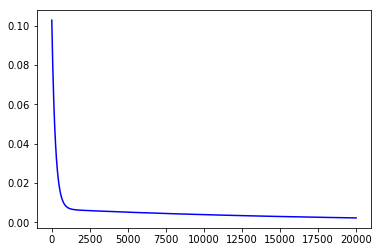

In [30]:
fig = plt.figure()
plt.plot(iters, cost, 'b')
plt.show()

In [35]:
w0, w1, cost, iters = gradient_descent((rescaledX10, rescaledY), 0.01)

Current model is: ([ 0.006] + [ 0.002]x1)
Average Squared Error=[ 0.099]
Iteration:1
Current model is: ([ 0.012] + [ 0.004]x1)
Average Squared Error=[ 0.095]
Iteration:2
Current model is: ([ 0.018] + [ 0.006]x1)
Average Squared Error=[ 0.091]
Iteration:3
Current model is: ([ 0.024] + [ 0.008]x1)
Average Squared Error=[ 0.088]
Iteration:4
Current model is: ([ 0.029] + [ 0.009]x1)
Average Squared Error=[ 0.084]
Iteration:5
Current model is: ([ 0.035] + [ 0.011]x1)
Average Squared Error=[ 0.081]
Iteration:6
Current model is: ([ 0.04] + [ 0.013]x1)
Average Squared Error=[ 0.078]
Iteration:7
Current model is: ([ 0.046] + [ 0.014]x1)
Average Squared Error=[ 0.075]
Iteration:8
Current model is: ([ 0.051] + [ 0.016]x1)
Average Squared Error=[ 0.072]
Iteration:9
Current model is: ([ 0.056] + [ 0.018]x1)
Average Squared Error=[ 0.069]
Iteration:10
Current model is: ([ 0.061] + [ 0.019]x1)
Average Squared Error=[ 0.066]
Iteration:11
Current model is: ([ 0.066] + [ 0.021]x1)
Average Squared Error=

Iteration:97
Current model is: ([ 0.249] + [ 0.089]x1)
Average Squared Error=[ 0.008]
Iteration:98
Current model is: ([ 0.249] + [ 0.09]x1)
Average Squared Error=[ 0.008]
Iteration:99
Current model is: ([ 0.25] + [ 0.09]x1)
Average Squared Error=[ 0.008]
Iteration:100
Current model is: ([ 0.251] + [ 0.091]x1)
Average Squared Error=[ 0.008]
Iteration:101
Current model is: ([ 0.251] + [ 0.091]x1)
Average Squared Error=[ 0.008]
Iteration:102
Current model is: ([ 0.252] + [ 0.091]x1)
Average Squared Error=[ 0.007]
Iteration:103
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:104
Current model is: ([ 0.253] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:105
Current model is: ([ 0.254] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:106
Current model is: ([ 0.254] + [ 0.093]x1)
Average Squared Error=[ 0.007]
Iteration:107
Current model is: ([ 0.255] + [ 0.093]x1)
Average Squared Error=[ 0.007]
Iteration:108
Current model is: ([ 0.255] + [ 0.0

Average Squared Error=[ 0.006]
Iteration:231
Current model is: ([ 0.274] + [ 0.123]x1)
Average Squared Error=[ 0.006]
Iteration:232
Current model is: ([ 0.274] + [ 0.123]x1)
Average Squared Error=[ 0.006]
Iteration:233
Current model is: ([ 0.274] + [ 0.123]x1)
Average Squared Error=[ 0.006]
Iteration:234
Current model is: ([ 0.274] + [ 0.123]x1)
Average Squared Error=[ 0.006]
Iteration:235
Current model is: ([ 0.274] + [ 0.123]x1)
Average Squared Error=[ 0.006]
Iteration:236
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:237
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:238
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:239
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:240
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:241
Current model is: ([ 0.274] + [ 0.124]x1)
Average Squared Error=[ 0.006]
Iteration:24

Current model is: ([ 0.266] + [ 0.158]x1)
Average Squared Error=[ 0.005]
Iteration:437
Current model is: ([ 0.266] + [ 0.158]x1)
Average Squared Error=[ 0.005]
Iteration:438
Current model is: ([ 0.266] + [ 0.159]x1)
Average Squared Error=[ 0.005]
Iteration:439
Current model is: ([ 0.266] + [ 0.159]x1)
Average Squared Error=[ 0.005]
Iteration:440
Current model is: ([ 0.266] + [ 0.159]x1)
Average Squared Error=[ 0.005]
Iteration:441
Current model is: ([ 0.266] + [ 0.159]x1)
Average Squared Error=[ 0.005]
Iteration:442
Current model is: ([ 0.266] + [ 0.159]x1)
Average Squared Error=[ 0.005]
Iteration:443
Current model is: ([ 0.266] + [ 0.159]x1)
Average Squared Error=[ 0.005]
Iteration:444
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:445
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:446
Current model is: ([ 0.266] + [ 0.16]x1)
Average Squared Error=[ 0.005]
Iteration:447
Current model is: ([ 0.266] + [ 0.16]x1)
Avera

Average Squared Error=[ 0.005]
Iteration:656
Current model is: ([ 0.256] + [ 0.194]x1)
Average Squared Error=[ 0.005]
Iteration:657
Current model is: ([ 0.256] + [ 0.194]x1)
Average Squared Error=[ 0.005]
Iteration:658
Current model is: ([ 0.256] + [ 0.194]x1)
Average Squared Error=[ 0.005]
Iteration:659
Current model is: ([ 0.256] + [ 0.194]x1)
Average Squared Error=[ 0.005]
Iteration:660
Current model is: ([ 0.256] + [ 0.194]x1)
Average Squared Error=[ 0.005]
Iteration:661
Current model is: ([ 0.256] + [ 0.195]x1)
Average Squared Error=[ 0.005]
Iteration:662
Current model is: ([ 0.256] + [ 0.195]x1)
Average Squared Error=[ 0.005]
Iteration:663
Current model is: ([ 0.256] + [ 0.195]x1)
Average Squared Error=[ 0.005]
Iteration:664
Current model is: ([ 0.256] + [ 0.195]x1)
Average Squared Error=[ 0.005]
Iteration:665
Current model is: ([ 0.256] + [ 0.195]x1)
Average Squared Error=[ 0.005]
Iteration:666
Current model is: ([ 0.256] + [ 0.195]x1)
Average Squared Error=[ 0.005]
Iteration:66

Iteration:845
Current model is: ([ 0.248] + [ 0.223]x1)
Average Squared Error=[ 0.004]
Iteration:846
Current model is: ([ 0.248] + [ 0.223]x1)
Average Squared Error=[ 0.004]
Iteration:847
Current model is: ([ 0.248] + [ 0.223]x1)
Average Squared Error=[ 0.004]
Iteration:848
Current model is: ([ 0.248] + [ 0.223]x1)
Average Squared Error=[ 0.004]
Iteration:849
Current model is: ([ 0.248] + [ 0.223]x1)
Average Squared Error=[ 0.004]
Iteration:850
Current model is: ([ 0.248] + [ 0.223]x1)
Average Squared Error=[ 0.004]
Iteration:851
Current model is: ([ 0.248] + [ 0.223]x1)
Average Squared Error=[ 0.004]
Iteration:852
Current model is: ([ 0.248] + [ 0.224]x1)
Average Squared Error=[ 0.004]
Iteration:853
Current model is: ([ 0.248] + [ 0.224]x1)
Average Squared Error=[ 0.004]
Iteration:854
Current model is: ([ 0.248] + [ 0.224]x1)
Average Squared Error=[ 0.004]
Iteration:855
Current model is: ([ 0.248] + [ 0.224]x1)
Average Squared Error=[ 0.004]
Iteration:856
Current model is: ([ 0.248] +

Average Squared Error=[ 0.004]
Iteration:998
Current model is: ([ 0.242] + [ 0.245]x1)
Average Squared Error=[ 0.004]
Iteration:999
Current model is: ([ 0.242] + [ 0.245]x1)
Average Squared Error=[ 0.004]
Iteration:1000
Current model is: ([ 0.242] + [ 0.245]x1)
Average Squared Error=[ 0.004]
Iteration:1001
Current model is: ([ 0.242] + [ 0.245]x1)
Average Squared Error=[ 0.004]
Iteration:1002
Current model is: ([ 0.242] + [ 0.245]x1)
Average Squared Error=[ 0.004]
Iteration:1003
Current model is: ([ 0.242] + [ 0.245]x1)
Average Squared Error=[ 0.004]
Iteration:1004
Current model is: ([ 0.242] + [ 0.246]x1)
Average Squared Error=[ 0.004]
Iteration:1005
Current model is: ([ 0.242] + [ 0.246]x1)
Average Squared Error=[ 0.004]
Iteration:1006
Current model is: ([ 0.242] + [ 0.246]x1)
Average Squared Error=[ 0.004]
Iteration:1007
Current model is: ([ 0.242] + [ 0.246]x1)
Average Squared Error=[ 0.004]
Iteration:1008
Current model is: ([ 0.242] + [ 0.246]x1)
Average Squared Error=[ 0.004]
Ite

Iteration:1094
Current model is: ([ 0.238] + [ 0.258]x1)
Average Squared Error=[ 0.004]
Iteration:1095
Current model is: ([ 0.238] + [ 0.258]x1)
Average Squared Error=[ 0.004]
Iteration:1096
Current model is: ([ 0.238] + [ 0.258]x1)
Average Squared Error=[ 0.004]
Iteration:1097
Current model is: ([ 0.238] + [ 0.259]x1)
Average Squared Error=[ 0.004]
Iteration:1098
Current model is: ([ 0.238] + [ 0.259]x1)
Average Squared Error=[ 0.004]
Iteration:1099
Current model is: ([ 0.238] + [ 0.259]x1)
Average Squared Error=[ 0.004]
Iteration:1100
Current model is: ([ 0.238] + [ 0.259]x1)
Average Squared Error=[ 0.004]
Iteration:1101
Current model is: ([ 0.238] + [ 0.259]x1)
Average Squared Error=[ 0.004]
Iteration:1102
Current model is: ([ 0.238] + [ 0.259]x1)
Average Squared Error=[ 0.004]
Iteration:1103
Current model is: ([ 0.238] + [ 0.259]x1)
Average Squared Error=[ 0.004]
Iteration:1104
Current model is: ([ 0.238] + [ 0.26]x1)
Average Squared Error=[ 0.004]
Iteration:1105
Current model is: 

Current model is: ([ 0.232] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:1269
Current model is: ([ 0.232] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:1270
Current model is: ([ 0.231] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:1271
Current model is: ([ 0.231] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:1272
Current model is: ([ 0.231] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:1273
Current model is: ([ 0.231] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:1274
Current model is: ([ 0.231] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:1275
Current model is: ([ 0.231] + [ 0.283]x1)
Average Squared Error=[ 0.003]
Iteration:1276
Current model is: ([ 0.231] + [ 0.283]x1)
Average Squared Error=[ 0.003]
Iteration:1277
Current model is: ([ 0.231] + [ 0.283]x1)
Average Squared Error=[ 0.003]
Iteration:1278
Current model is: ([ 0.231] + [ 0.283]x1)
Average Squared Error=[ 0.003]
Iteration:1279
Current model is: ([ 0.231] + [ 

Iteration:1404
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:1405
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:1406
Current model is: ([ 0.227] + [ 0.299]x1)
Average Squared Error=[ 0.003]
Iteration:1407
Current model is: ([ 0.227] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1408
Current model is: ([ 0.226] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1409
Current model is: ([ 0.226] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1410
Current model is: ([ 0.226] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1411
Current model is: ([ 0.226] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1412
Current model is: ([ 0.226] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1413
Current model is: ([ 0.226] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1414
Current model is: ([ 0.226] + [ 0.3]x1)
Average Squared Error=[ 0.003]
Iteration:1415
Current model is: ([ 0.226] + [ 0

Current model is: ([ 0.223] + [ 0.314]x1)
Average Squared Error=[ 0.003]
Iteration:1521
Current model is: ([ 0.223] + [ 0.314]x1)
Average Squared Error=[ 0.003]
Iteration:1522
Current model is: ([ 0.222] + [ 0.314]x1)
Average Squared Error=[ 0.003]
Iteration:1523
Current model is: ([ 0.222] + [ 0.314]x1)
Average Squared Error=[ 0.003]
Iteration:1524
Current model is: ([ 0.222] + [ 0.314]x1)
Average Squared Error=[ 0.003]
Iteration:1525
Current model is: ([ 0.222] + [ 0.314]x1)
Average Squared Error=[ 0.003]
Iteration:1526
Current model is: ([ 0.222] + [ 0.314]x1)
Average Squared Error=[ 0.003]
Iteration:1527
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:1528
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:1529
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:1530
Current model is: ([ 0.222] + [ 0.315]x1)
Average Squared Error=[ 0.003]
Iteration:1531
Current model is: ([ 0.222] + [ 

Average Squared Error=[ 0.003]
Iteration:1748
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:1749
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:1750
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:1751
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:1752
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:1753
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:1754
Current model is: ([ 0.215] + [ 0.341]x1)
Average Squared Error=[ 0.003]
Iteration:1755
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:1756
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:1757
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
Iteration:1758
Current model is: ([ 0.215] + [ 0.342]x1)
Average Squared Error=[ 0.003]
I

Current model is: ([ 0.21] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1916
Current model is: ([ 0.21] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1917
Current model is: ([ 0.21] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1918
Current model is: ([ 0.21] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1919
Current model is: ([ 0.21] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1920
Current model is: ([ 0.21] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1921
Current model is: ([ 0.209] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1922
Current model is: ([ 0.209] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1923
Current model is: ([ 0.209] + [ 0.36]x1)
Average Squared Error=[ 0.002]
Iteration:1924
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:1925
Current model is: ([ 0.209] + [ 0.361]x1)
Average Squared Error=[ 0.002]
Iteration:1926
Current model is: ([ 0.209] + [ 0.361]x1)
Avera

Iteration:2109
Current model is: ([ 0.204] + [ 0.38]x1)
Average Squared Error=[ 0.002]
Iteration:2110
Current model is: ([ 0.204] + [ 0.38]x1)
Average Squared Error=[ 0.002]
Iteration:2111
Current model is: ([ 0.204] + [ 0.38]x1)
Average Squared Error=[ 0.002]
Iteration:2112
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2113
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2114
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2115
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2116
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2117
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2118
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2119
Current model is: ([ 0.204] + [ 0.381]x1)
Average Squared Error=[ 0.002]
Iteration:2120
Current model is: ([

Iteration:2486
Current model is: ([ 0.193] + [ 0.417]x1)
Average Squared Error=[ 0.002]
Iteration:2487
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2488
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2489
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2490
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2491
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2492
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2493
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2494
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2495
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2496
Current model is: ([ 0.193] + [ 0.418]x1)
Average Squared Error=[ 0.002]
Iteration:2497
Current model is:

Iteration:2805
Current model is: ([ 0.185] + [ 0.446]x1)
Average Squared Error=[ 0.001]
Iteration:2806
Current model is: ([ 0.185] + [ 0.446]x1)
Average Squared Error=[ 0.001]
Iteration:2807
Current model is: ([ 0.185] + [ 0.446]x1)
Average Squared Error=[ 0.001]
Iteration:2808
Current model is: ([ 0.185] + [ 0.446]x1)
Average Squared Error=[ 0.001]
Iteration:2809
Current model is: ([ 0.185] + [ 0.446]x1)
Average Squared Error=[ 0.001]
Iteration:2810
Current model is: ([ 0.185] + [ 0.446]x1)
Average Squared Error=[ 0.001]
Iteration:2811
Current model is: ([ 0.185] + [ 0.446]x1)
Average Squared Error=[ 0.001]
Iteration:2812
Current model is: ([ 0.185] + [ 0.447]x1)
Average Squared Error=[ 0.001]
Iteration:2813
Current model is: ([ 0.185] + [ 0.447]x1)
Average Squared Error=[ 0.001]
Iteration:2814
Current model is: ([ 0.185] + [ 0.447]x1)
Average Squared Error=[ 0.001]
Iteration:2815
Current model is: ([ 0.185] + [ 0.447]x1)
Average Squared Error=[ 0.001]
Iteration:2816
Current model is:

Average Squared Error=[ 0.001]
Iteration:3146
Current model is: ([ 0.178] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3147
Current model is: ([ 0.178] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3148
Current model is: ([ 0.178] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3149
Current model is: ([ 0.178] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3150
Current model is: ([ 0.177] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3151
Current model is: ([ 0.177] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3152
Current model is: ([ 0.177] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3153
Current model is: ([ 0.177] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3154
Current model is: ([ 0.177] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3155
Current model is: ([ 0.177] + [ 0.474]x1)
Average Squared Error=[ 0.001]
Iteration:3156
Current model is: ([ 0.177] + [ 0.475]x1)
Average Squared Error=[ 0.001]
I

Average Squared Error=[ 0.001]
Iteration:3566
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3567
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3568
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3569
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3570
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3571
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3572
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3573
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3574
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3575
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
Iteration:3576
Current model is: ([ 0.169] + [ 0.505]x1)
Average Squared Error=[ 0.001]
I

Current model is: ([ 0.164] + [ 0.523]x1)
Average Squared Error=[ 0.001]
Iteration:3850
Current model is: ([ 0.164] + [ 0.523]x1)
Average Squared Error=[ 0.001]
Iteration:3851
Current model is: ([ 0.164] + [ 0.523]x1)
Average Squared Error=[ 0.001]
Iteration:3852
Current model is: ([ 0.164] + [ 0.523]x1)
Average Squared Error=[ 0.001]
Iteration:3853
Current model is: ([ 0.164] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:3854
Current model is: ([ 0.164] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:3855
Current model is: ([ 0.164] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:3856
Current model is: ([ 0.164] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:3857
Current model is: ([ 0.164] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:3858
Current model is: ([ 0.164] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:3859
Current model is: ([ 0.163] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:3860
Current model is: ([ 0.163] + [ 

Average Squared Error=[ 0.001]
Iteration:3982
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3983
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3984
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3985
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3986
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3987
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3988
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3989
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3990
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3991
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
Iteration:3992
Current model is: ([ 0.161] + [ 0.532]x1)
Average Squared Error=[ 0.001]
I

Current model is: ([ 0.159] + [ 0.539]x1)
Average Squared Error=[ 0.001]
Iteration:4107
Current model is: ([ 0.159] + [ 0.539]x1)
Average Squared Error=[ 0.001]
Iteration:4108
Current model is: ([ 0.159] + [ 0.539]x1)
Average Squared Error=[ 0.001]
Iteration:4109
Current model is: ([ 0.159] + [ 0.539]x1)
Average Squared Error=[ 0.001]
Iteration:4110
Current model is: ([ 0.159] + [ 0.539]x1)
Average Squared Error=[ 0.001]
Iteration:4111
Current model is: ([ 0.159] + [ 0.539]x1)
Average Squared Error=[ 0.001]
Iteration:4112
Current model is: ([ 0.159] + [ 0.539]x1)
Average Squared Error=[ 0.001]
Iteration:4113
Current model is: ([ 0.159] + [ 0.54]x1)
Average Squared Error=[ 0.001]
Iteration:4114
Current model is: ([ 0.159] + [ 0.54]x1)
Average Squared Error=[ 0.001]
Iteration:4115
Current model is: ([ 0.159] + [ 0.54]x1)
Average Squared Error=[ 0.001]
Iteration:4116
Current model is: ([ 0.159] + [ 0.54]x1)
Average Squared Error=[ 0.001]
Iteration:4117
Current model is: ([ 0.159] + [ 0.54

Average Squared Error=[ 0.001]
Iteration:4203
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4204
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4205
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4206
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4207
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4208
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4209
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4210
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4211
Current model is: ([ 0.158] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4212
Current model is: ([ 0.157] + [ 0.545]x1)
Average Squared Error=[ 0.001]
Iteration:4213
Current model is: ([ 0.157] + [ 0.545]x1)
Average Squared Error=[ 0.001]
I

Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4329
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4330
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4331
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4332
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4333
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4334
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4335
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4336
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4337
Current model is: ([ 0.156] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4338
Current model is: ([ 0.155] + [ 0.552]x1)
Average Squared Error=[ 0.001]
Iteration:4339
Current model is: ([ 0.155] + [ 

Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4515
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4516
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4517
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4518
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4519
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4520
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4521
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4522
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4523
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4524
Current model is: ([ 0.153] + [ 0.562]x1)
Average Squared Error=[ 0.001]
Iteration:4525
Current model is: ([ 0.153] + [ 

Average Squared Error=[ 0.]
Iteration:4681
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4682
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4683
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4684
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4685
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4686
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4687
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4688
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4689
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4690
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4691
Current model is: ([ 0.15] + [ 0.571]x1)
Average Squared Error=[ 0.]
Iteration:4692
Current model is: ([ 0.15] + [ 0.

Iteration:4928
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4929
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4930
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4931
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4932
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4933
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4934
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4935
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4936
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4937
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4938
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:4939
Current model is: ([ 0.147] + [ 0.583]x1)
Average 

Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5070
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5071
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5072
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5073
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5074
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5075
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5076
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5077
Current model is: ([ 0.145] + [ 0.589]x1)
Average Squared Error=[ 0.]
Iteration:5078
Current model is: ([ 0.145] + [ 0.59]x1)
Average Squared Error=[ 0.]
Iteration:5079
Current model is: ([ 0.145] + [ 0.59]x1)
Average Squared Error=[ 0.]
Iteration:5080
Current model is: ([ 0.145] + [ 0.59]x1)
Average Squared Error=[ 0.

Average Squared Error=[ 0.]
Iteration:5317
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5318
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5319
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5320
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5321
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5322
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5323
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5324
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5325
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5326
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5327
Current model is: ([ 0.142] + [ 0.6]x1)
Average Squared Error=[ 0.]
Iteration:5328
Current model is: ([ 0.142] + [ 0.6]x1)
Aver

Iteration:5564
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5565
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5566
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5567
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5568
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5569
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5570
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5571
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5572
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5573
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5574
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Error=[ 0.]
Iteration:5575
Current model is: ([ 0.139] + [ 0.61]x1)
Average Squared Erro

Iteration:5741
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5742
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5743
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5744
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5745
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5746
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5747
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5748
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5749
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5750
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5751
Current model is: ([ 0.137] + [ 0.617]x1)
Average Squared Error=[ 0.]
Iteration:5752
Current model is: ([ 0.137] + [ 0.617]x1)
Average 

Iteration:5899
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5900
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5901
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5902
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5903
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5904
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5905
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5906
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5907
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5908
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5909
Current model is: ([ 0.136] + [ 0.623]x1)
Average Squared Error=[ 0.]
Iteration:5910
Current model is: ([ 0.136] + [ 0.623]x1)
Average 

Average Squared Error=[ 0.]
Iteration:6029
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6030
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6031
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6032
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6033
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6034
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6035
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6036
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6037
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6038
Current model is: ([ 0.134] + [ 0.627]x1)
Average Squared Error=[ 0.]
Iteration:6039
Current model is: ([ 0.134] + [ 0.628]x1)
Average Squared Error=[ 0.]
Iteration:6040
Current model is: ([ 0

Current model is: ([ 0.133] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6238
Current model is: ([ 0.133] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6239
Current model is: ([ 0.133] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6240
Current model is: ([ 0.133] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6241
Current model is: ([ 0.133] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6242
Current model is: ([ 0.132] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6243
Current model is: ([ 0.132] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6244
Current model is: ([ 0.132] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6245
Current model is: ([ 0.132] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6246
Current model is: ([ 0.132] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6247
Current model is: ([ 0.132] + [ 0.634]x1)
Average Squared Error=[ 0.]
Iteration:6248
Current model is: ([ 0.132] + [ 0.635]x1)
Average Squared Error=[

Average Squared Error=[ 0.]
Iteration:6420
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6421
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6422
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6423
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6424
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6425
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6426
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6427
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6428
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6429
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6430
Current model is: ([ 0.131] + [ 0.64]x1)
Average Squared Error=[ 0.]
Iteration:6431
Current model is: ([ 0.131] + [ 0

Iteration:6583
Current model is: ([ 0.13] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6584
Current model is: ([ 0.13] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6585
Current model is: ([ 0.13] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6586
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6587
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6588
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6589
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6590
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6591
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6592
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6593
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:6594
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squ

Iteration:6889
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6890
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6891
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6892
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6893
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6894
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6895
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6896
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6897
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6898
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6899
Current model is: ([ 0.127] + [ 0.654]x1)
Average Squared Error=[ 0.]
Iteration:6900
Current model is: ([ 0.127] + [ 0.654]x1)
Average 

Iteration:7225
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7226
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7227
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7228
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7229
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7230
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7231
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7232
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7233
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7234
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7235
Current model is: ([ 0.125] + [ 0.662]x1)
Average Squared Error=[ 0.]
Iteration:7236
Current model is: ([ 0.125] + [ 0.663]x1)
Average 

Iteration:7600
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.456e-05]
Iteration:7601
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.451e-05]
Iteration:7602
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.446e-05]
Iteration:7603
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.440e-05]
Iteration:7604
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.435e-05]
Iteration:7605
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.430e-05]
Iteration:7606
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.425e-05]
Iteration:7607
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.419e-05]
Iteration:7608
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.414e-05]
Iteration:7609
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squared Error=[  9.409e-05]
Iteration:7610
Current model is: ([ 0.122] + [ 0.671]x1)
Average Squar

Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.881e-05]
Iteration:7925
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.877e-05]
Iteration:7926
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.873e-05]
Iteration:7927
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.868e-05]
Iteration:7928
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.864e-05]
Iteration:7929
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.859e-05]
Iteration:7930
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.855e-05]
Iteration:7931
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.851e-05]
Iteration:7932
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.846e-05]
Iteration:7933
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.842e-05]
Iteration:7934
Current model is: ([ 0.12] + [ 0.678]x1)
Average Squared Error=[  7.837e-05]
Ite

Iteration:8255
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.543e-05]
Iteration:8256
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.539e-05]
Iteration:8257
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.536e-05]
Iteration:8258
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.532e-05]
Iteration:8259
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.528e-05]
Iteration:8260
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.525e-05]
Iteration:8261
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.521e-05]
Iteration:8262
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.517e-05]
Iteration:8263
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.514e-05]
Iteration:8264
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.510e-05]
Iteration:8265
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squar

Average Squared Error=[  5.329e-05]
Iteration:8621
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.326e-05]
Iteration:8622
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.323e-05]
Iteration:8623
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.320e-05]
Iteration:8624
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.317e-05]
Iteration:8625
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.314e-05]
Iteration:8626
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.311e-05]
Iteration:8627
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.308e-05]
Iteration:8628
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.305e-05]
Iteration:8629
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.302e-05]
Iteration:8630
Current model is: ([ 0.117] + [ 0.691]x1)
Average Squared Error=[  5.299e-05]
Iteration:8631
Current model is: (

Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.482e-05]
Iteration:8929
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.479e-05]
Iteration:8930
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.477e-05]
Iteration:8931
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.474e-05]
Iteration:8932
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.472e-05]
Iteration:8933
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.469e-05]
Iteration:8934
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.467e-05]
Iteration:8935
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.464e-05]
Iteration:8936
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.462e-05]
Iteration:8937
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.459e-05]
Iteration:8938
Current model is: ([ 0.115] + [ 0.696]x1)
Average Squared Error=[  4.4

Iteration:9267
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.704e-05]
Iteration:9268
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.702e-05]
Iteration:9269
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.700e-05]
Iteration:9270
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.698e-05]
Iteration:9271
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.696e-05]
Iteration:9272
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.694e-05]
Iteration:9273
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.691e-05]
Iteration:9274
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.689e-05]
Iteration:9275
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.687e-05]
Iteration:9276
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squared Error=[  3.685e-05]
Iteration:9277
Current model is: ([ 0.114] + [ 0.701]x1)
Average Squar

Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.981e-05]
Iteration:9654
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.980e-05]
Iteration:9655
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.978e-05]
Iteration:9656
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.976e-05]
Iteration:9657
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.975e-05]
Iteration:9658
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.973e-05]
Iteration:9659
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.971e-05]
Iteration:9660
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.970e-05]
Iteration:9661
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.968e-05]
Iteration:9662
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.966e-05]
Iteration:9663
Current model is: ([ 0.112] + [ 0.706]x1)
Average Squared Error=[  2.9

Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.538e-05]
Iteration:9940
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.537e-05]
Iteration:9941
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.536e-05]
Iteration:9942
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.534e-05]
Iteration:9943
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.533e-05]
Iteration:9944
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.531e-05]
Iteration:9945
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.530e-05]
Iteration:9946
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.528e-05]
Iteration:9947
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.527e-05]
Iteration:9948
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.526e-05]
Iteration:9949
Current model is: ([ 0.111] + [ 0.709]x1)
Average Squared Error=[  2.5

Iteration:10395
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.964e-05]
Iteration:10396
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.963e-05]
Iteration:10397
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.962e-05]
Iteration:10398
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.961e-05]
Iteration:10399
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.960e-05]
Iteration:10400
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.959e-05]
Iteration:10401
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.958e-05]
Iteration:10402
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.957e-05]
Iteration:10403
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.956e-05]
Iteration:10404
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.954e-05]
Iteration:10405
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squar

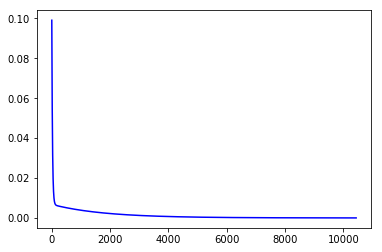

In [36]:
fig = plt.figure()
plt.plot(iters, cost, 'b')
plt.show()

In [37]:
w0, w1, cost, iters = gradient_descent((rescaledX10, rescaledY), 0.1)

Current model is: ([ 0.062] + [ 0.019]x1)
Average Squared Error=[ 0.066]
Iteration:1
Current model is: ([ 0.11] + [ 0.035]x1)
Average Squared Error=[ 0.043]
Iteration:2
Current model is: ([ 0.147] + [ 0.047]x1)
Average Squared Error=[ 0.029]
Iteration:3
Current model is: ([ 0.177] + [ 0.058]x1)
Average Squared Error=[ 0.02]
Iteration:4
Current model is: ([ 0.2] + [ 0.066]x1)
Average Squared Error=[ 0.015]
Iteration:5
Current model is: ([ 0.218] + [ 0.073]x1)
Average Squared Error=[ 0.012]
Iteration:6
Current model is: ([ 0.232] + [ 0.079]x1)
Average Squared Error=[ 0.01]
Iteration:7
Current model is: ([ 0.242] + [ 0.084]x1)
Average Squared Error=[ 0.008]
Iteration:8
Current model is: ([ 0.251] + [ 0.089]x1)
Average Squared Error=[ 0.008]
Iteration:9
Current model is: ([ 0.257] + [ 0.092]x1)
Average Squared Error=[ 0.007]
Iteration:10
Current model is: ([ 0.262] + [ 0.096]x1)
Average Squared Error=[ 0.007]
Iteration:11
Current model is: ([ 0.266] + [ 0.099]x1)
Average Squared Error=[ 0.

Average Squared Error=[ 0.003]
Iteration:123
Current model is: ([ 0.233] + [ 0.278]x1)
Average Squared Error=[ 0.003]
Iteration:124
Current model is: ([ 0.232] + [ 0.279]x1)
Average Squared Error=[ 0.003]
Iteration:125
Current model is: ([ 0.232] + [ 0.281]x1)
Average Squared Error=[ 0.003]
Iteration:126
Current model is: ([ 0.231] + [ 0.282]x1)
Average Squared Error=[ 0.003]
Iteration:127
Current model is: ([ 0.231] + [ 0.283]x1)
Average Squared Error=[ 0.003]
Iteration:128
Current model is: ([ 0.231] + [ 0.285]x1)
Average Squared Error=[ 0.003]
Iteration:129
Current model is: ([ 0.23] + [ 0.286]x1)
Average Squared Error=[ 0.003]
Iteration:130
Current model is: ([ 0.23] + [ 0.287]x1)
Average Squared Error=[ 0.003]
Iteration:131
Current model is: ([ 0.23] + [ 0.289]x1)
Average Squared Error=[ 0.003]
Iteration:132
Current model is: ([ 0.229] + [ 0.29]x1)
Average Squared Error=[ 0.003]
Iteration:133
Current model is: ([ 0.229] + [ 0.291]x1)
Average Squared Error=[ 0.003]
Iteration:134
Cu

Iteration:220
Current model is: ([ 0.201] + [ 0.391]x1)
Average Squared Error=[ 0.002]
Iteration:221
Current model is: ([ 0.201] + [ 0.392]x1)
Average Squared Error=[ 0.002]
Iteration:222
Current model is: ([ 0.2] + [ 0.393]x1)
Average Squared Error=[ 0.002]
Iteration:223
Current model is: ([ 0.2] + [ 0.394]x1)
Average Squared Error=[ 0.002]
Iteration:224
Current model is: ([ 0.2] + [ 0.395]x1)
Average Squared Error=[ 0.002]
Iteration:225
Current model is: ([ 0.199] + [ 0.396]x1)
Average Squared Error=[ 0.002]
Iteration:226
Current model is: ([ 0.199] + [ 0.397]x1)
Average Squared Error=[ 0.002]
Iteration:227
Current model is: ([ 0.199] + [ 0.398]x1)
Average Squared Error=[ 0.002]
Iteration:228
Current model is: ([ 0.199] + [ 0.399]x1)
Average Squared Error=[ 0.002]
Iteration:229
Current model is: ([ 0.198] + [ 0.4]x1)
Average Squared Error=[ 0.002]
Iteration:230
Current model is: ([ 0.198] + [ 0.401]x1)
Average Squared Error=[ 0.002]
Iteration:231
Current model is: ([ 0.198] + [ 0.402

Average Squared Error=[ 0.001]
Iteration:384
Current model is: ([ 0.164] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:385
Current model is: ([ 0.163] + [ 0.524]x1)
Average Squared Error=[ 0.001]
Iteration:386
Current model is: ([ 0.163] + [ 0.525]x1)
Average Squared Error=[ 0.001]
Iteration:387
Current model is: ([ 0.163] + [ 0.526]x1)
Average Squared Error=[ 0.001]
Iteration:388
Current model is: ([ 0.163] + [ 0.526]x1)
Average Squared Error=[ 0.001]
Iteration:389
Current model is: ([ 0.163] + [ 0.527]x1)
Average Squared Error=[ 0.001]
Iteration:390
Current model is: ([ 0.163] + [ 0.527]x1)
Average Squared Error=[ 0.001]
Iteration:391
Current model is: ([ 0.162] + [ 0.528]x1)
Average Squared Error=[ 0.001]
Iteration:392
Current model is: ([ 0.162] + [ 0.529]x1)
Average Squared Error=[ 0.001]
Iteration:393
Current model is: ([ 0.162] + [ 0.529]x1)
Average Squared Error=[ 0.001]
Iteration:394
Current model is: ([ 0.162] + [ 0.53]x1)
Average Squared Error=[ 0.001]
Iteration:395

Average Squared Error=[ 0.]
Iteration:488
Current model is: ([ 0.147] + [ 0.581]x1)
Average Squared Error=[ 0.]
Iteration:489
Current model is: ([ 0.147] + [ 0.582]x1)
Average Squared Error=[ 0.]
Iteration:490
Current model is: ([ 0.147] + [ 0.582]x1)
Average Squared Error=[ 0.]
Iteration:491
Current model is: ([ 0.147] + [ 0.582]x1)
Average Squared Error=[ 0.]
Iteration:492
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:493
Current model is: ([ 0.147] + [ 0.583]x1)
Average Squared Error=[ 0.]
Iteration:494
Current model is: ([ 0.147] + [ 0.584]x1)
Average Squared Error=[ 0.]
Iteration:495
Current model is: ([ 0.147] + [ 0.584]x1)
Average Squared Error=[ 0.]
Iteration:496
Current model is: ([ 0.146] + [ 0.585]x1)
Average Squared Error=[ 0.]
Iteration:497
Current model is: ([ 0.146] + [ 0.585]x1)
Average Squared Error=[ 0.]
Iteration:498
Current model is: ([ 0.146] + [ 0.586]x1)
Average Squared Error=[ 0.]
Iteration:499
Current model is: ([ 0.146] + [ 0.

Average Squared Error=[ 0.]
Iteration:652
Current model is: ([ 0.13] + [ 0.644]x1)
Average Squared Error=[ 0.]
Iteration:653
Current model is: ([ 0.13] + [ 0.644]x1)
Average Squared Error=[ 0.]
Iteration:654
Current model is: ([ 0.13] + [ 0.644]x1)
Average Squared Error=[ 0.]
Iteration:655
Current model is: ([ 0.13] + [ 0.644]x1)
Average Squared Error=[ 0.]
Iteration:656
Current model is: ([ 0.13] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:657
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:658
Current model is: ([ 0.129] + [ 0.645]x1)
Average Squared Error=[ 0.]
Iteration:659
Current model is: ([ 0.129] + [ 0.646]x1)
Average Squared Error=[ 0.]
Iteration:660
Current model is: ([ 0.129] + [ 0.646]x1)
Average Squared Error=[ 0.]
Iteration:661
Current model is: ([ 0.129] + [ 0.646]x1)
Average Squared Error=[ 0.]
Iteration:662
Current model is: ([ 0.129] + [ 0.646]x1)
Average Squared Error=[ 0.]
Iteration:663
Current model is: ([ 0.129] + [ 0.647]x

Iteration:824
Current model is: ([ 0.118] + [ 0.684]x1)
Average Squared Error=[  6.527e-05]
Iteration:825
Current model is: ([ 0.118] + [ 0.685]x1)
Average Squared Error=[  6.490e-05]
Iteration:826
Current model is: ([ 0.118] + [ 0.685]x1)
Average Squared Error=[  6.454e-05]
Iteration:827
Current model is: ([ 0.118] + [ 0.685]x1)
Average Squared Error=[  6.417e-05]
Iteration:828
Current model is: ([ 0.118] + [ 0.685]x1)
Average Squared Error=[  6.381e-05]
Iteration:829
Current model is: ([ 0.118] + [ 0.685]x1)
Average Squared Error=[  6.346e-05]
Iteration:830
Current model is: ([ 0.118] + [ 0.685]x1)
Average Squared Error=[  6.310e-05]
Iteration:831
Current model is: ([ 0.118] + [ 0.686]x1)
Average Squared Error=[  6.274e-05]
Iteration:832
Current model is: ([ 0.118] + [ 0.686]x1)
Average Squared Error=[  6.239e-05]
Iteration:833
Current model is: ([ 0.118] + [ 0.686]x1)
Average Squared Error=[  6.204e-05]
Iteration:834
Current model is: ([ 0.118] + [ 0.686]x1)
Average Squared Error=[ 

Current model is: ([ 0.113] + [ 0.703]x1)
Average Squared Error=[  3.397e-05]
Iteration:941
Current model is: ([ 0.113] + [ 0.703]x1)
Average Squared Error=[  3.378e-05]
Iteration:942
Current model is: ([ 0.113] + [ 0.703]x1)
Average Squared Error=[  3.359e-05]
Iteration:943
Current model is: ([ 0.113] + [ 0.703]x1)
Average Squared Error=[  3.340e-05]
Iteration:944
Current model is: ([ 0.113] + [ 0.703]x1)
Average Squared Error=[  3.321e-05]
Iteration:945
Current model is: ([ 0.113] + [ 0.703]x1)
Average Squared Error=[  3.303e-05]
Iteration:946
Current model is: ([ 0.113] + [ 0.703]x1)
Average Squared Error=[  3.284e-05]
Iteration:947
Current model is: ([ 0.113] + [ 0.704]x1)
Average Squared Error=[  3.266e-05]
Iteration:948
Current model is: ([ 0.113] + [ 0.704]x1)
Average Squared Error=[  3.247e-05]
Iteration:949
Current model is: ([ 0.113] + [ 0.704]x1)
Average Squared Error=[  3.229e-05]
Iteration:950
Current model is: ([ 0.113] + [ 0.704]x1)
Average Squared Error=[  3.211e-05]
It

Average Squared Error=[  1.967e-05]
Iteration:1038
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.956e-05]
Iteration:1039
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.945e-05]
Iteration:1040
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.935e-05]
Iteration:1041
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.924e-05]
Iteration:1042
Current model is: ([ 0.11] + [ 0.714]x1)
Average Squared Error=[  1.913e-05]
Iteration:1043
Current model is: ([ 0.11] + [ 0.715]x1)
Average Squared Error=[  1.902e-05]
Iteration:1044
Current model is: ([ 0.11] + [ 0.715]x1)
Average Squared Error=[  1.891e-05]
Iteration:1045
Current model is: ([ 0.11] + [ 0.715]x1)
Average Squared Error=[  1.881e-05]
Iteration:1046
Current model is: ([ 0.11] + [ 0.715]x1)
Average Squared Error=[  1.870e-05]
Iteration:1047
Current model is: ([ 0.11] + [ 0.715]x1)
Average Squared Error=[  1.860e-05]
Iteration:1048
Current model is: ([ 0.11] + 

Average Squared Error=[  8.361e-06]
Iteration:1190
Current model is: ([ 0.107] + [ 0.727]x1)
Average Squared Error=[  8.314e-06]
Iteration:1191
Current model is: ([ 0.107] + [ 0.727]x1)
Average Squared Error=[  8.268e-06]
Iteration:1192
Current model is: ([ 0.107] + [ 0.727]x1)
Average Squared Error=[  8.221e-06]
Iteration:1193
Current model is: ([ 0.107] + [ 0.727]x1)
Average Squared Error=[  8.175e-06]
Iteration:1194
Current model is: ([ 0.107] + [ 0.727]x1)
Average Squared Error=[  8.129e-06]
Iteration:1195
Current model is: ([ 0.106] + [ 0.727]x1)
Average Squared Error=[  8.083e-06]
Iteration:1196
Current model is: ([ 0.106] + [ 0.727]x1)
Average Squared Error=[  8.038e-06]
Iteration:1197
Current model is: ([ 0.106] + [ 0.727]x1)
Average Squared Error=[  7.993e-06]
Iteration:1198
Current model is: ([ 0.106] + [ 0.727]x1)
Average Squared Error=[  7.948e-06]
Iteration:1199
Current model is: ([ 0.106] + [ 0.727]x1)
Average Squared Error=[  7.903e-06]
Iteration:1200
Current model is: (

Iteration:1333
Current model is: ([ 0.104] + [ 0.734]x1)
Average Squared Error=[  3.717e-06]
Iteration:1334
Current model is: ([ 0.104] + [ 0.734]x1)
Average Squared Error=[  3.696e-06]
Iteration:1335
Current model is: ([ 0.104] + [ 0.734]x1)
Average Squared Error=[  3.675e-06]
Iteration:1336
Current model is: ([ 0.104] + [ 0.734]x1)
Average Squared Error=[  3.655e-06]
Iteration:1337
Current model is: ([ 0.104] + [ 0.735]x1)
Average Squared Error=[  3.634e-06]
Iteration:1338
Current model is: ([ 0.104] + [ 0.735]x1)
Average Squared Error=[  3.614e-06]
Iteration:1339
Current model is: ([ 0.104] + [ 0.735]x1)
Average Squared Error=[  3.593e-06]
Iteration:1340
Current model is: ([ 0.104] + [ 0.735]x1)
Average Squared Error=[  3.573e-06]
Iteration:1341
Current model is: ([ 0.104] + [ 0.735]x1)
Average Squared Error=[  3.553e-06]
Iteration:1342
Current model is: ([ 0.104] + [ 0.735]x1)
Average Squared Error=[  3.533e-06]
Iteration:1343
Current model is: ([ 0.104] + [ 0.735]x1)
Average Squar

Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.268e-06]
Iteration:1525
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.261e-06]
Iteration:1526
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.254e-06]
Iteration:1527
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.247e-06]
Iteration:1528
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.240e-06]
Iteration:1529
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.233e-06]
Iteration:1530
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.226e-06]
Iteration:1531
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.219e-06]
Iteration:1532
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.212e-06]
Iteration:1533
Current model is: ([ 0.103] + [ 0.741]x1)
Average Squared Error=[  1.206e-06]
Iteration:1534
Current model is: ([ 0.102] + [ 0.741]x1)
Average Squared Error=[  1.1

Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.378e-07]
Iteration:1760
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.359e-07]
Iteration:1761
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.340e-07]
Iteration:1762
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.321e-07]
Iteration:1763
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.302e-07]
Iteration:1764
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.284e-07]
Iteration:1765
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.265e-07]
Iteration:1766
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.247e-07]
Iteration:1767
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.229e-07]
Iteration:1768
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.211e-07]
Iteration:1769
Current model is: ([ 0.101] + [ 0.745]x1)
Average Squared Error=[  3.1

Average Squared Error=[  2.024e-07]
Iteration:1851
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  2.012e-07]
Iteration:1852
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  2.001e-07]
Iteration:1853
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.990e-07]
Iteration:1854
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.979e-07]
Iteration:1855
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.967e-07]
Iteration:1856
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.956e-07]
Iteration:1857
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.945e-07]
Iteration:1858
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.934e-07]
Iteration:1859
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.924e-07]
Iteration:1860
Current model is: ([ 0.101] + [ 0.746]x1)
Average Squared Error=[  1.913e-07]
Iteration:1861
Current model is: (

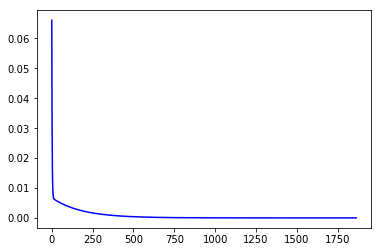

In [38]:
fig = plt.figure()
plt.plot(iters, cost, 'b')
plt.show()

The last step would be to check how well the Gradient Descent did, by ploting the line with the optimum w0 and w1. 

It seems that the model is better than before, because now it seems to be able to predict a wider range of the Y values. 

In [39]:
Ybest = 0.101 + 0.746*rescaledX10

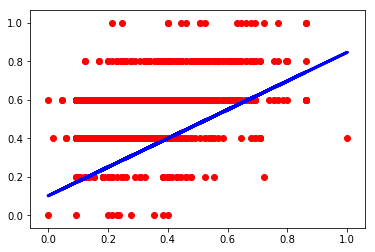

In [40]:
plt.scatter(rescaledX10, rescaledY,  color='red')
plt.plot(rescaledX10, Ybest, color='blue', linewidth=3)
plt.show()

In [41]:
w0plot = np.vstack(w0)
w1plot = np.vstack(w1)
costplot = np.vstack(cost)

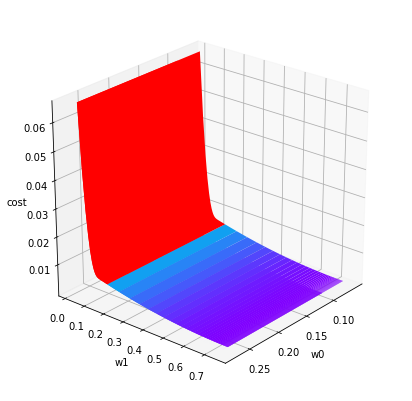

In [42]:
Xs, Ys = np.meshgrid(w0plot, w1plot)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r'w0')
ax.set_ylabel(r'w1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, costplot, cmap=cm.rainbow)